In [398]:
library(nlme)
library(multcomp)
options(jupyter.plot_mimetypes = "image/png")
library(ggplot2)
library(corrplot)
library(gridExtra)
library(grid)
library(data.table)

## Load Data

In [458]:
data1 = read.csv("../Data/Data_Classifications_v6.csv")
data2 = read.csv(paste("X_region1_after_clustering.csv"))
data3 = read.csv(paste("X_region1_before_clustering.csv"))
data4 = read.csv(paste("X_region1_after_clustering2.csv"))
data5 = read.csv(paste("X_region1_after_clustering_lr.csv"))

In [459]:
for (pid in unique(data1$PID)){
    #print('--')
    #print(pid)
    #print(nrow(data1[data1$PID==pid,]))
    #print('--')
    data1[data1$PID==pid,'n_per_study']=nrow(data1[data1$PID==pid,])
}

### Make different datasets

In [460]:
colnames(data1)

# combine regions regressors (different per collapsing scheme)
# remove all but 50% accuracy 

data = cbind(data1,data3)
data_r_coll0<-data[!is.na(data$Accuracy.50),]

data = cbind(data1,data2)
data_r_coll1<-data[!is.na(data$Accuracy.50),]

data = cbind(data1,data4)
data_r_coll2<-data[!is.na(data$Accuracy.50),]

data = cbind(data1,data5)
data_r_coll3<-data[!is.na(data$Accuracy.50),]


## remove those with only one study


[1] "X"                          "Notes.Double.Check"        
 [3] "Chris.Double.Check"         "Notes"                     
 [5] "PID"                        "Title"                     
 [7] "Info.type"                  "Source.in.paper"           
 [9] "Region.name.duplicate"      "Task.variable.decoded"     
[11] "Accuracy.50"                "Accuracy.other"            
[13] "Num_classes"                "Significance"              
[15] "Roi.Search"                 "Pattern.type"              
[17] "Classifier.type"            "Classifier.Fitted"         
[19] "Scanner"                    "Resolution"                
[21] "Smoothing"                  "Coregistration"            
[23] "Movement.Correction"        "Pattern.normalization.type"
[25] "Num_subs"                   "Talairach.Coordinates"     
[27] "MNI.Coordinates"            "Coordinate.Space"          
[29] "ROI.Atlas"                  "BA"                        
[31] "AAL"                        "Desikan"                   
[33] "OxHarvard"                  "Destrieux"                 
[35] "Unkown.Atlas"               "Method.of.Assigning.Region"
[37] "Notes.Region"               "Region.name"               
[39] "AAL.Region_old"             "Region.AAL.1"              
[41] "n_per_study"

In [337]:
colnames(data2)

[1] "Frontal_Sup"         "Frontal_Sup_Medial"  "Frontal_Sup_Mid_Orb"
 [4] "Frontal_Mid_L"       "Frontal_Mid_R"       "Frontal_Inf_Orb"    
 [7] "Insula"              "Cingulum_Ant"        "Frontal_Inf_Oper_L" 
[10] "Frontal_Inf_Oper_R"  "Frontal_Inf_Tri_L"   "Frontal_Inf_Tri_R"  
[13] "Supp_Motor_Area_L"   "Supp_Motor_Area_R"   "Cingulum_Mid_L"     
[16] "Cingulum_Mid_R"      "Precentral_L"        "Precentral_R"

In [338]:
colnames(data3)

[1] "Frontal_Sup_L"        "Frontal_Sup_R"        "Frontal_Sup_Orb_L"   
 [4] "Frontal_Sup_Orb_R"    "Frontal_Mid_L"        "Frontal_Mid_R"       
 [7] "Frontal_Mid_Orb_L"    "Frontal_Mid_Orb_R"    "Frontal_Inf_Oper_L"  
[10] "Frontal_Inf_Oper_R"   "Frontal_Inf_Tri_L"    "Frontal_Inf_Tri_R"   
[13] "Frontal_Inf_Orb_L"    "Frontal_Inf_Orb_R"    "Supp_Motor_Area_L"   
[16] "Supp_Motor_Area_R"    "Frontal_Sup_Medial_L" "Frontal_Sup_Medial_R"
[19] "Insula_L"             "Insula_R"             "Cingulum_Ant_L"      
[22] "Cingulum_Ant_R"       "Cingulum_Mid_L"       "Cingulum_Mid_R"      
[25] "Precentral_L"         "Precentral_R"

In [339]:
colnames(data4)

[1] "Frontal_Sup" "Frontal_Mid" "Frontal_Inf" "Insula"      "Motor"      
[6] "Cingulum"

In [461]:
colnames(data5)

[1] "Precentral"         "Frontal_Mid"        "Frontal_Mid_Orb"   
 [4] "Frontal_Inf_Orb"    "Frontal_Inf_Oper"   "Frontal_Inf_Tri"   
 [7] "Supp_Motor_Area"    "Cingulum_Mid"       "Cingulum_Ant"      
[10] "Frontal_Sup"        "Frontal_Sup_Medial" "Insula"

### Make a unique dataset

In [515]:


data_r_coll4<-data_r_coll3[c('Accuracy.50','Info.type','PID',colnames(data5))]
colnames(data_r_coll4)
keys <- colnames(data_r_coll4)[!grepl('Accuracy.50',colnames(data_r_coll4))]
keys
X <- as.data.table(data_r_coll4)
data_r_coll4<- X[,list(Accuracy.50.mean= mean(Accuracy.50)),keys]
data_r_coll4$Accuracy.50<-data_r_coll4$Accuracy.50.mean


[1] "Accuracy.50"        "Info.type"          "PID"               
 [4] "Precentral"         "Frontal_Mid"        "Frontal_Mid_Orb"   
 [7] "Frontal_Inf_Orb"    "Frontal_Inf_Oper"   "Frontal_Inf_Tri"   
[10] "Supp_Motor_Area"    "Cingulum_Mid"       "Cingulum_Ant"      
[13] "Frontal_Sup"        "Frontal_Sup_Medial" "Insula"

[1] "Info.type"          "PID"                "Precentral"        
 [4] "Frontal_Mid"        "Frontal_Mid_Orb"    "Frontal_Inf_Orb"   
 [7] "Frontal_Inf_Oper"   "Frontal_Inf_Tri"    "Supp_Motor_Area"   
[10] "Cingulum_Mid"       "Cingulum_Ant"       "Frontal_Sup"       
[13] "Frontal_Sup_Medial" "Insula"

In [518]:


data_r_coll2_un<-data_r_coll2[c('Accuracy.50','Info.type','PID',colnames(data4))]
colnames(data_r_coll2_un)
keys <- colnames(data_r_coll2_un)[!grepl('Accuracy.50',colnames(data_r_coll2_un))]
keys
X <- as.data.table(data_r_coll2_un)
data_r_coll2_un<- X[,list(Accuracy.50.mean= mean(Accuracy.50)),keys]
data_r_coll2_un$Accuracy.50<-data_r_coll2_un$Accuracy.50.mean


[1] "Accuracy.50" "Info.type"   "PID"         "Frontal_Sup" "Frontal_Mid"
[6] "Frontal_Inf" "Insula"      "Motor"       "Cingulum"

[1] "Info.type"   "PID"         "Frontal_Sup" "Frontal_Mid" "Frontal_Inf"
[6] "Insula"      "Motor"       "Cingulum"

## Factor Plots by Study

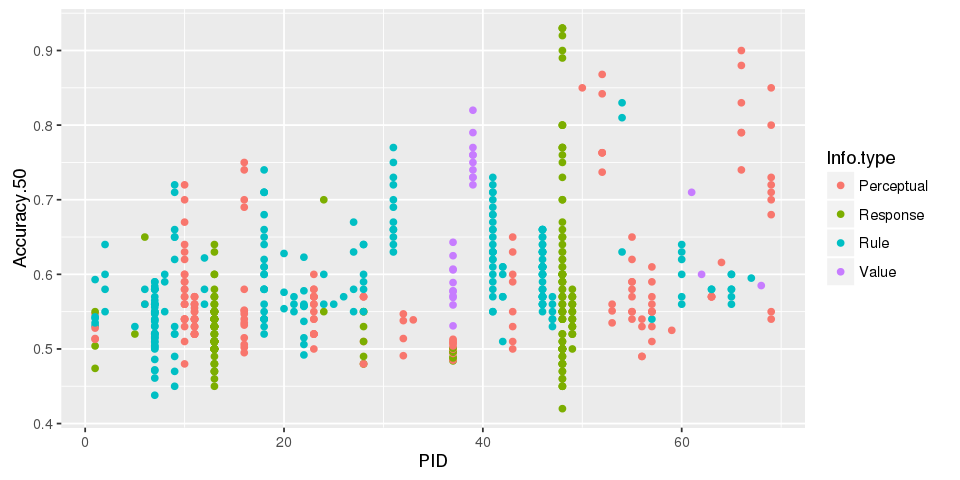

In [430]:

options(repr.plot.width=8, repr.plot.height=4)
ggplot(aes(y = Accuracy.50, x = PID,color=Info.type), data = data_r_coll3) +geom_point()


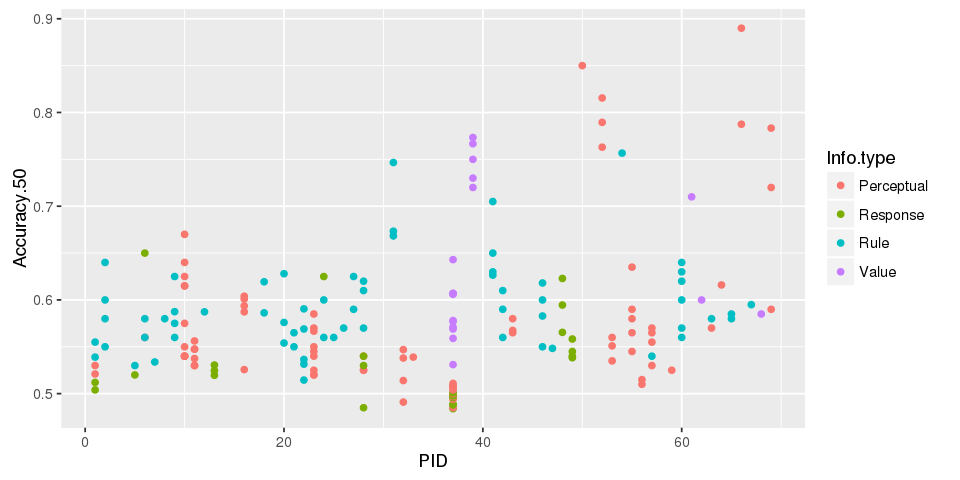

In [431]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(aes(y = Accuracy.50, x = PID,color=Info.type), data = data_r_coll4) +geom_point()

### Region Plots

In [342]:
plot_list <- list()
i<-1
for (pid in unique(data_r_coll3$PID)){
    
    
    # make two arrays
    # accuracy per study
    # associated region per study
    
    # all duplicates are in here (e.g. accuracy assigned to 2 regions)
    d<-data_r_coll3[data_r_coll3[,'PID']==pid,] # note which region dataset this is
    accuracy = c()
    regions = c()
    rownamess=c()
    for (region in colnames(data5)){  # note region name here 
        acc = d[d[,region]==1,'Accuracy.50']
        accuracy = append(accuracy,acc)
        rownamess = append(rownamess,rownames(d[d[,region]==1,]))
        regions = append(regions,rep(region,length(acc)))
    }
    
    # data frame 
    # accuracy , region, rownames
    #  ...,     ...,   ... 
   df = data.frame(accuracy,regions,rownamess)

    # plot 
    p<-ggplot(aes(y = accuracy, x = regions,label=rownamess), data = df) +geom_text()+ggtitle(pid)
    p<-p+ theme(axis.text.x = element_text(angle = 90, hjust = 1))
    plot_list[[i]] = p
    i<-i+1
    
}

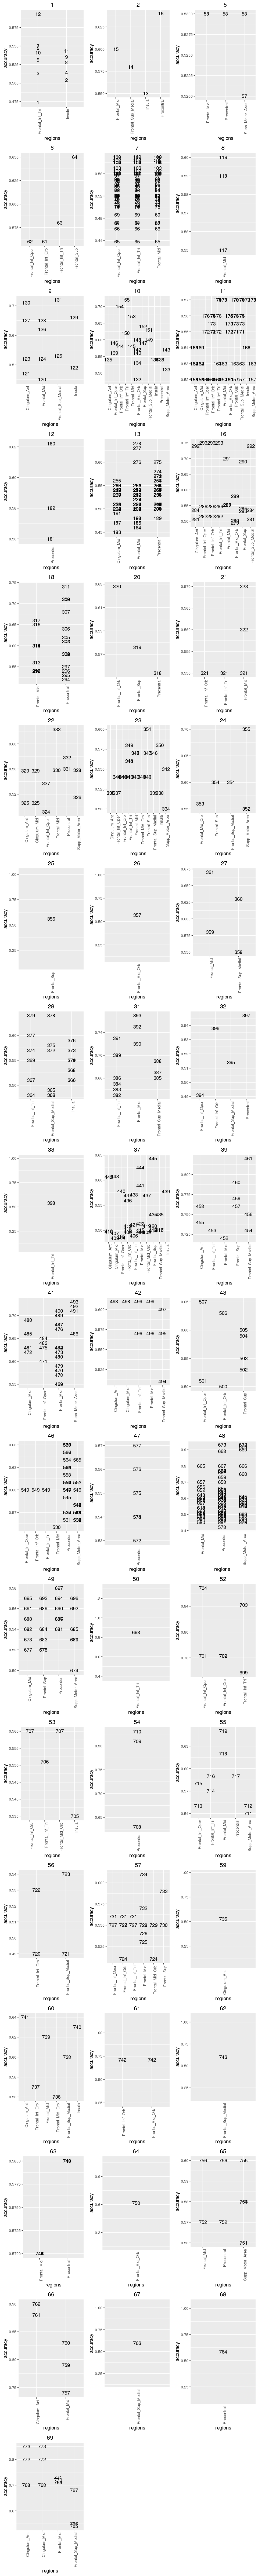

In [343]:
options(repr.plot.width=8, repr.plot.height=80)
do.call(grid.arrange,c(plot_list, ncol=3))

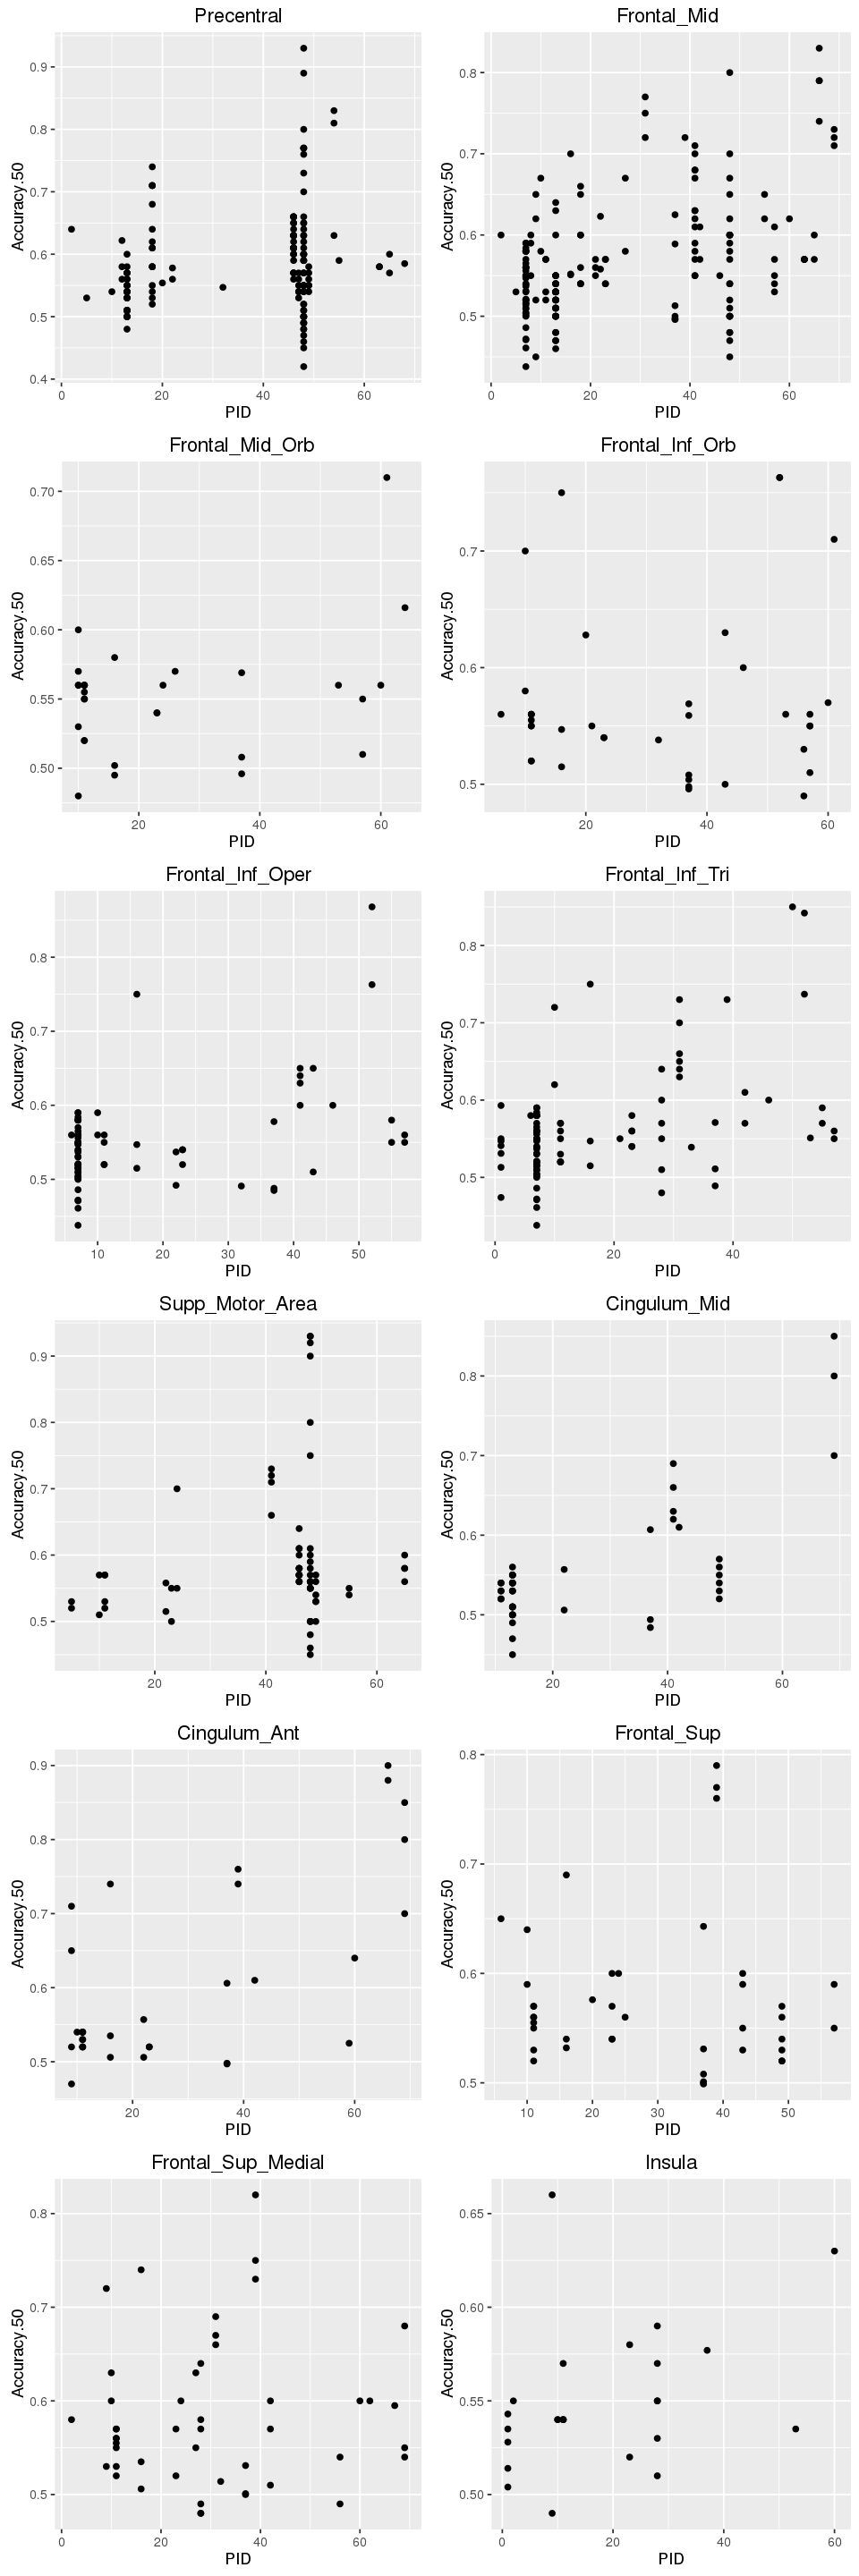

In [344]:
plot_list <- list()
i<-1
options(repr.plot.width=8, repr.plot.height=24)
for (region in colnames(data5)){ #
    d<-data_r_coll3[data_r_coll3[,region]==1,]
    #ggplot(aes(y = Accuracy.50, x = PID,color=Classifier.type), data = d) +geom_point()
    p<-ggplot(aes(y = Accuracy.50, x = PID), data = d) +geom_point()+ggtitle(region)
    plot_list[[i]] = p
    i<-i+1
    
}

do.call(grid.arrange,c(plot_list, ncol=2))
#grid.arrange(plot_list,ncol=3)

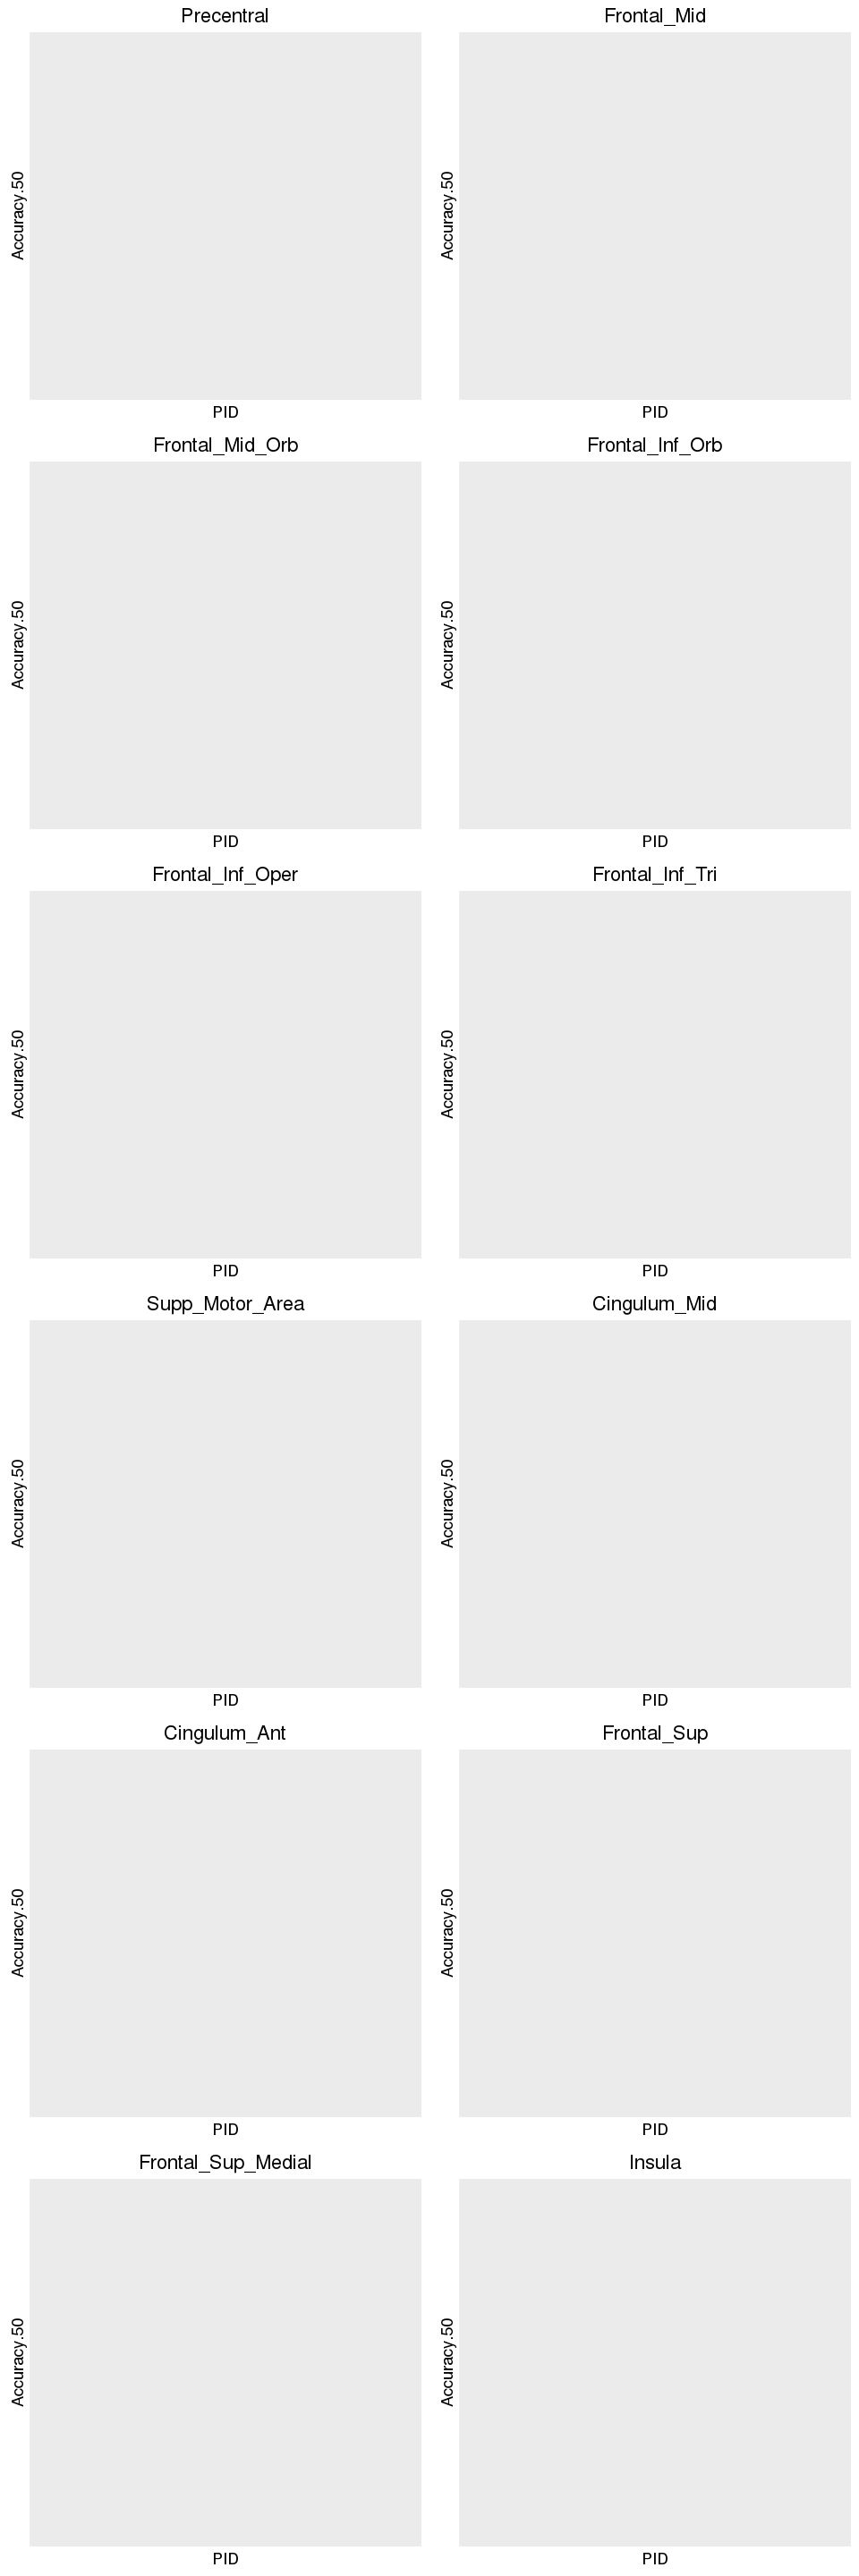

In [520]:
plot_list <- list()
i<-1
options(repr.plot.width=8, repr.plot.height=24)
for (region in colnames(data5)){ #
    d<-data_r_coll4[data_r_coll4[,region]==1,]
    #ggplot(aes(y = Accuracy.50, x = PID,color=Classifier.type), data = d) +geom_point()
    p<-ggplot(aes(y = Accuracy.50, x = PID), data = d) +geom_point()+ggtitle(region)
    plot_list[[i]] = p
    i<-i+1
    
}

do.call(grid.arrange,c(plot_list, ncol=2))
#grid.arrange(plot_list,ncol=3)

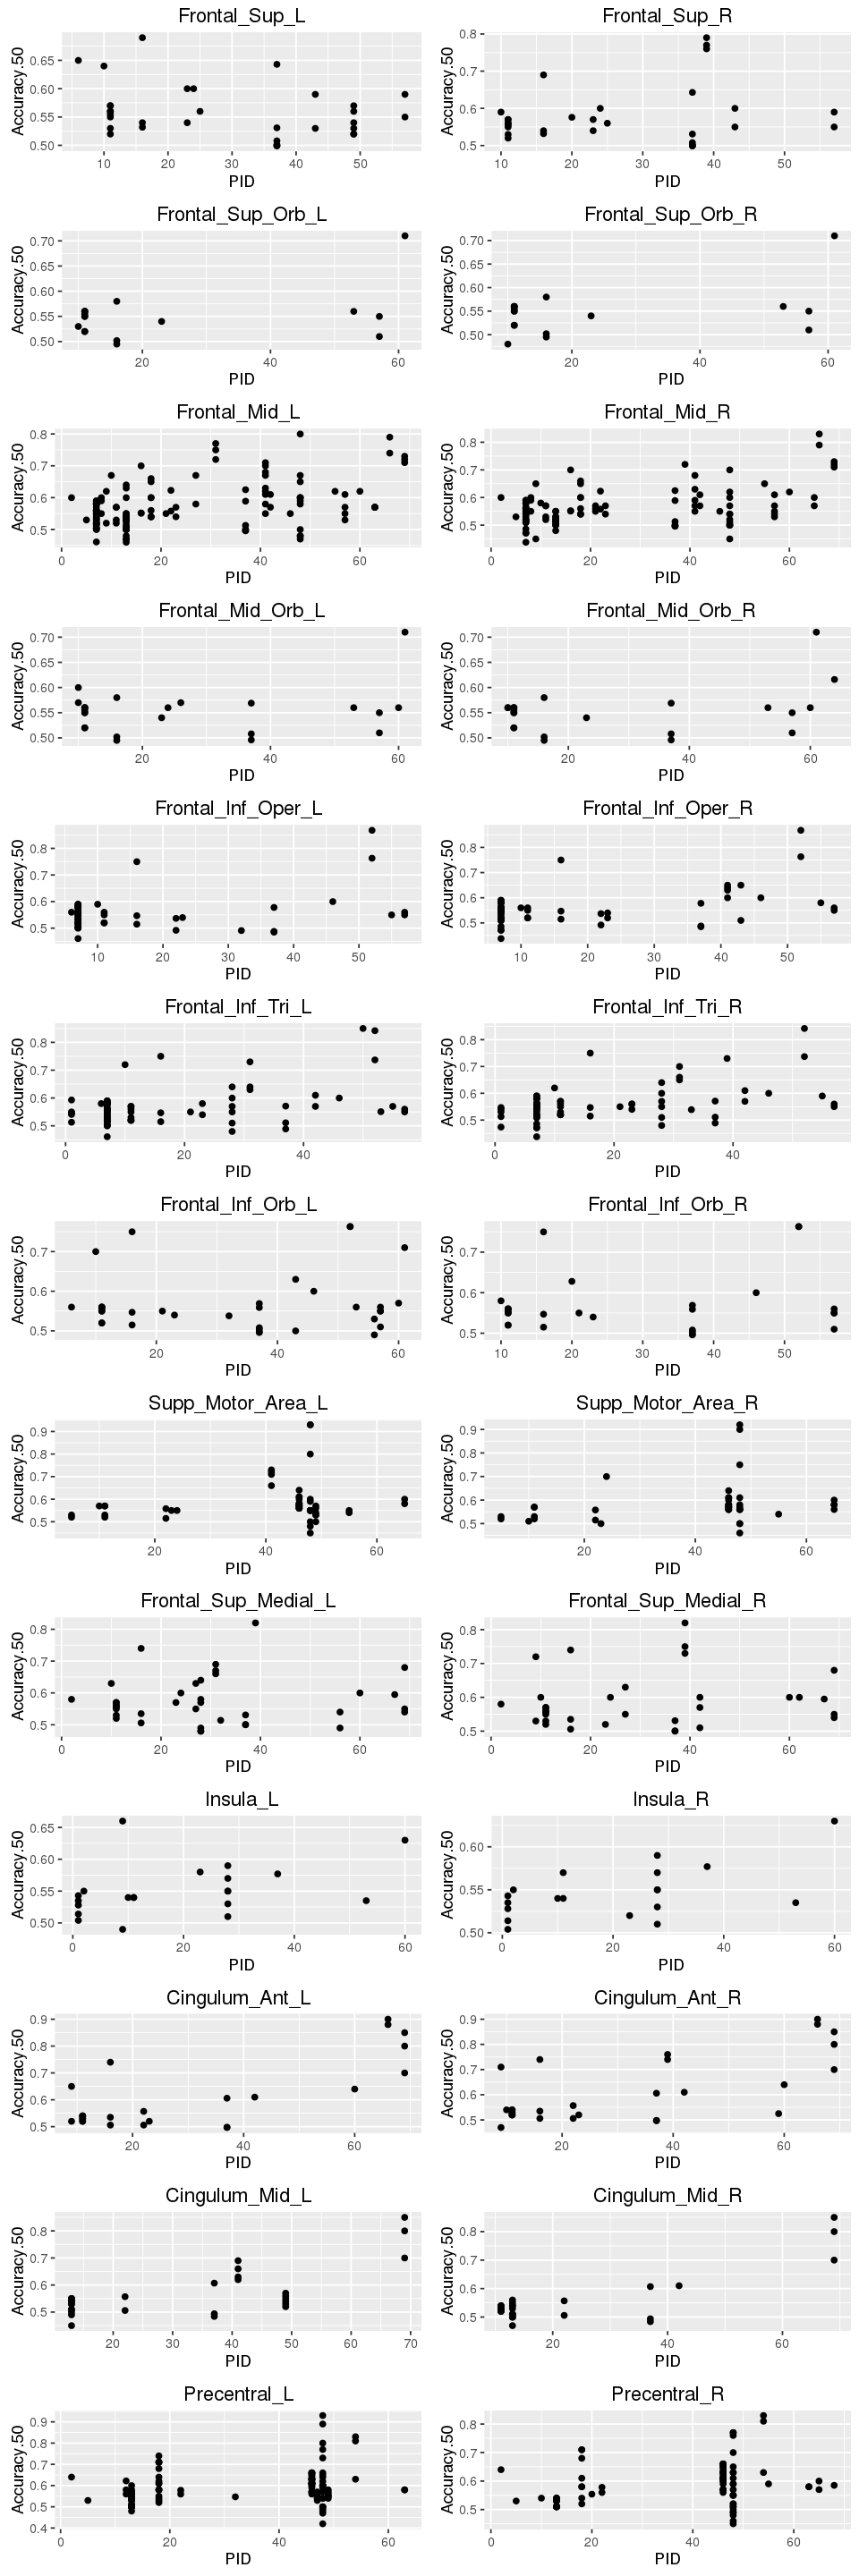

In [345]:
plot_list <- list()
i<-1
options(repr.plot.width=8, repr.plot.height=24)
for (region in colnames(data3)){
    d<-data_r_coll0[data_r_coll0[,region]==1,]
    #ggplot(aes(y = Accuracy.50, x = PID,color=Classifier.type), data = d) +geom_point()
    p<-ggplot(aes(y = Accuracy.50, x = PID), data = d) +geom_point()+ggtitle(region)
    plot_list[[i]] = p
    i<-i+1
    
}

do.call(grid.arrange,c(plot_list, ncol=2))
#grid.arrange(plot_list,ncol=3)

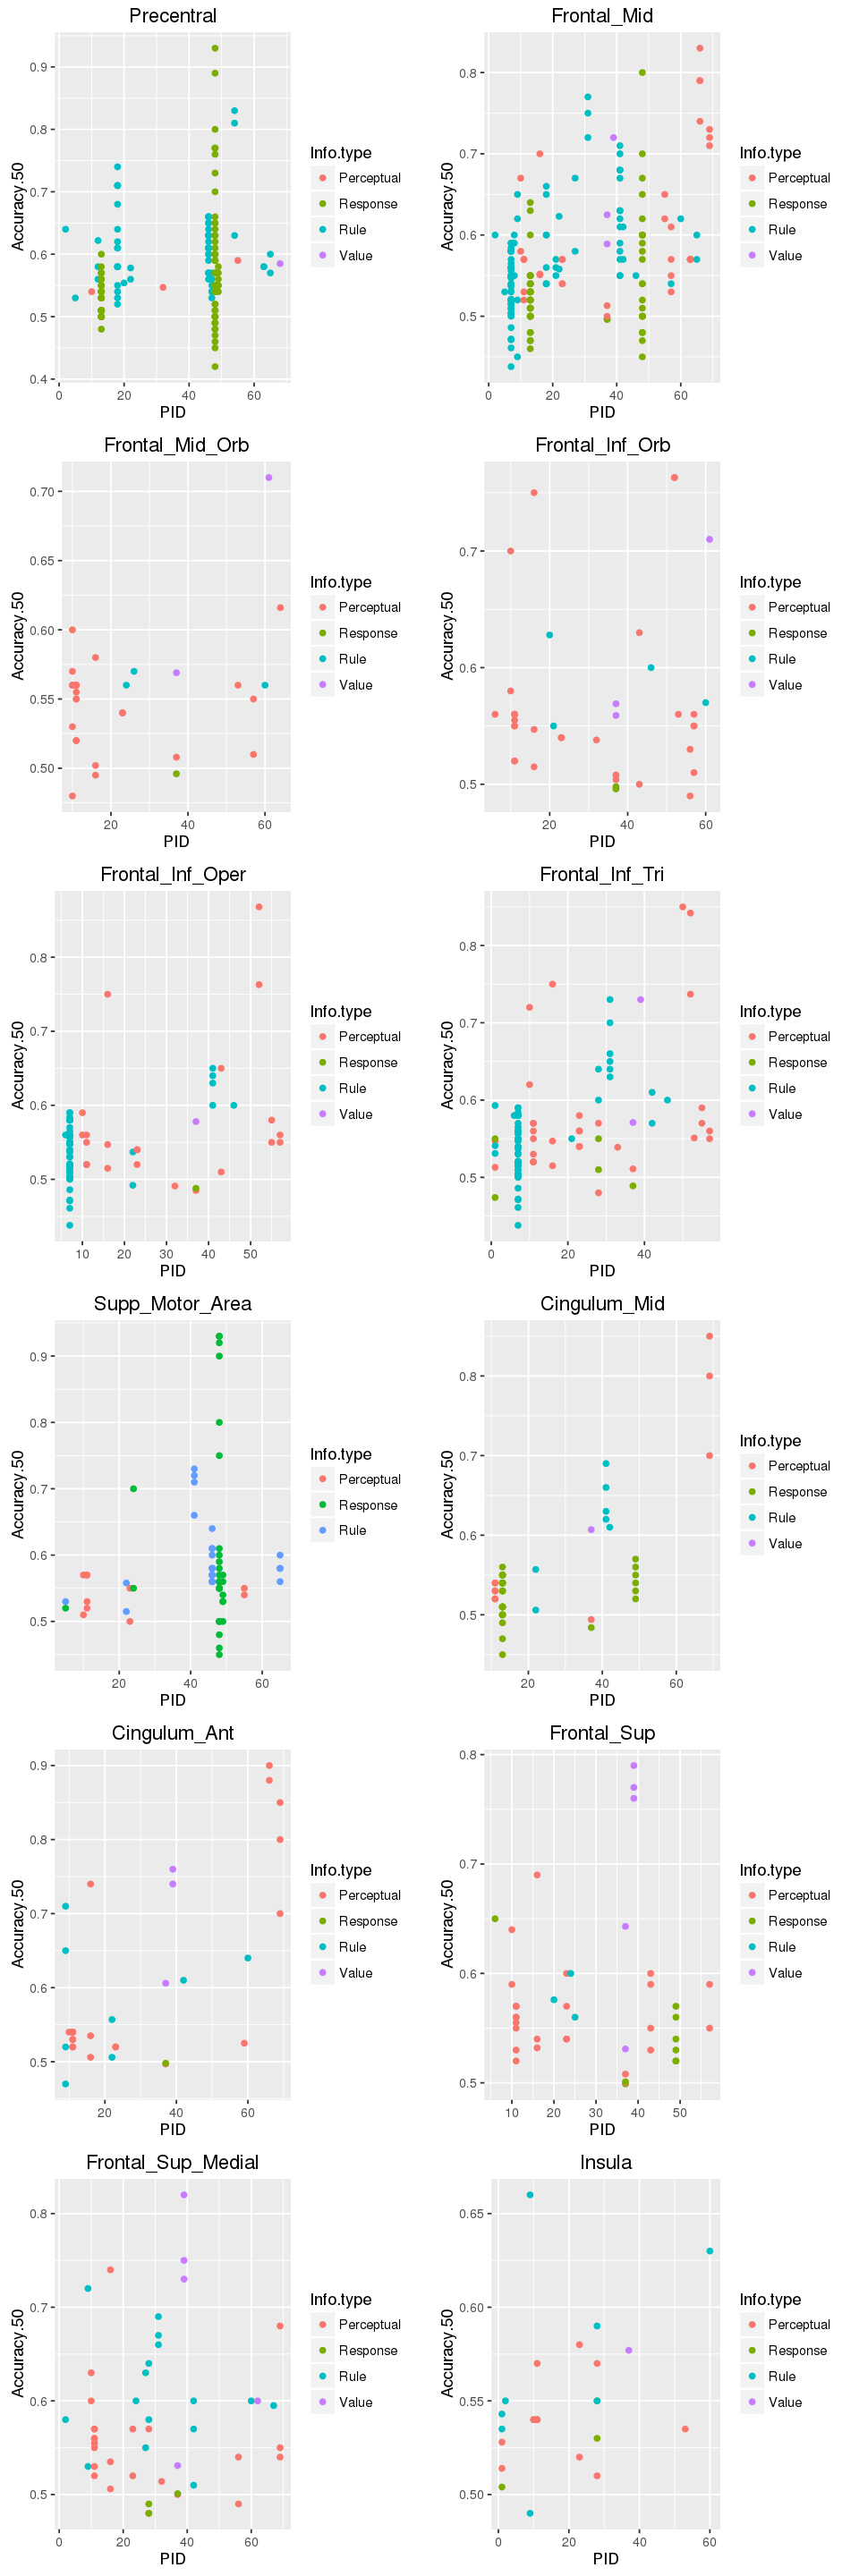

In [346]:
plot_list <- list()
i<-1
options(repr.plot.width=8, repr.plot.height=24)
for (region in colnames(data5)){
    d<-data_r_coll3[data_r_coll3[,region]==1,]
    p<-ggplot(aes(y = Accuracy.50, x = PID,color=Info.type), data = d) +geom_point()+ggtitle(region)
    #p<-ggplot(aes(y = Accuracy.50, x = PID), data = d) +geom_point()+ggtitle(region)
    plot_list[[i]] = p
    i<-i+1
    
}

do.call(grid.arrange,c(plot_list, ncol=2))
#grid.arrange(plot_list,ncol=3)

## Correlation of Factors

## OLS

In [495]:
d<-data_r_coll4
nrow(d)

v<-varIdent(form =~1 | PID)
ctrl <- lmeControl(opt='optim');
model= gls(Accuracy.50~Info.type
                  ,data=d,method='ML')

summary(model)

[1] 189

Generalized least squares fit by maximum likelihood
  Model: Accuracy.50 ~ Info.type 
  Data: d 
        AIC       BIC   logLik
  -470.0628 -453.8541 240.0314

Coefficients:
                       Value   Std.Error  t-value p-value
(Intercept)        0.5761740 0.007679017 75.03225  0.0000
Info.typeResponse -0.0445093 0.015286767 -2.91163  0.0040
Info.typeRule      0.0163880 0.011518526  1.42275  0.1565
Info.typeValue     0.0617705 0.017917707  3.44745  0.0007

 Correlation: 
                  (Intr) Inf.typRs Inf.typRl
Info.typeResponse -0.502                    
Info.typeRule     -0.667  0.335             
Info.typeValue    -0.429  0.215     0.286   

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.5738112 -0.6059224 -0.2380185  0.2574254  4.6183133 

Residual standard error: 0.06795252 
Degrees of freedom: 189 total; 185 residual

In [498]:
d<-data_r_coll4
nrow(d)

v<-varIdent(form =~1 | PID)
ctrl <- lmeControl(opt='optim');
model= gls(Accuracy.50~Info.type+Precentral+Frontal_Mid+Frontal_Mid_Orb+Frontal_Inf_Orb+
                  Frontal_Inf_Oper+Frontal_Inf_Tri+Supp_Motor_Area+Cingulum_Mid+
                  Cingulum_Ant+Frontal_Sup+Frontal_Sup_Medial+Insula
            
                  ,data=d,method='ML')

summary(model)


[1] 189

Generalized least squares fit by maximum likelihood
  Model: Accuracy.50 ~ Info.type + Precentral + Frontal_Mid + Frontal_Mid_Orb +      Frontal_Inf_Orb + Frontal_Inf_Oper + Frontal_Inf_Tri + Supp_Motor_Area +      Cingulum_Mid + Cingulum_Ant + Frontal_Sup + Frontal_Sup_Medial +      Insula 
  Data: d 
        AIC       BIC   logLik
  -456.7908 -401.6811 245.3954

Coefficients:
                        Value  Std.Error  t-value p-value
(Intercept)         0.5929157 0.01299553 45.62459  0.0000
Info.typeResponse  -0.0478540 0.01599359 -2.99208  0.0032
Info.typeRule       0.0136884 0.01222604  1.11961  0.2644
Info.typeValue      0.0599122 0.01816359  3.29848  0.0012
Precentral         -0.0106949 0.01943715 -0.55023  0.5829
Frontal_Mid        -0.0012227 0.01482130 -0.08250  0.9343
Frontal_Mid_Orb    -0.0274595 0.02088916 -1.31453  0.1904
Frontal_Inf_Orb    -0.0131820 0.01751032 -0.75281  0.4526
Frontal_Inf_Oper   -0.0258904 0.01836681 -1.40963  0.1604
Frontal_Inf_Tri     0.0030531 0.0152542

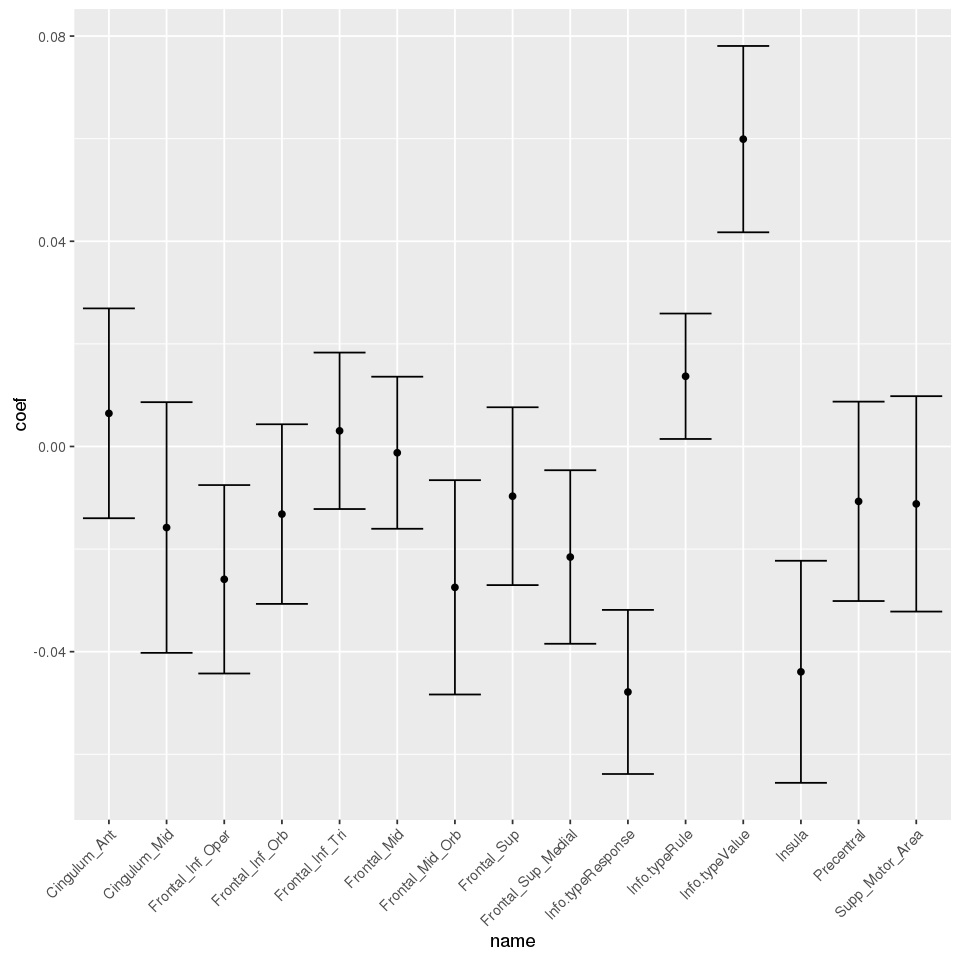

In [494]:

options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

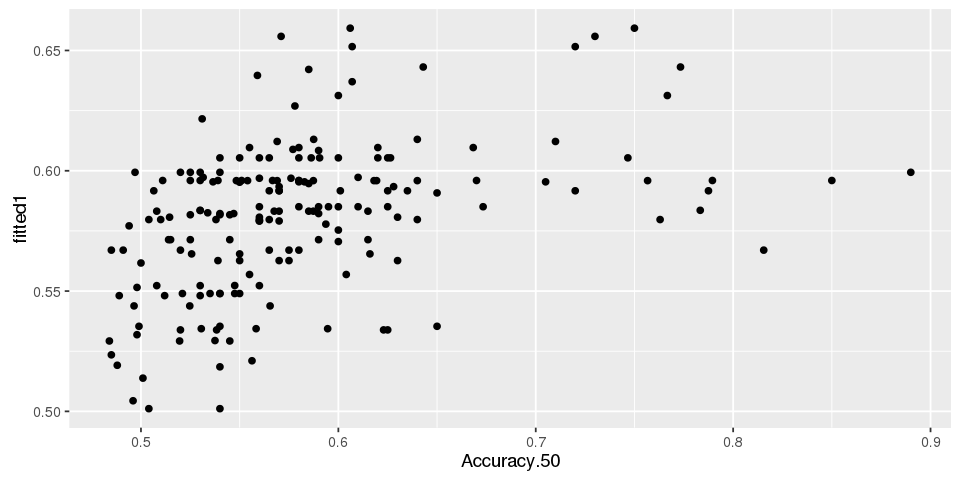

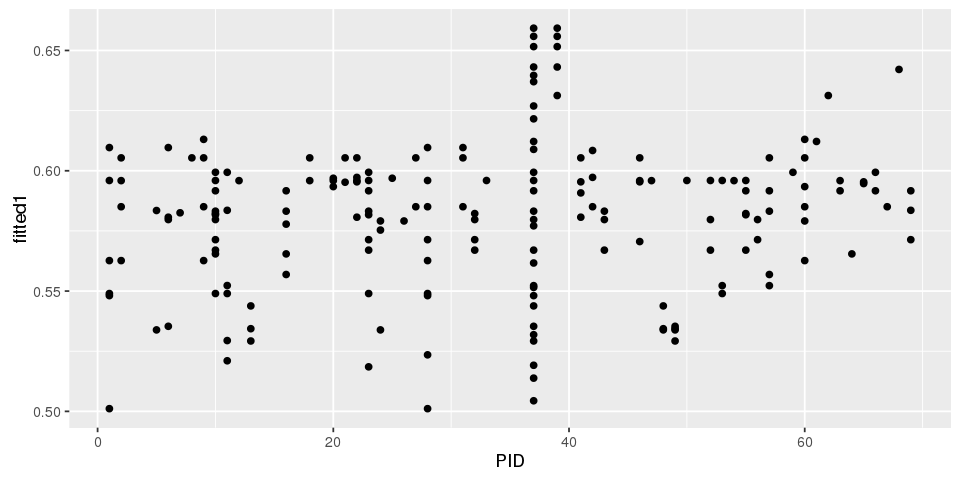

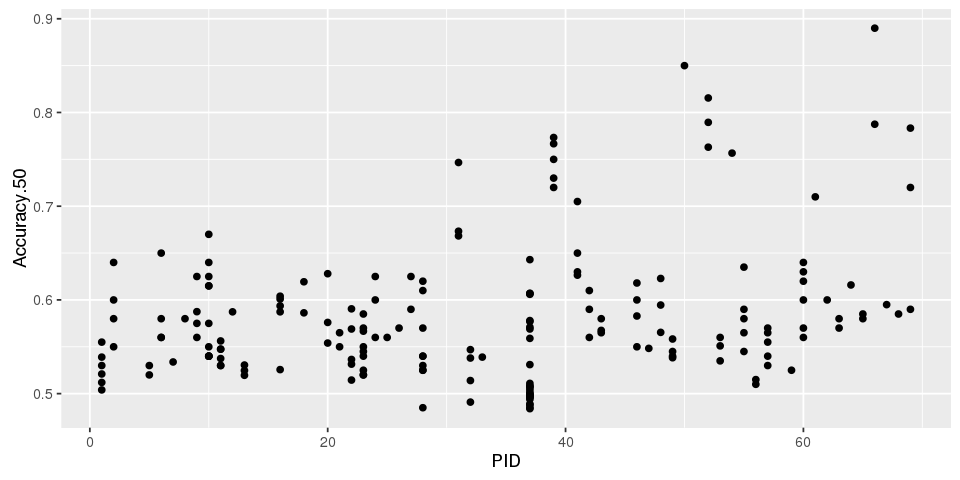

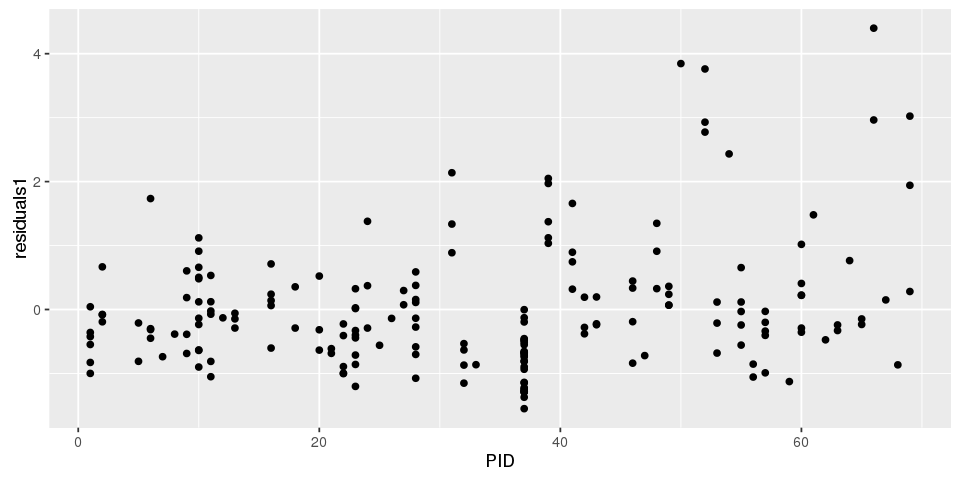

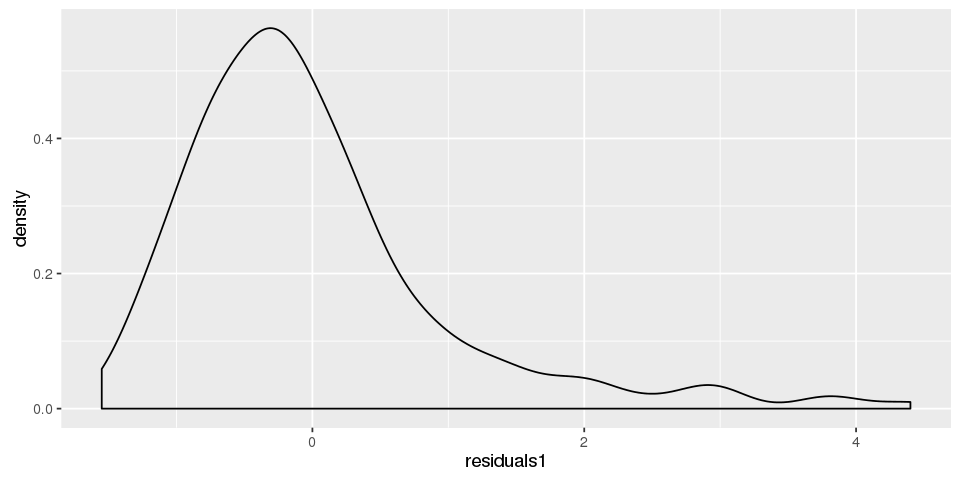

In [490]:

d$residuals1 = residuals(model, level = 1,type = c("pearson"))
d$residuals0 = residuals(model, level = 0,type = c("pearson"))
d$fitted1 = fitted(model, level = 1)
d$fitted0 = fitted(model, level = 0)

options(repr.plot.width=8, repr.plot.height=4)
ggplot(aes(y = fitted1, x = Accuracy.50), data = d) +geom_point()
ggplot(aes(y = fitted1, x = PID), data = d) +geom_point()
ggplot(aes(y = Accuracy.50, x = PID), data = d) +geom_point()
ggplot(aes(y = residuals1,x=PID), data = d)+geom_point()
ggplot(aes(x = residuals1), data = d)+geom_density()

In [496]:
d<-data_r_coll4
nrow(d)

v<-varIdent(form =~1 | PID)
ctrl <- lmeControl(opt='optim');
model1= lme(Accuracy.50~Info.type+Precentral+Frontal_Mid+Frontal_Mid_Orb+Frontal_Inf_Orb+
                  Frontal_Inf_Oper+Frontal_Inf_Tri+Supp_Motor_Area+Cingulum_Mid+
                  Cingulum_Ant+Frontal_Sup+Frontal_Sup_Medial+Insula
            
                  ,random=~1|PID,data=d,method='ML')

summary(model1)

[1] 189

Linear mixed-effects model fit by maximum likelihood
 Data: d 
       AIC       BIC  logLik
  -613.984 -555.6326 324.992

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.07224646 0.02934025

Fixed effects: Accuracy.50 ~ Info.type + Precentral + Frontal_Mid + Frontal_Mid_Orb +      Frontal_Inf_Orb + Frontal_Inf_Oper + Frontal_Inf_Tri + Supp_Motor_Area +      Cingulum_Mid + Cingulum_Ant + Frontal_Sup + Frontal_Sup_Medial +      Insula 
                        Value   Std.Error  DF  t-value p-value
(Intercept)         0.5842106 0.013602176 122 42.94979  0.0000
Info.typeResponse  -0.0074649 0.010429860 122 -0.71573  0.4755
Info.typeRule       0.0134594 0.011662551 122  1.15407  0.2507
Info.typeValue      0.0836926 0.012698382 122  6.59080  0.0000
Precentral          0.0082578 0.010800030 122  0.76461  0.4460
Frontal_Mid         0.0045554 0.007851795 122  0.58018  0.5629
Frontal_Mid_Orb    -0.0240103 0.011109505 122 -2.16124  0.0326
Frontal_Inf_Orb     0.0112767

In [499]:
anova(model,model1)

Model df       AIC       BIC   logLik   Test  L.Ratio p-value
model      1 17 -456.7908 -401.6811 245.3954                        
model1     2 18 -613.9840 -555.6326 324.9920 1 vs 2 159.1932  <.0001

In [505]:
d<-data_r_coll4
nrow(d)

v<-varIdent(form =~1 | PID)
ctrl <- lmeControl(opt='optim');
model2= lme(Accuracy.50~Info.type*(Precentral+Frontal_Mid+Frontal_Mid_Orb+Frontal_Inf_Orb+
                  Frontal_Inf_Oper+Frontal_Inf_Tri+Supp_Motor_Area+Cingulum_Mid+
                  Cingulum_Ant+Frontal_Sup+Frontal_Sup_Medial+Insula) ,random=~1|PID,data=d,method='ML')

#summary(model2)

[1] 189

ERROR: Error in MEEM(object, conLin, control$niterEM): Singularity in backsolve at level 0, block 1


In [519]:
d<-data_r_coll2_un
nrow(d)

v<-varIdent(form =~1 | PID)
ctrl <- lmeControl(opt='optim');
model2= lme(Accuracy.50~Info.type*(Frontal_Sup+Frontal_Mid+Frontal_Inf+Insula+Motor+Cingulum) ,random=~1|PID,data=d,method='ML')

summary(model2)
anova(model2)

[1] 155

Linear mixed-effects model fit by maximum likelihood
 Data: d 
        AIC       BIC   logLik
  -459.6406 -368.3378 259.8203

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.06875038 0.02898048

Fixed effects: Accuracy.50 ~ Info.type * (Frontal_Sup + Frontal_Mid + Frontal_Inf +      Insula + Motor + Cingulum) 
                                   Value  Std.Error DF  t-value p-value
(Intercept)                    0.5856638 0.01673076 77 35.00521  0.0000
Info.typeResponse             -0.0233435 0.04596525 77 -0.50785  0.6130
Info.typeRule                  0.0183809 0.02883011 77  0.63756  0.5257
Info.typeValue                 0.0773206 0.04387096 77  1.76246  0.0820
Frontal_Sup                   -0.0180873 0.01114367 77 -1.62310  0.1087
Frontal_Mid                    0.0090785 0.01167721 77  0.77745  0.4393
Frontal_Inf                   -0.0006906 0.01171675 77 -0.05894  0.9532
Insula                        -0.0170776 0.01943286 77 -0.87880  0.3822
Motor      

numDF denDF   F-value p-value
(Intercept)               1    76 2944.7200  <.0001
Info.type                 3    76   10.7687  <.0001
Frontal_Sup               1    76    0.7969  0.3748
Frontal_Mid               1    76    0.2678  0.6063
Frontal_Inf               1    76    0.2172  0.6425
Insula                    1    76    2.7304  0.1026
Motor                     1    76    0.0904  0.7644
Cingulum                  1    76    0.2249  0.6367
Info.type:Frontal_Sup     3    76    0.6971  0.5567
Info.type:Frontal_Mid     3    76    0.6129  0.6087
Info.type:Frontal_Inf     3    76    0.2518  0.8598
Info.type:Insula          3    76    0.0172  0.9969
Info.type:Motor           3    76    1.6224  0.1912
Info.type:Cingulum        3    76    0.0535  0.9836

## Regression without Collapsing Regions

In [13]:
#head(data1)
data = cbind(data1,data3)
variables = c(c('Accuracy.50','PID'),colnames(data3))
variables
data_50<-data[!is.na(data$Accuracy.50),variables]
nrow(data_50)
head(data_50)

[1] "Accuracy.50"          "PID"                  "Frontal_Sup_L"       
 [4] "Frontal_Sup_R"        "Frontal_Sup_Orb_L"    "Frontal_Sup_Orb_R"   
 [7] "Frontal_Mid_L"        "Frontal_Mid_R"        "Frontal_Mid_Orb_L"   
[10] "Frontal_Mid_Orb_R"    "Frontal_Inf_Oper_L"   "Frontal_Inf_Oper_R"  
[13] "Frontal_Inf_Tri_L"    "Frontal_Inf_Tri_R"    "Frontal_Inf_Orb_L"   
[16] "Frontal_Inf_Orb_R"    "Supp_Motor_Area_L"    "Supp_Motor_Area_R"   
[19] "Frontal_Sup_Medial_L" "Frontal_Sup_Medial_R" "Insula_L"            
[22] "Insula_R"             "Cingulum_Ant_L"       "Cingulum_Ant_R"      
[25] "Cingulum_Mid_L"       "Cingulum_Mid_R"       "Precentral_L"        
[28] "Precentral_R"

[1] 669

Accuracy.50 PID Frontal_Sup_L Frontal_Sup_R Frontal_Sup_Orb_L
1       0.474   1             0             0                 0
2       0.504   1             0             0                 0
3       0.513   1             0             0                 0
4       0.514   1             0             0                 0
5       0.531   1             0             0                 0
6       0.547   1             0             0                 0
  Frontal_Sup_Orb_R Frontal_Mid_L Frontal_Mid_R Frontal_Mid_Orb_L
1                 0             0             0                 0
2                 0             0             0                 0
3                 0             0             0                 0
4                 0             0             0                 0
5                 0             0             0                 0
6                 0             0             0                 0
  Frontal_Mid_Orb_R Frontal_Inf_Oper_L Frontal_Inf_Oper_R Frontal_Inf_Tri_L
1                 0                  0                  0                 0
2                 0                  0                  0                 0
3                 0                  0                  0                 1
4                 0                  0                  0                 0
5                 0                  0                  0                 0
6                 0                  0                  0                 1
  Frontal_Inf_Tri_R Frontal_Inf_Orb_L Frontal_Inf_Orb_R Supp_Motor_Area_L
1                 1                 0                 0                 0
2                 0                 0                 0                 0
3                 1                 0                 0                 0
4                 0                 0                 0                 0
5                 1                 0                 0                 0
6                 1                 0                 0                 0
  Supp_Motor_Area_R Frontal_Sup_Medial_L Frontal_Sup_Medial_R Insula_L Insula_R
1                 0                    0                    0        0        0
2                 0                    0                    0        1        1
3                 0                    0                    0        0        0
4                 0                    0                    0        1        1
5                 0                    0                    0        0        0
6                 0                    0                    0        0        0
  Cingulum_Ant_L Cingulum_Ant_R Cingulum_Mid_L Cingulum_Mid_R Precentral_L
1              0              0              0              0            0
2              0              0              0              0            0
3              0              0              0              0            0
4              0              0              0              0            0
5              0              0              0              0            0
6              0              0              0              0            0
  Precentral_R
1            0
2            0
3            0
4            0
5            0
6            0

## Region model 

In [251]:
model3 = lme(Accuracy.50~Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R,random=~1|PID,data=data_50,method='ML')

summary(model3)

Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
        AIC      BIC   logLik
  -1647.217 -1516.55 852.6086

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.06860791 0.06208711

Fixed effects: Accuracy.50 ~ Frontal_Sup_L + Frontal_Sup_R + Frontal_Sup_Orb_L +      Frontal_Sup_Orb_R + Frontal_Mid_L + Frontal_Mid_R + Frontal_Mid_Orb_L +      Frontal_Mid_Orb_R + Frontal_Inf_Oper_L + Frontal_Inf_Oper_R +      Frontal_Inf_Tri_L + Frontal_Inf_Tri_R + Frontal_Inf_Orb_L +      Frontal_Inf_Orb_R + Supp_Motor_Area_L + Supp_Motor_Area_R +      Frontal_Sup_Medial_L + Frontal_Sup_Medial_R + Insula_L +      Insula_R + Cingulum_Ant_L + Cingulum_Ant_R + Cingulum_Mid_L +      Cingulum_Mid_R + Precentral_L + Precentral_R 
                          Value  Std.Error  DF  t-value p-value
(Intercept)           0.5861858 0.01201529 591 48.78667  0.0000
Frontal_Sup_L         0.0135607 0.01703504 591  0.79605  0.4263
Frontal_Sup_R         0.0098832 0.01791501 59

## Region Model Full

In [465]:
d<-data_r_coll3
nrow(d)

#v<-varIdent(form =~1 | PID)
ctrl <- lmeControl(opt='optim');
model= lme(Accuracy.50~Precentral+Frontal_Mid+Frontal_Mid_Orb+Frontal_Inf_Orb+
                  Frontal_Inf_Oper+Frontal_Inf_Tri+Supp_Motor_Area+Cingulum_Mid+
                  Cingulum_Ant+Frontal_Sup+Frontal_Sup_Medial+Insula
                  ,random=~1|PID,data=d,method='ML')

summary(model)

[1] 669

Linear mixed-effects model fit by maximum likelihood
 Data: d 
        AIC       BIC   logLik
  -1663.512 -1595.925 846.7559

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.06833403 0.06268741

Fixed effects: Accuracy.50 ~ Precentral + Frontal_Mid + Frontal_Mid_Orb + Frontal_Inf_Orb +      Frontal_Inf_Oper + Frontal_Inf_Tri + Supp_Motor_Area + Cingulum_Mid +      Cingulum_Ant + Frontal_Sup + Frontal_Sup_Medial + Insula 
                        Value   Std.Error  DF  t-value p-value
(Intercept)         0.5931922 0.013092810 605 45.30671  0.0000
Precentral          0.0159116 0.010899810 605  1.45981  0.1449
Frontal_Mid        -0.0005689 0.009555174 605 -0.05954  0.9525
Frontal_Mid_Orb    -0.0248036 0.015636970 605 -1.58622  0.1132
Frontal_Inf_Orb     0.0140848 0.013682366 605  1.02942  0.3037
Frontal_Inf_Oper   -0.0077666 0.013448075 605 -0.57753  0.5638
Frontal_Inf_Tri     0.0049921 0.011711509 605  0.42626  0.6701
Supp_Motor_Area     0.0144886 0.011941826 

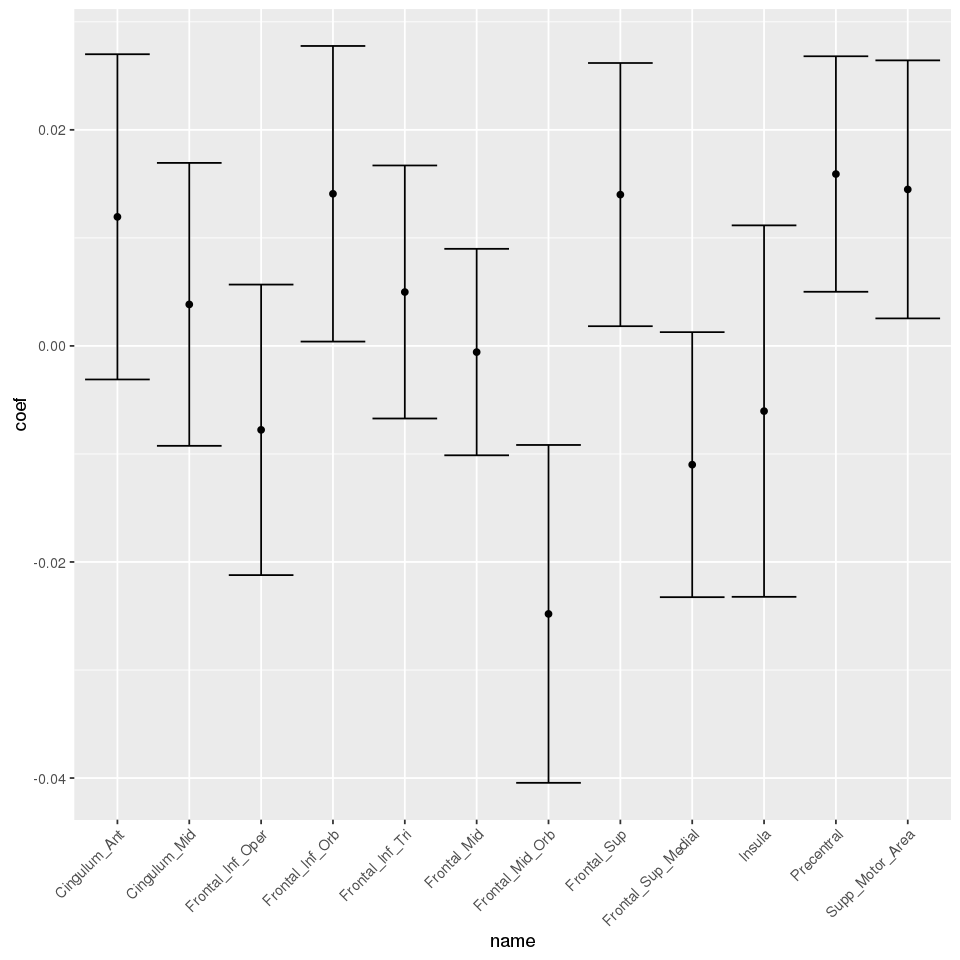

In [467]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

## model with unique observations 

In [476]:
d<-data_r_coll4
nrow(d)

v<-varIdent(form =~1 | PID)
ctrl <- lmeControl(opt='optim');
model= lme(Accuracy.50~Info.type
                  ,random=~1|PID,data=d,method='ML')

summary(model)

[1] 189

Linear mixed-effects model fit by maximum likelihood
 Data: d 
        AIC       BIC   logLik
  -619.7827 -600.3322 315.8913

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.07141724 0.03141763

Fixed effects: Accuracy.50 ~ Info.type 
                       Value  Std.Error  DF  t-value p-value
(Intercept)        0.5866035 0.01215678 134 48.25318  0.0000
Info.typeResponse -0.0073295 0.01069097 134 -0.68558  0.4942
Info.typeRule      0.0116774 0.01165622 134  1.00182  0.3182
Info.typeValue     0.0818141 0.01302434 134  6.28163  0.0000
 Correlation: 
                  (Intr) Inf.typRs Inf.typRl
Info.typeResponse -0.296                    
Info.typeRule     -0.490  0.393             
Info.typeValue    -0.206  0.396     0.192   

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.21604977 -0.44713677 -0.08533151  0.39919295  2.93760808 

Number of Observations: 189
Number of Groups: 52 

In [478]:
d<-data_r_coll4
nrow(d)

v<-varIdent(form =~1 | PID)
ctrl <- lmeControl(opt='optim');
model= lme(Accuracy.50~Info.type+Precentral+Frontal_Mid+Frontal_Mid_Orb+Frontal_Inf_Orb+
                  Frontal_Inf_Oper+Frontal_Inf_Tri+Supp_Motor_Area+Cingulum_Mid+
                  Cingulum_Ant+Frontal_Sup+Frontal_Sup_Medial+Insula
            
                  ,random=~1|PID,data=d,method='ML')

summary(model)

[1] 189

Linear mixed-effects model fit by maximum likelihood
 Data: d 
       AIC       BIC  logLik
  -613.984 -555.6326 324.992

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.07224646 0.02934025

Fixed effects: Accuracy.50 ~ Info.type + Precentral + Frontal_Mid + Frontal_Mid_Orb +      Frontal_Inf_Orb + Frontal_Inf_Oper + Frontal_Inf_Tri + Supp_Motor_Area +      Cingulum_Mid + Cingulum_Ant + Frontal_Sup + Frontal_Sup_Medial +      Insula 
                        Value   Std.Error  DF  t-value p-value
(Intercept)         0.5842106 0.013602176 122 42.94979  0.0000
Info.typeResponse  -0.0074649 0.010429860 122 -0.71573  0.4755
Info.typeRule       0.0134594 0.011662551 122  1.15407  0.2507
Info.typeValue      0.0836926 0.012698382 122  6.59080  0.0000
Precentral          0.0082578 0.010800030 122  0.76461  0.4460
Frontal_Mid         0.0045554 0.007851795 122  0.58018  0.5629
Frontal_Mid_Orb    -0.0240103 0.011109505 122 -2.16124  0.0326
Frontal_Inf_Orb     0.0112767

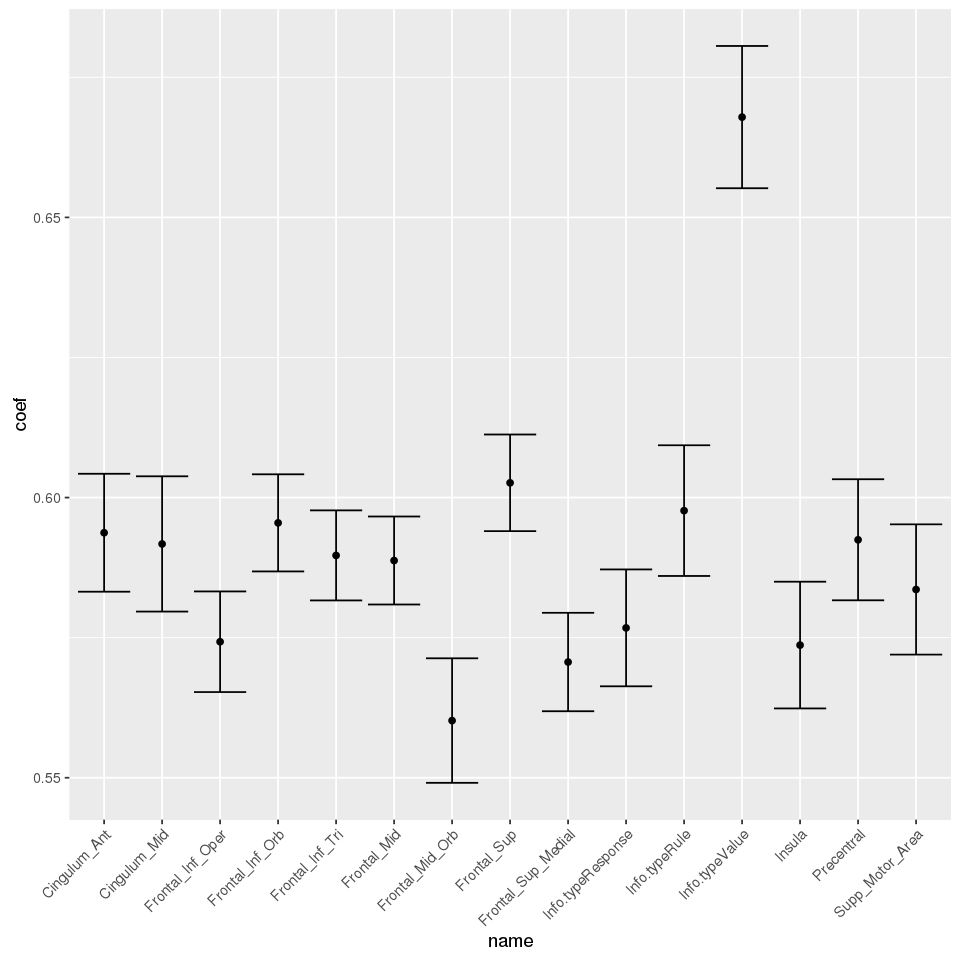

In [474]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

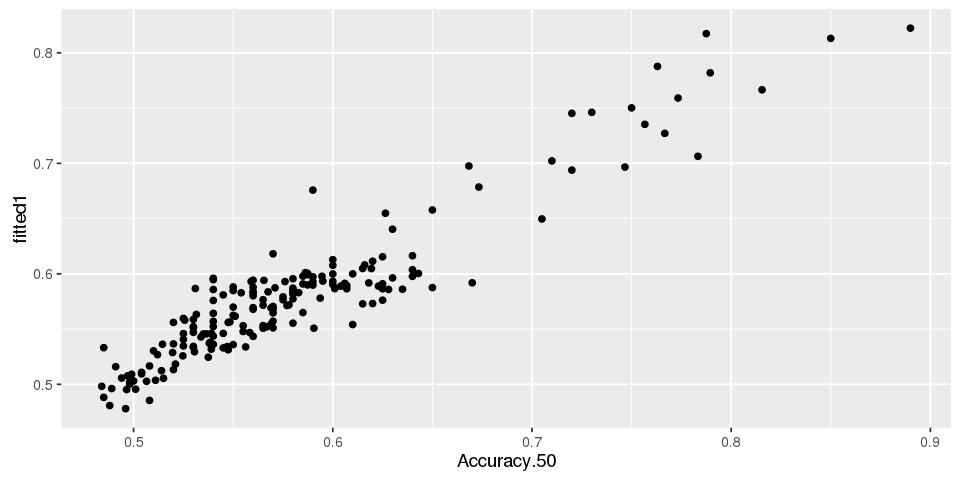

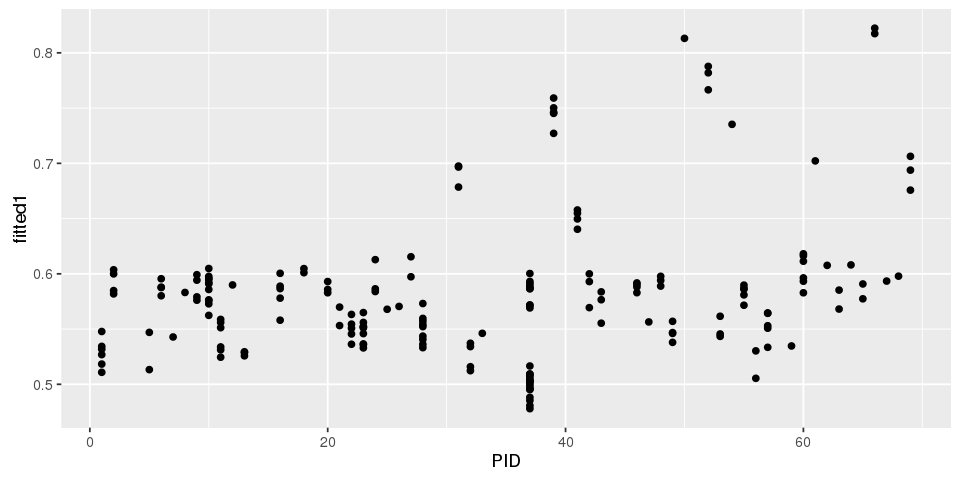

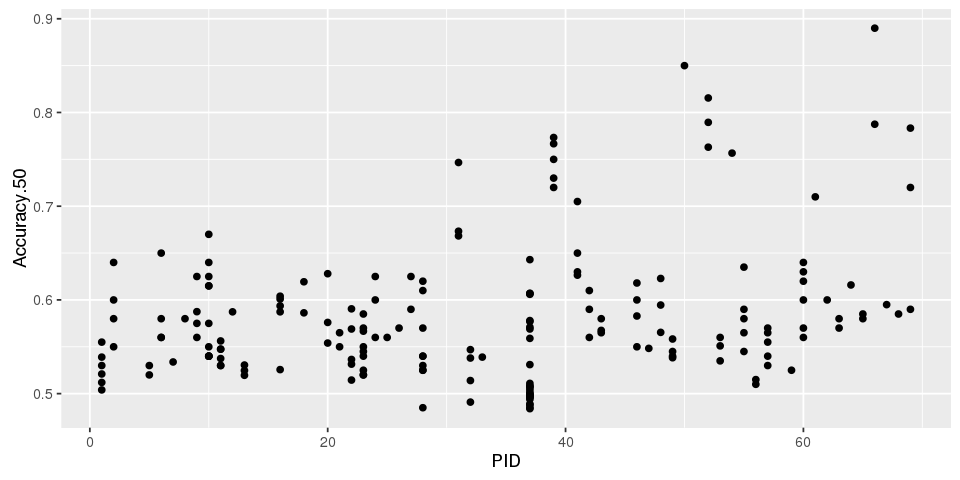

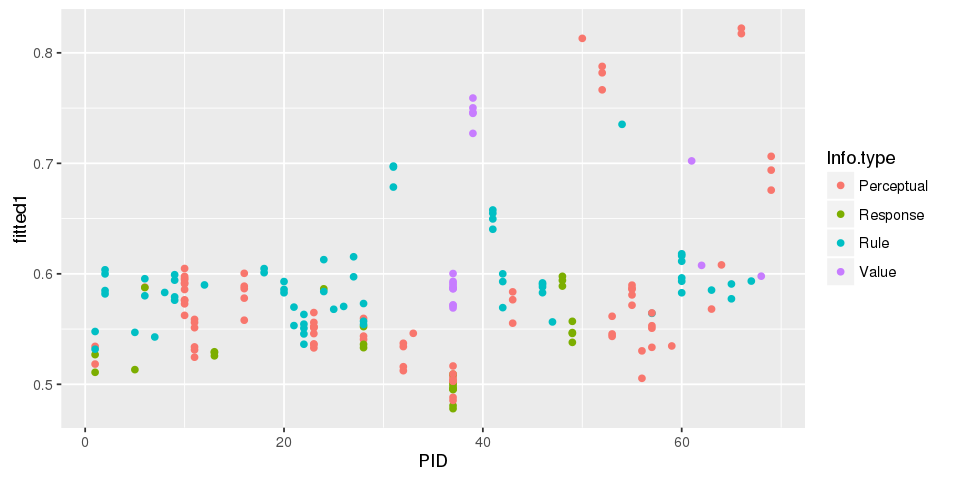

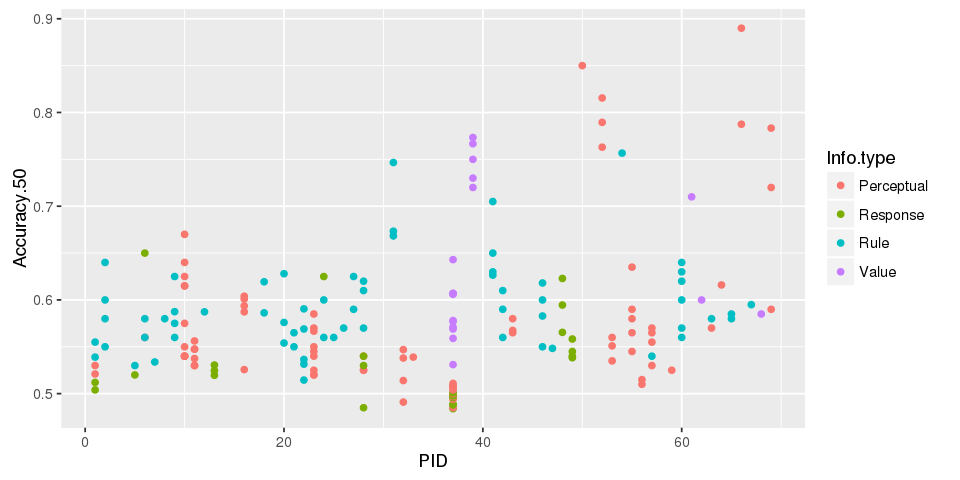

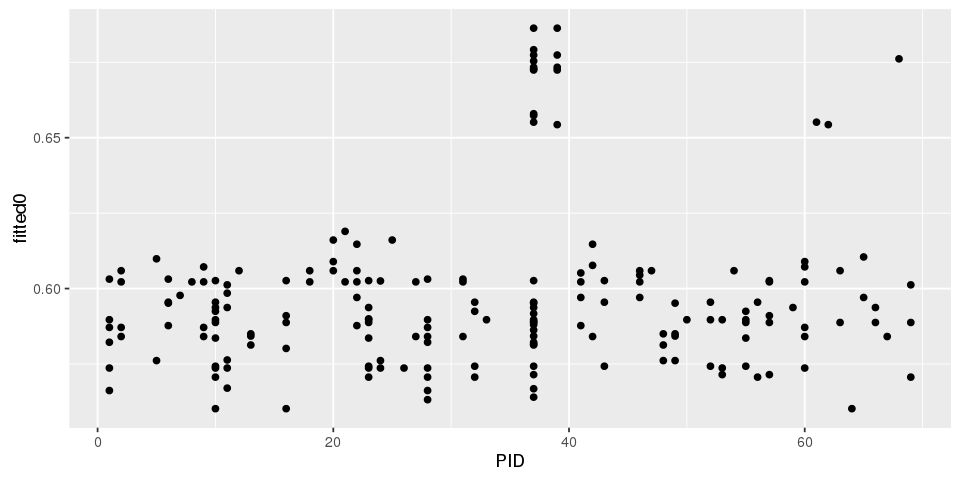

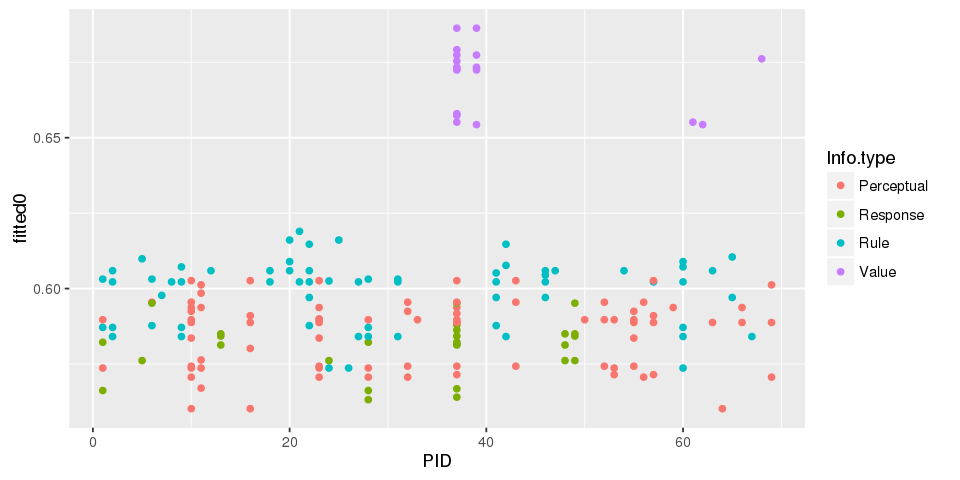

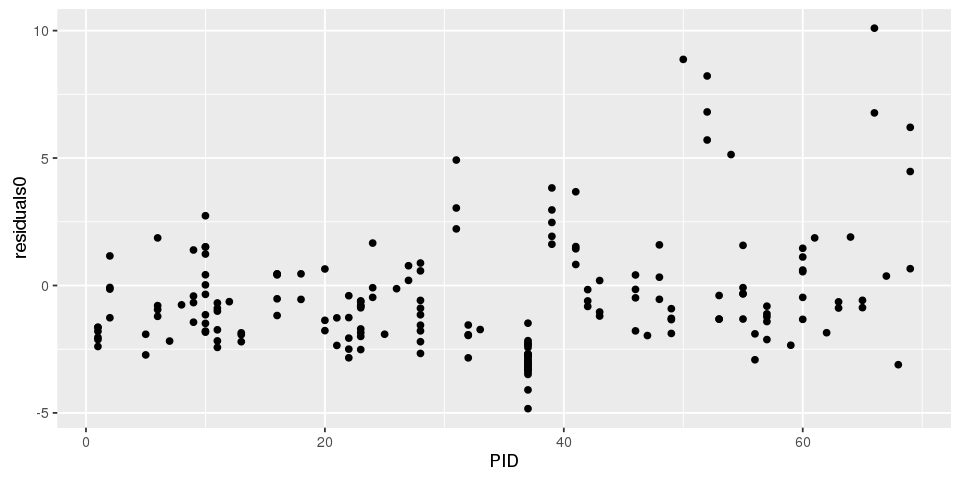

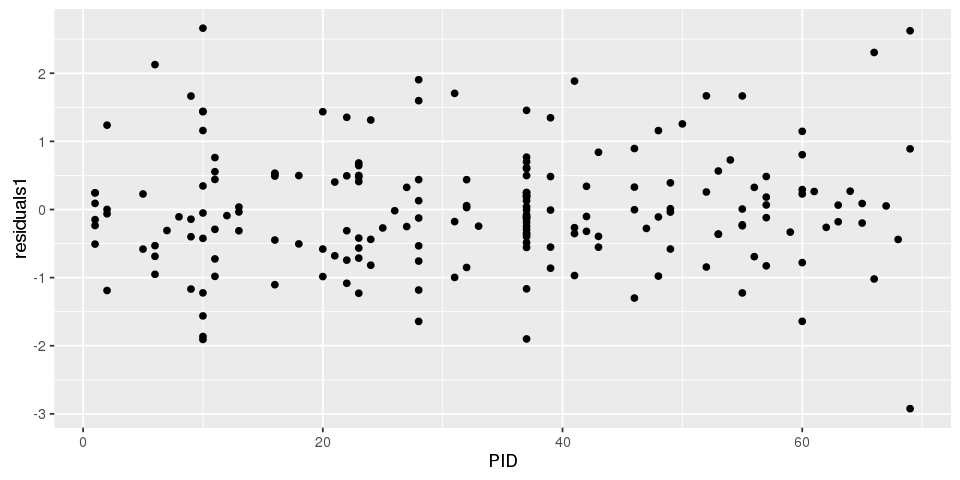

In [479]:
d$residuals1 = residuals(model, level = 1,type = c("pearson"))
d$residuals0 = residuals(model, level = 0,type = c("pearson"))
d$fitted1 = fitted(model, level = 1)
d$fitted0 = fitted(model, level = 0)

options(repr.plot.width=8, repr.plot.height=4)
ggplot(aes(y = fitted1, x = Accuracy.50), data = d) +geom_point()
ggplot(aes(y = fitted1, x = PID), data = d) +geom_point()
ggplot(aes(y = Accuracy.50, x = PID), data = d) +geom_point()

ggplot(aes(y = fitted1, x = PID,color=Info.type), data = d) +geom_point()
ggplot(aes(y = Accuracy.50, x = PID,color=Info.type), data = d) +geom_point()

ggplot(aes(y = fitted0, x = PID), data = d) +geom_point()
ggplot(aes(y = fitted0, x = PID,color=Info.type), data = d) +geom_point()

ggplot(aes(y = residuals0,x=PID), data = d)+geom_point()
ggplot(aes(y = residuals1,x=PID), data = d)+geom_point()


## model variable sigma

In [379]:
d<-data_r_coll3[data_r_coll3$n_per_study>6,]
nrow(d)

v<-varIdent(form =~1 | PID)
ctrl <- lmeControl(opt='optim');
model_w_var = lme(Accuracy.50~Info.type+Precentral+Frontal_Mid+Frontal_Mid_Orb+Frontal_Inf_Orb+
                  Frontal_Inf_Oper+Frontal_Inf_Tri+Supp_Motor_Area+Cingulum_Mid+
                  Cingulum_Ant+Frontal_Sup+Frontal_Sup_Medial+Insula
            
                  ,random=~1|PID,data=d,method='ML',weights=v,control=ctrl)

summary(model_w_var)

[1] 573

Linear mixed-effects model fit by maximum likelihood
 Data: d 
        AIC       BIC   logLik
  -1832.076 -1662.391 955.0378

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.04440164 0.02339303

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | PID 
 Parameter estimates:
        1         7         9        10        11        13        16        18 
1.0000000 1.5746929 4.1300953 2.2691922 0.6338336 1.3674190 3.8124285 2.7715969 
       22        23        28        31        37        39        41        43 
1.3155585 0.9366695 1.6818815 1.8539214 0.8519689 1.3743952 2.3368225 2.4610912 
       46        48        49        55        57        69 
1.2204744 5.2309274 0.8513796 1.2538172 1.2642373 5.0943349 
Fixed effects: Accuracy.50 ~ Info.type + Precentral + Frontal_Mid + Frontal_Mid_Orb +      Frontal_Inf_Orb + Frontal_Inf_Oper + Frontal_Inf_Tri + Supp_Motor_Area +      Cingulum_Mid + Cingulum_Ant + Frontal_Sup + Fr

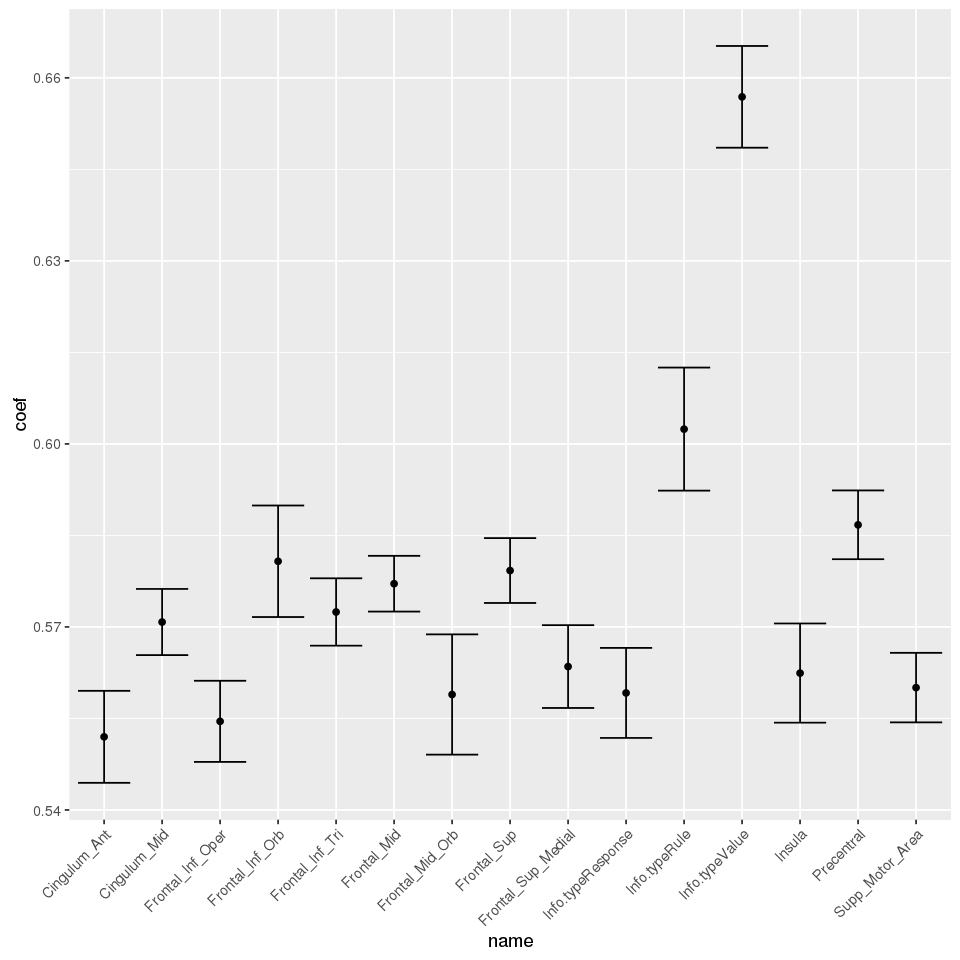

In [380]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model_w_var)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [385]:
d$residuals1 = residuals(model_w_var, level = 1,type = c("pearson"))
d$residuals0 = residuals(model_w_var, level = 0,type = c("pearson"))
d$fitted1 = fitted(model_w_var, level = 1)
d$fitted0 = fitted(model_w_var, level = 0)



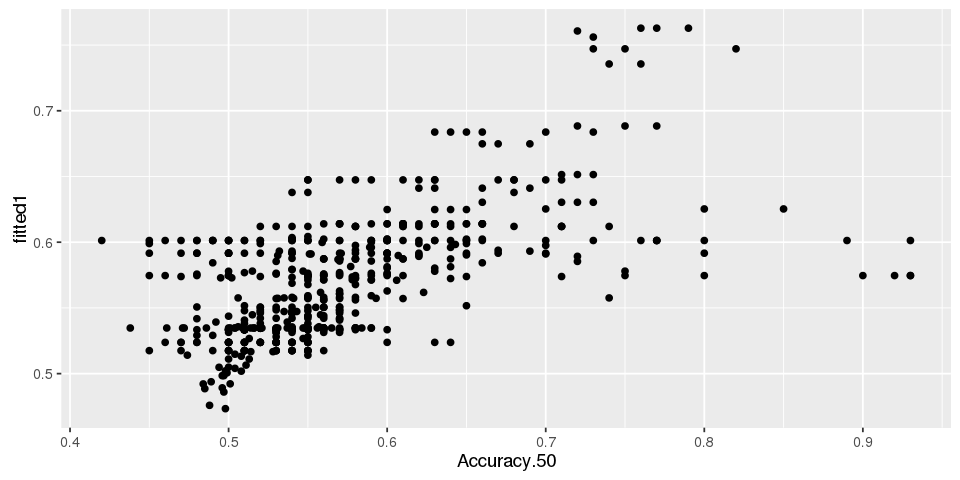

In [386]:
ggplot(aes(y = fitted1, x = Accuracy.50), data = d) +geom_point()

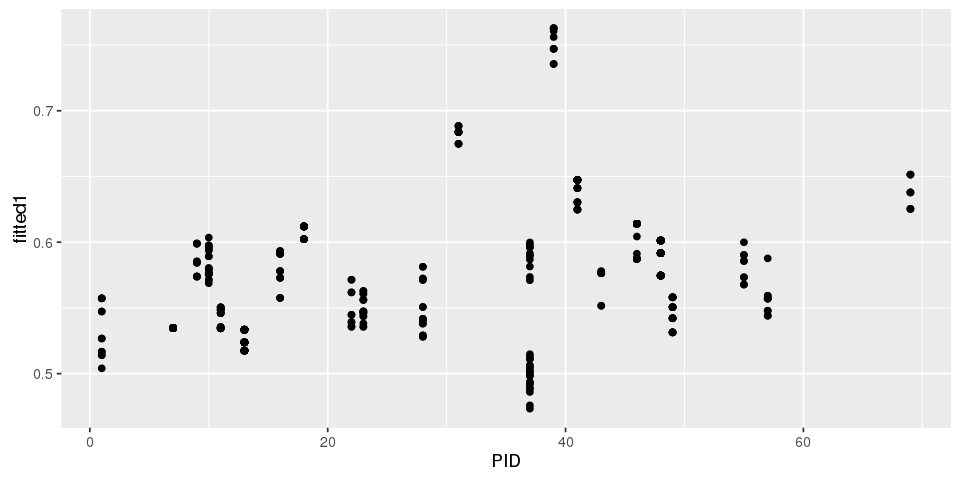

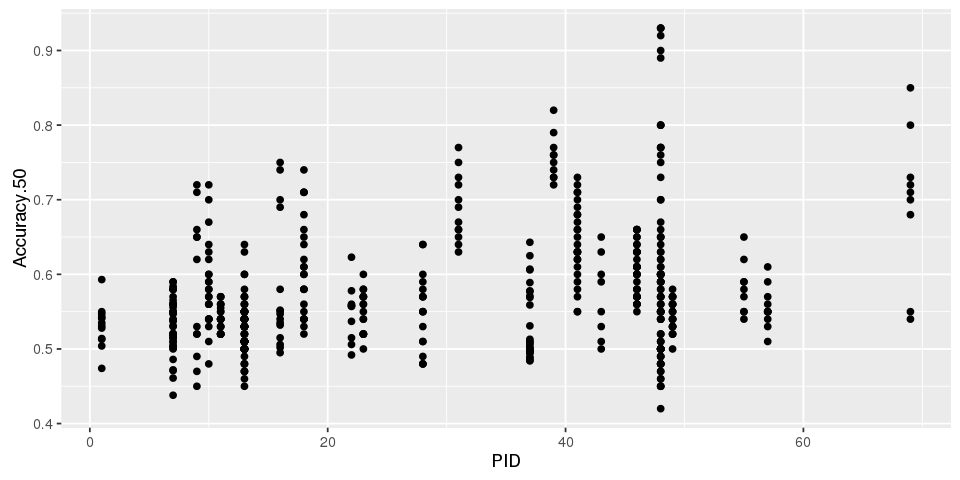

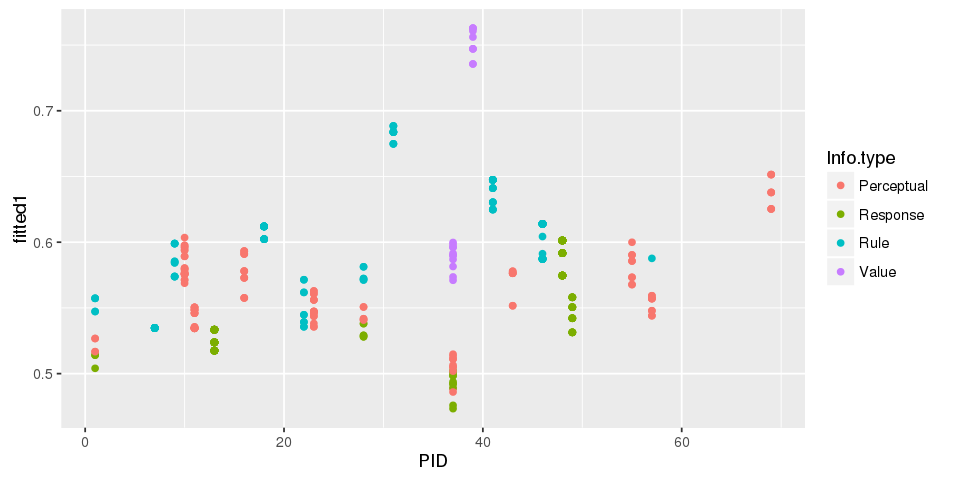

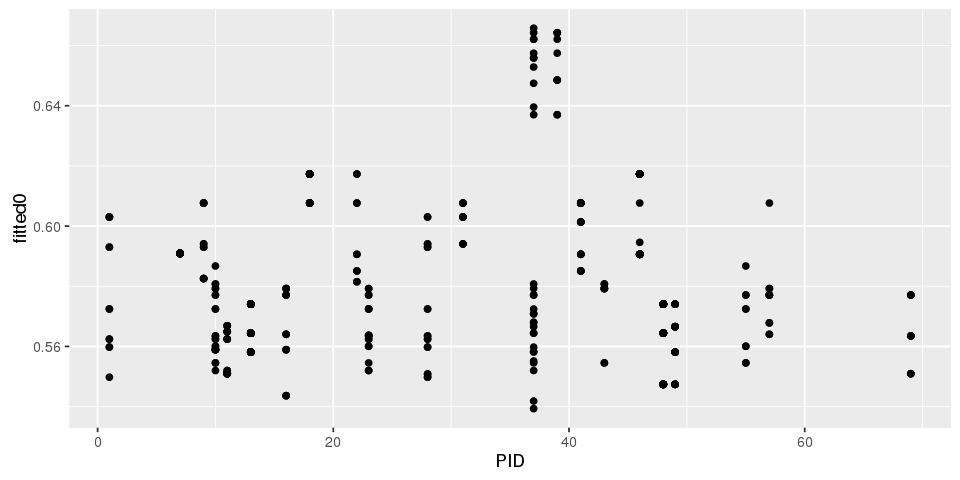

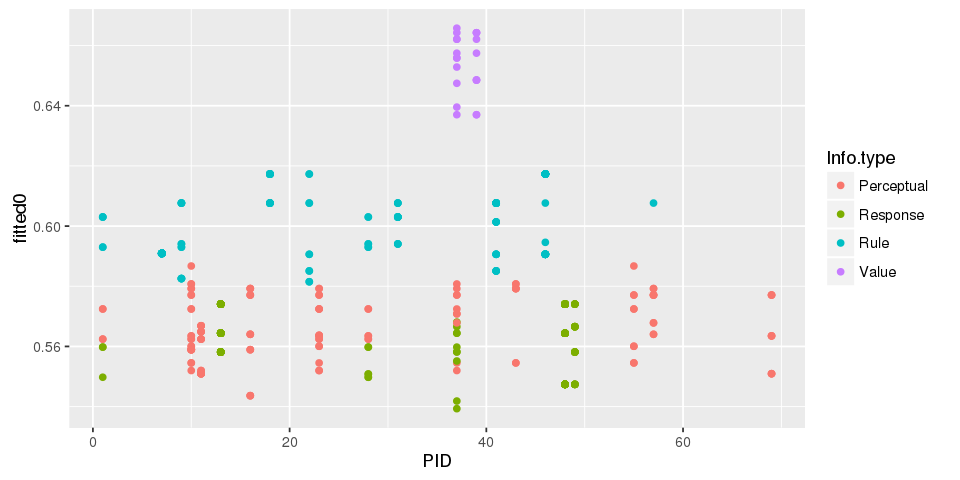

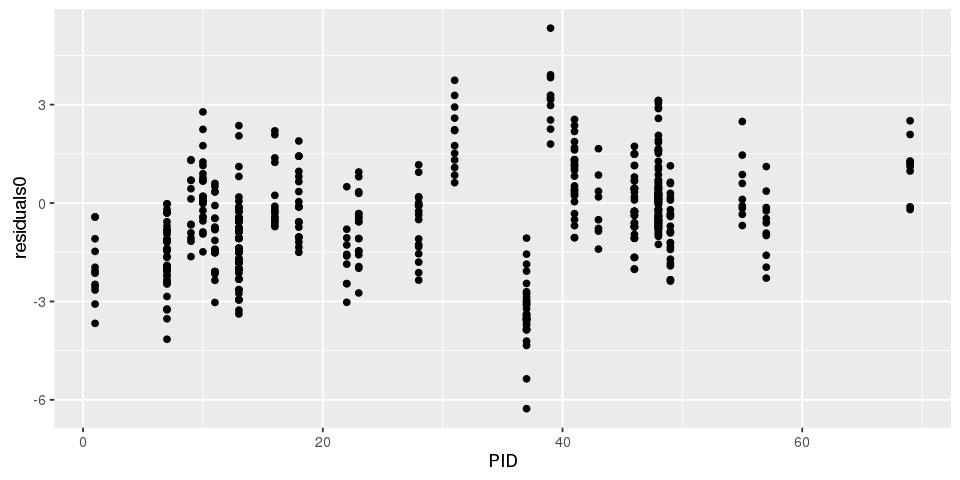

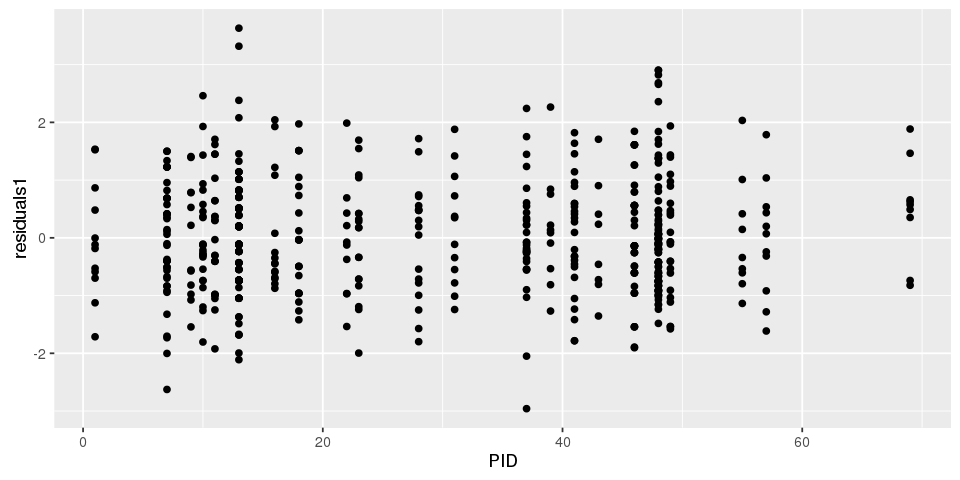

In [387]:


options(repr.plot.width=8, repr.plot.height=4)


ggplot(aes(y = fitted1, x = PID), data = d) +geom_point()
ggplot(aes(y = Accuracy.50, x = PID), data = d) +geom_point()

ggplot(aes(y = fitted1, x = PID,color=Info.type), data = d) +geom_point()
ggplot(aes(y = fitted0, x = PID), data = d) +geom_point()
ggplot(aes(y = fitted0, x = PID,color=Info.type), data = d) +geom_point()

ggplot(aes(y = residuals0,x=PID), data = d)+geom_point()
ggplot(aes(y = residuals1,x=PID), data = d)+geom_point()

#ggplot(aes(y=residuals,x = fitted_fixed,), data = d)+geom_point()
#ggplot(aes(y=residuals_random,x = fitted_pid,), data = d)+geom_point()
#ggplot(aes(y = residuals_fixed,x=Info.type), data = d)+geom_point()


# Region Model (Full)

In [358]:
d<-data_r_coll3[data_r_coll3$n_per_study>6,]
nrow(d)

v<-varIdent(form =~1 | PID)
ctrl <- lmeControl(opt='optim');
model_wo_var = lme(Accuracy.50~Precentral+Frontal_Mid+Frontal_Mid_Orb+Frontal_Inf_Orb+
                  Frontal_Inf_Oper+Frontal_Inf_Tri+Supp_Motor_Area+Cingulum_Mid+
                  Cingulum_Ant+Frontal_Sup+Frontal_Sup_Medial+Insula
            
                  ,random=~1|PID,data=d,method='ML',control=ctrl)

summary(model_wo_var)

[1] 573

Linear mixed-effects model fit by maximum likelihood
 Data: d 
        AIC       BIC  logLik
  -1418.872 -1353.609 724.436

Random effects:
 Formula: ~1 | PID
        (Intercept)  Residual
StdDev:  0.05621441 0.0648052

Fixed effects: Accuracy.50 ~ Precentral + Frontal_Mid + Frontal_Mid_Orb + Frontal_Inf_Orb +      Frontal_Inf_Oper + Frontal_Inf_Tri + Supp_Motor_Area + Cingulum_Mid +      Cingulum_Ant + Frontal_Sup + Frontal_Sup_Medial + Insula 
                        Value  Std.Error  DF  t-value p-value
(Intercept)         0.5823167 0.01562270 539 37.27377  0.0000
Precentral          0.0181784 0.01254901 539  1.44859  0.1480
Frontal_Mid         0.0011194 0.01091601 539  0.10255  0.9184
Frontal_Mid_Orb    -0.0336574 0.01837142 539 -1.83205  0.0675
Frontal_Inf_Orb     0.0249108 0.01766161 539  1.41045  0.1590
Frontal_Inf_Oper   -0.0121724 0.01532414 539 -0.79433  0.4274
Frontal_Inf_Tri     0.0011954 0.01351621 539  0.08844  0.9296
Supp_Motor_Area     0.0167524 0.01317263 539  1.27176 

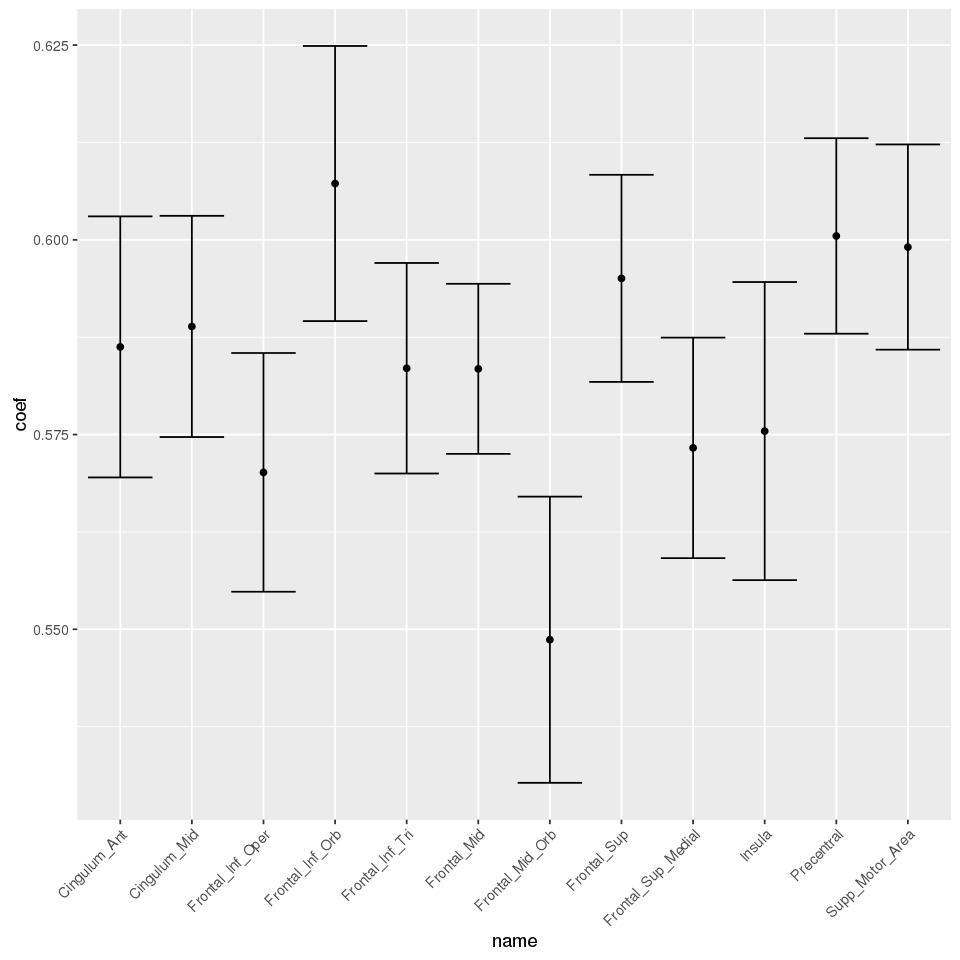

In [361]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model_wo_var)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [277]:
#

model_wo_var = lme(Accuracy.50~Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R,random=~1|PID,data=d,method='ML',weights=varIdent(form =~1 | PID))

summary(model_wo_var)


model_w_var = lme(Accuracy.50~Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R,random=~1|PID,data=data_r_coll0[data_r_coll0$n_per_study>1,],method='ML',weights=varIdent(form =~1 | PID))

summary(model_w_var)

ERROR: Error in MEestimate(lmeSt, grps): Singularity in backsolve at level 0, block 1


ERROR: Error in summary(model_wo_var): object 'model_wo_var' not found


ERROR: Error in MEestimate(lmeSt, grps): Singularity in backsolve at level 0, block 1


ERROR: Error in summary(model_w_var): object 'model_w_var' not found


In [245]:
model3 = lme(Accuracy.50~Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R,random=~1|PID,data=data_50,method='ML')

#summary(model3)

model3b = lme(Accuracy.50~.,random=~1|PID,data=data_50,method='ML')

anova(model3,model3b)

Model df       AIC       BIC   logLik   Test L.Ratio p-value
model3      1 29 -1647.217 -1516.550 852.6086                       
model3b     2  4 -1681.511 -1663.488 844.7557 1 vs 2 15.7059  0.9233

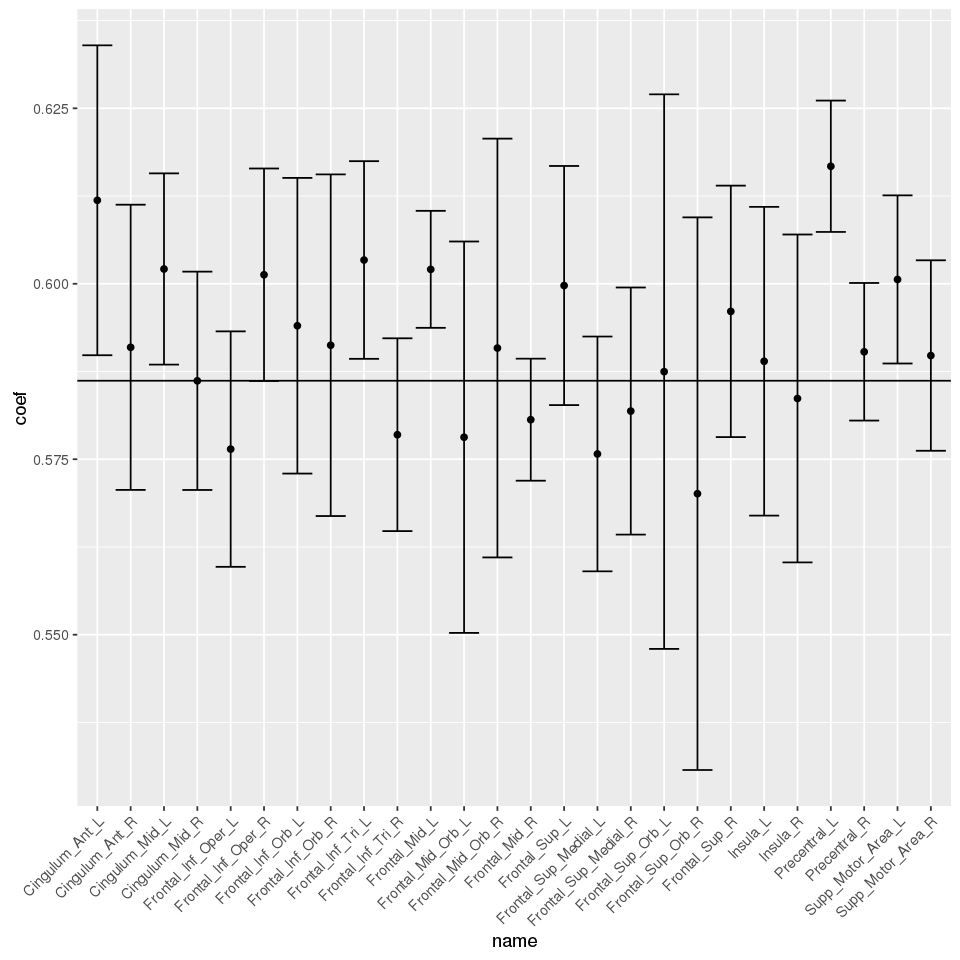

In [422]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model3)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))+geom_hline(yintercept=coef[1])

In [416]:
write.table(coef,'coef_model_no_collapse.csv')



In [395]:
s<-summary(model3)
coef<-s$tTable[,1] 
coef_df = data.frame(coef)
print(rownames(coef_df))
print('')
print('constrast l v r')
cc = rep(0,length(coef))
cc[grep('_L',rownames(coef_df))]=1
cc[grep('_R',rownames(coef_df))]=-1
cc

print('constrast sup')
cc2 = rep(0,length(coef))
cc2[grep('_Sup',rownames(coef_df))]=1/length(grep('_Sup',rownames(coef_df)))
#cc2[1]=1
cc2


print('constrast mid')
cc3 = rep(0,length(coef))
cc3[grep('_Mid',rownames(coef_df))]=1/length(grep('_Mid',rownames(coef_df)))
#cc3[1]=1
cc3

print('constrast inf')
cc4 = rep(0,length(coef))
cc4[grep('_Inf',rownames(coef_df))]=1/length(grep('_Inf',rownames(coef_df)))
#cc4[1]=1
cc4

print('constrast Orb')
cc5 = rep(0,length(coef))
cc5[grep('_Orb',rownames(coef_df))]=1/length(grep('_Orb',rownames(coef_df)))
cc5



print('constrast cin')
cc6 = rep(0,length(coef))
cc6[grep('Cing',rownames(coef_df))]=1/length(grep('Cing',rownames(coef_df)))
#cc6[1]=1
cc6

print('constrast pre')
cc7 = rep(0,length(coef))
cc7[grep('Precent',rownames(coef_df))]=1/length(grep('Precent',rownames(coef_df)))
cc7

print('constrast precentral L - Frontal Mid R')
cc8 = rep(0,length(coef))
cc8[grep('Precentral_L',rownames(coef_df))]=1

cc8

# left vs right 
K <- rbind(cc,cc2,cc3,cc4,cc5,cc6,cc7,cc8)

# sup, mid, inf, cing, Supp, Med, Post/Pre

t <- glht(model3, linfct = K)
summary(t)

 [1] "(Intercept)"          "Frontal_Sup_L"        "Frontal_Sup_R"       
 [4] "Frontal_Sup_Orb_L"    "Frontal_Sup_Orb_R"    "Frontal_Mid_L"       
 [7] "Frontal_Mid_R"        "Frontal_Mid_Orb_L"    "Frontal_Mid_Orb_R"   
[10] "Frontal_Inf_Oper_L"   "Frontal_Inf_Oper_R"   "Frontal_Inf_Tri_L"   
[13] "Frontal_Inf_Tri_R"    "Frontal_Inf_Orb_L"    "Frontal_Inf_Orb_R"   
[16] "Supp_Motor_Area_L"    "Supp_Motor_Area_R"    "Frontal_Sup_Medial_L"
[19] "Frontal_Sup_Medial_R" "Insula_L"             "Insula_R"            
[22] "Cingulum_Ant_L"       "Cingulum_Ant_R"       "Cingulum_Mid_L"      
[25] "Cingulum_Mid_R"       "Precentral_L"         "Precentral_R"        
[1] ""
[1] "constrast l v r"


[1]  0  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1
[26]  1 -1

[1] "constrast sup"


[1] 0.0000000 0.1666667 0.1666667 0.1666667 0.1666667 0.0000000 0.0000000
 [8] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[15] 0.0000000 0.0000000 0.0000000 0.1666667 0.1666667 0.0000000 0.0000000
[22] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000

[1] "constrast mid"


[1] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.1666667 0.1666667
 [8] 0.1666667 0.1666667 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[15] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[22] 0.0000000 0.0000000 0.1666667 0.1666667 0.0000000 0.0000000

[1] "constrast inf"


[1] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [8] 0.0000000 0.0000000 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667
[15] 0.1666667 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[22] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000

[1] "constrast Orb"


[1] 0.0000000 0.0000000 0.0000000 0.1666667 0.1666667 0.0000000 0.0000000
 [8] 0.1666667 0.1666667 0.0000000 0.0000000 0.0000000 0.0000000 0.1666667
[15] 0.1666667 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[22] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000

[1] "constrast cin"


[1] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
[16] 0.00 0.00 0.00 0.00 0.00 0.00 0.25 0.25 0.25 0.25 0.00 0.00

[1] "constrast pre"


[1] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
[20] 0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.5

[1] "constrast precentral L - Frontal Mid R"


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0


	 Simultaneous Tests for General Linear Hypotheses

Fit: lme.formula(fixed = Accuracy.50 ~ Frontal_Sup_L + Frontal_Sup_R + 
    Frontal_Sup_Orb_L + Frontal_Sup_Orb_R + Frontal_Mid_L + Frontal_Mid_R + 
    Frontal_Mid_Orb_L + Frontal_Mid_Orb_R + Frontal_Inf_Oper_L + 
    Frontal_Inf_Oper_R + Frontal_Inf_Tri_L + Frontal_Inf_Tri_R + 
    Frontal_Inf_Orb_L + Frontal_Inf_Orb_R + Supp_Motor_Area_L + 
    Supp_Motor_Area_R + Frontal_Sup_Medial_L + Frontal_Sup_Medial_R + 
    Insula_L + Insula_R + Cingulum_Ant_L + Cingulum_Ant_R + Cingulum_Mid_L + 
    Cingulum_Mid_R + Precentral_L + Precentral_R, data = data_50, 
    random = ~1 | PID, method = "ML")

Linear Hypotheses:
           Estimate Std. Error z value Pr(>|z|)   
cc == 0   0.1059554  0.1011067   1.048  0.90800   
cc2 == 0 -0.0010171  0.0058223  -0.175  1.00000   
cc3 == 0  0.0038079  0.0065450   0.582  0.99696   
cc4 == 0  0.0046278  0.0034144   1.355  0.73198   
cc5 == 0 -0.0008805  0.0035727  -0.246  0.99999   
cc6 == 0  0.0115969  

## leaving out precentral R (indicates multi-collinearity is not an issue) 

In [15]:
model4 = lme(Accuracy.50~Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_R,random=~1|PID,data=data_50)

#summary(model3)

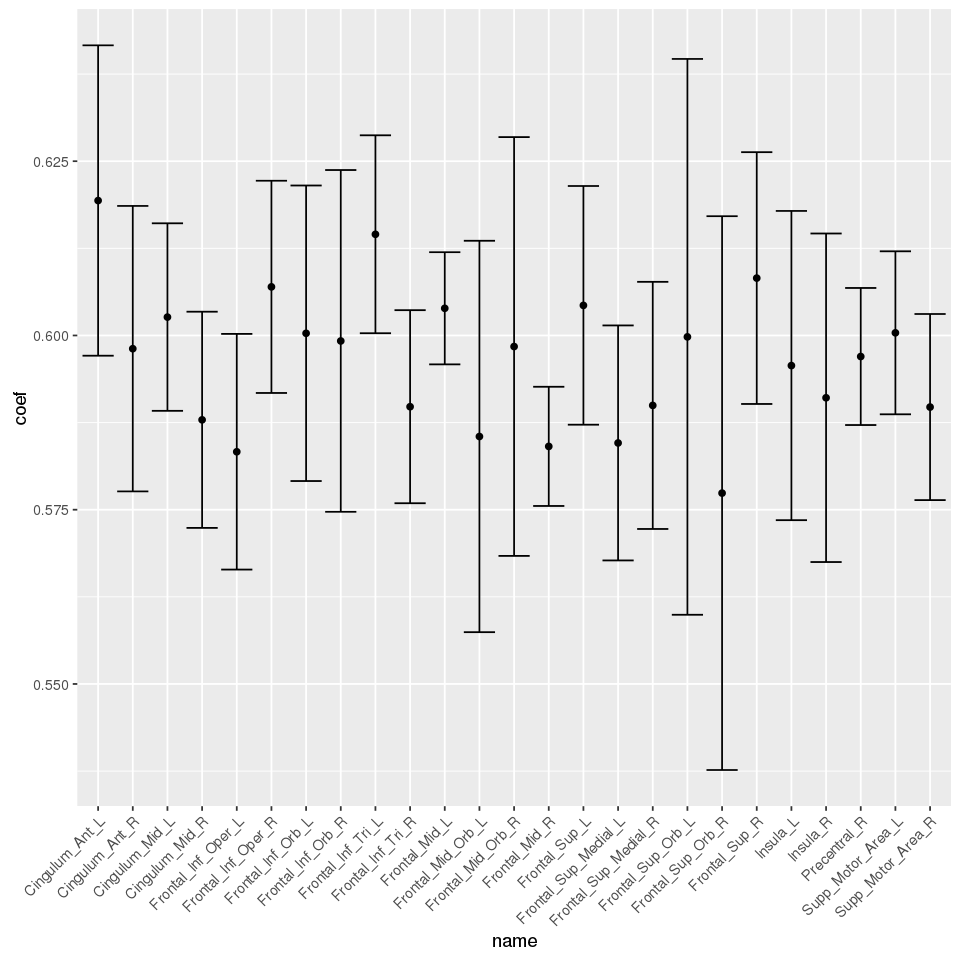

In [16]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model4)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

### leaving out intercept instead

In [17]:
model5 = lme(Accuracy.50~Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R-1,random=~1|PID,data=data_50)

#summary(model3)

In [398]:
coef

(Intercept)        Frontal_Sup_L        Frontal_Sup_R 
        5.861858e-01         1.356071e-02         9.883157e-03 
   Frontal_Sup_Orb_L    Frontal_Sup_Orb_R        Frontal_Mid_L 
        1.297099e-03        -1.609188e-02         1.587057e-02 
       Frontal_Mid_R    Frontal_Mid_Orb_L    Frontal_Mid_Orb_R 
       -5.551879e-03        -8.044972e-03         4.660137e-03 
  Frontal_Inf_Oper_L   Frontal_Inf_Oper_R    Frontal_Inf_Tri_L 
       -9.740134e-03         1.510027e-02         1.720108e-02 
   Frontal_Inf_Tri_R    Frontal_Inf_Orb_L    Frontal_Inf_Orb_R 
       -7.690960e-03         7.836075e-03         5.060573e-03 
   Supp_Motor_Area_L    Supp_Motor_Area_R Frontal_Sup_Medial_L 
        1.443067e-02         3.589289e-03        -1.043042e-02 
Frontal_Sup_Medial_R             Insula_L             Insula_R 
       -4.321150e-03         2.778120e-03        -2.526933e-03 
      Cingulum_Ant_L       Cingulum_Ant_R       Cingulum_Mid_L 
        2.570947e-02         4.764516e-03         1.592161e-02 
      Cingulum_Mid_R         Precentral_L         Precentral_R 
       -7.952883e-06         3.055847e-02         4.125751e-03

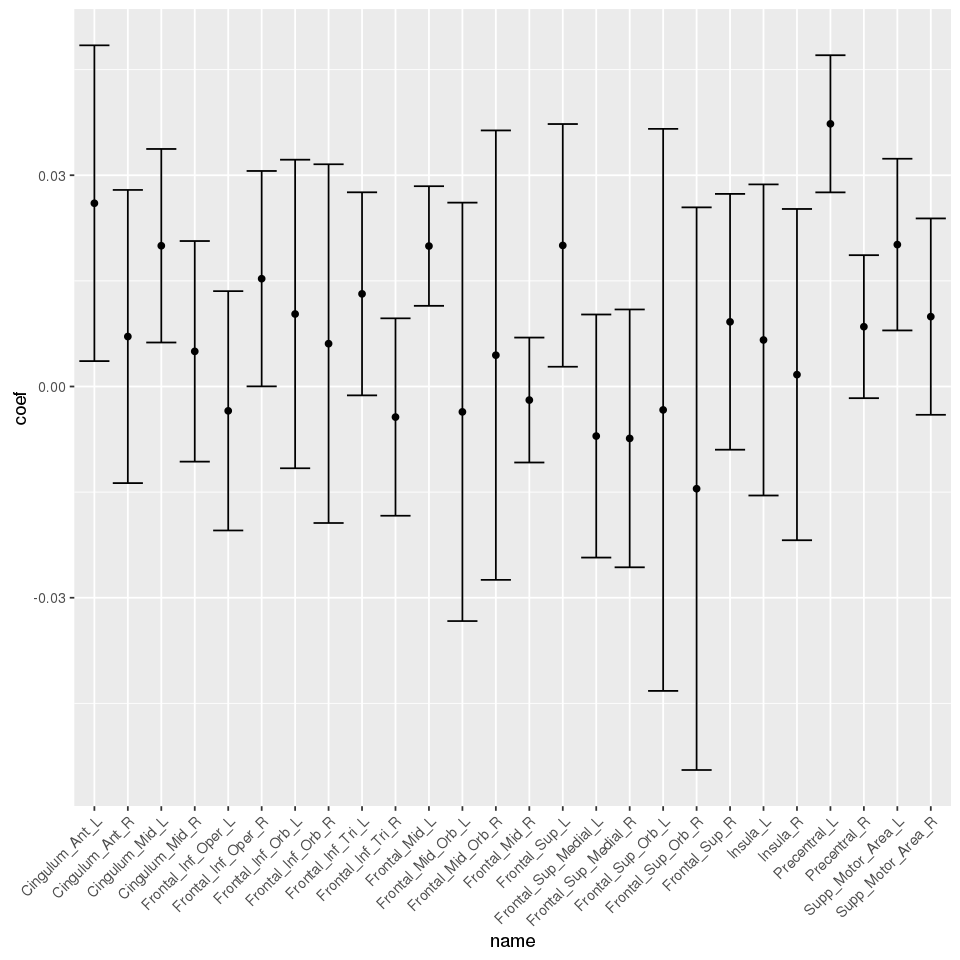

In [400]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model5)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
#df<-df[2:nrow(df)+1,]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Regression on Collapsing Regions

In [19]:
#head(data1)
data = cbind(data1,data2)



variables = c(c('Accuracy.50','PID'),colnames(data2))
variables
#data[,variables]
data_50<-data[!is.na(data$Accuracy.50),variables]
nrow(data_50)



[1] "Accuracy.50"         "PID"                 "Frontal_Sup"        
 [4] "Frontal_Sup_Medial"  "Frontal_Sup_Mid_Orb" "Frontal_Mid_L"      
 [7] "Frontal_Mid_R"       "Frontal_Inf_Orb"     "Insula"             
[10] "Cingulum_Ant"        "Frontal_Inf_Oper_L"  "Frontal_Inf_Oper_R" 
[13] "Frontal_Inf_Tri_L"   "Frontal_Inf_Tri_R"   "Supp_Motor_Area_L"  
[16] "Supp_Motor_Area_R"   "Cingulum_Mid_L"      "Cingulum_Mid_R"     
[19] "Precentral_L"        "Precentral_R"

[1] 669

In [20]:
model1 = lme(Accuracy.50~Frontal_Sup+Frontal_Sup_Medial+Frontal_Sup_Mid_Orb+
            Frontal_Mid_L+Frontal_Mid_R+Frontal_Inf_Orb+Insula+Cingulum_Ant+
            Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R+Supp_Motor_Area_L+
            Supp_Motor_Area_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R,random=~1|PID,data=data_50,method='ML')

model1b = lme(Accuracy.50~.,random=~1|PID,data=data_50,method='ML')

anova(model1,model1b)

Model df       AIC       BIC   logLik   Test  L.Ratio p-value
model1      1 21 -1662.666 -1568.045 852.3330                        
model1b     2  4 -1681.511 -1663.488 844.7557 1 vs 2 15.15467  0.5843

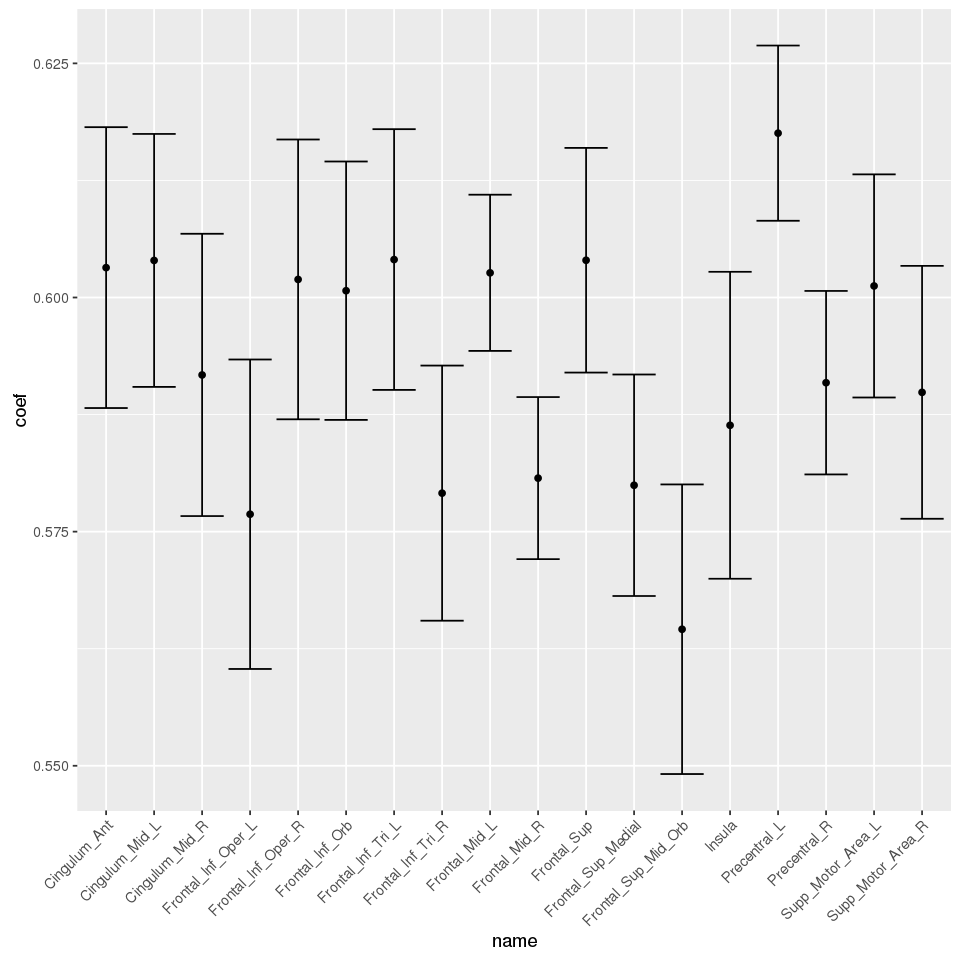

In [21]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model1)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [22]:
s<-summary(model1)
coef<-s$tTable[,1] 
coef_df = data.frame(coef)
print(rownames(coef_df))
print('')
print('constrast l v r')
cc = rep(0,length(coef))
cc[grep('_L',rownames(coef_df))]=1
cc[grep('_R',rownames(coef_df))]=-1
cc

print('constrast sup')
cc2 = rep(0,length(coef))
cc2[grep('_Sup',rownames(coef_df))]=1
cc2[1]=1
cc2


print('constrast mid')
cc3 = rep(0,length(coef))
cc3[grep('_Mid',rownames(coef_df))]=1
cc3[1]=1
cc3

print('constrast inf')
cc4 = rep(0,length(coef))
cc4[grep('_Inf',rownames(coef_df))]=1
cc4[1]=1
cc4

print('constrast Orb')
cc5 = rep(0,length(coef))
cc5[grep('_Orb',rownames(coef_df))]=1
cc5

print('constrast cin')
cc6 = rep(0,length(coef))
cc6[grep('Cing',rownames(coef_df))]=1
cc6

print('constrast pre')
cc7 = rep(0,length(coef))
cc7[grep('Precent',rownames(coef_df))]=1
cc7

# left vs right 
K <- rbind(cc,cc2,cc3,cc4,cc5,cc6,cc7)

# sup, mid, inf, cing, Supp, Med, Post/Pre

t <- glht(model1, linfct = K)
summary(t)

 [1] "(Intercept)"         "Frontal_Sup"         "Frontal_Sup_Medial" 
 [4] "Frontal_Sup_Mid_Orb" "Frontal_Mid_L"       "Frontal_Mid_R"      
 [7] "Frontal_Inf_Orb"     "Insula"              "Cingulum_Ant"       
[10] "Frontal_Inf_Oper_L"  "Frontal_Inf_Oper_R"  "Frontal_Inf_Tri_L"  
[13] "Frontal_Inf_Tri_R"   "Supp_Motor_Area_L"   "Supp_Motor_Area_R"  
[16] "Cingulum_Mid_L"      "Cingulum_Mid_R"      "Precentral_L"       
[19] "Precentral_R"       
[1] ""
[1] "constrast l v r"


[1]  0  0  0  0  1 -1  0  0  0  1 -1  1 -1  1 -1  1 -1  1 -1

[1] "constrast sup"


[1] 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1] "constrast mid"


[1] 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0

[1] "constrast inf"


[1] 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0

[1] "constrast Orb"


[1] 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0

[1] "constrast cin"


[1] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0

[1] "constrast pre"


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1


	 Simultaneous Tests for General Linear Hypotheses

Fit: lme.formula(fixed = Accuracy.50 ~ Frontal_Sup + Frontal_Sup_Medial + 
    Frontal_Sup_Mid_Orb + Frontal_Mid_L + Frontal_Mid_R + Frontal_Inf_Orb + 
    Insula + Cingulum_Ant + Frontal_Inf_Oper_L + Frontal_Inf_Oper_R + 
    Frontal_Inf_Tri_L + Frontal_Inf_Tri_R + Supp_Motor_Area_L + 
    Supp_Motor_Area_R + Cingulum_Mid_L + Cingulum_Mid_R + Precentral_L + 
    Precentral_R, data = data_50, random = ~1 | PID, method = "ML")

Linear Hypotheses:
          Estimate Std. Error z value Pr(>|z|)    
cc == 0   0.072026   0.038160   1.887   0.3178    
cc2 == 0  0.573969   0.022312  25.725   <0.001 ***
cc3 == 0  0.594540   0.029201  20.360   <0.001 ***
cc4 == 0  0.613599   0.020054  30.597   <0.001 ***
cc5 == 0 -0.009238   0.016489  -0.560   0.9958    
cc6 == 0  0.037068   0.022283   1.664   0.4669    
cc7 == 0  0.033909   0.014066   2.411   0.0986 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values rep

## Regression on Collapsing Regions 2

In [23]:
#head(data1)
data = cbind(data1,data4)


variables = c(c('Accuracy.50','PID'),colnames(data4))
variables
#data[,variables]
data_50<-data[!is.na(data$Accuracy.50),variables]
nrow(data_50)

[1] "Accuracy.50" "PID"         "Frontal_Sup" "Frontal_Mid" "Frontal_Inf"
[6] "Insula"      "Motor"       "Cingulum"

[1] 669

In [24]:
model6 = lme(Accuracy.50~Frontal_Sup+Frontal_Mid+Frontal_Inf+Insula+Motor+Cingulum,random=~1|PID,data=data_50,method='ML')
model6b = lme(Accuracy.50~1,random=~1|PID,data=data_50,method='ML')


summary(model6)

Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
       AIC       BIC   logLik
  -1670.19 -1629.638 844.0952

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.06785048 0.06298486

Fixed effects: Accuracy.50 ~ Frontal_Sup + Frontal_Mid + Frontal_Inf + Insula +      Motor + Cingulum 
                 Value   Std.Error  DF  t-value p-value
(Intercept)  0.5968374 0.014181987 611 42.08419  0.0000
Frontal_Sup -0.0073554 0.010415320 611 -0.70621  0.4803
Frontal_Mid -0.0042970 0.009875754 611 -0.43511  0.6636
Frontal_Inf -0.0003130 0.010348095 611 -0.03025  0.9759
Insula      -0.0100378 0.018051788 611 -0.55606  0.5784
Motor        0.0129427 0.011121604 611  1.16375  0.2450
Cingulum     0.0031603 0.013195038 611  0.23951  0.8108
 Correlation: 
            (Intr) Frnt_S Frnt_M Frnt_I Insula Motor 
Frontal_Sup -0.476                                   
Frontal_Mid -0.569  0.435                            
Frontal_Inf -0.492  0.428  0.423            

In [25]:
anova(model6b,model6)

Model df       AIC       BIC   logLik   Test  L.Ratio p-value
model6b     1  3 -1675.887 -1662.370 840.9436                        
model6      2  9 -1670.190 -1629.638 844.0952 1 vs 2 6.303242  0.3901

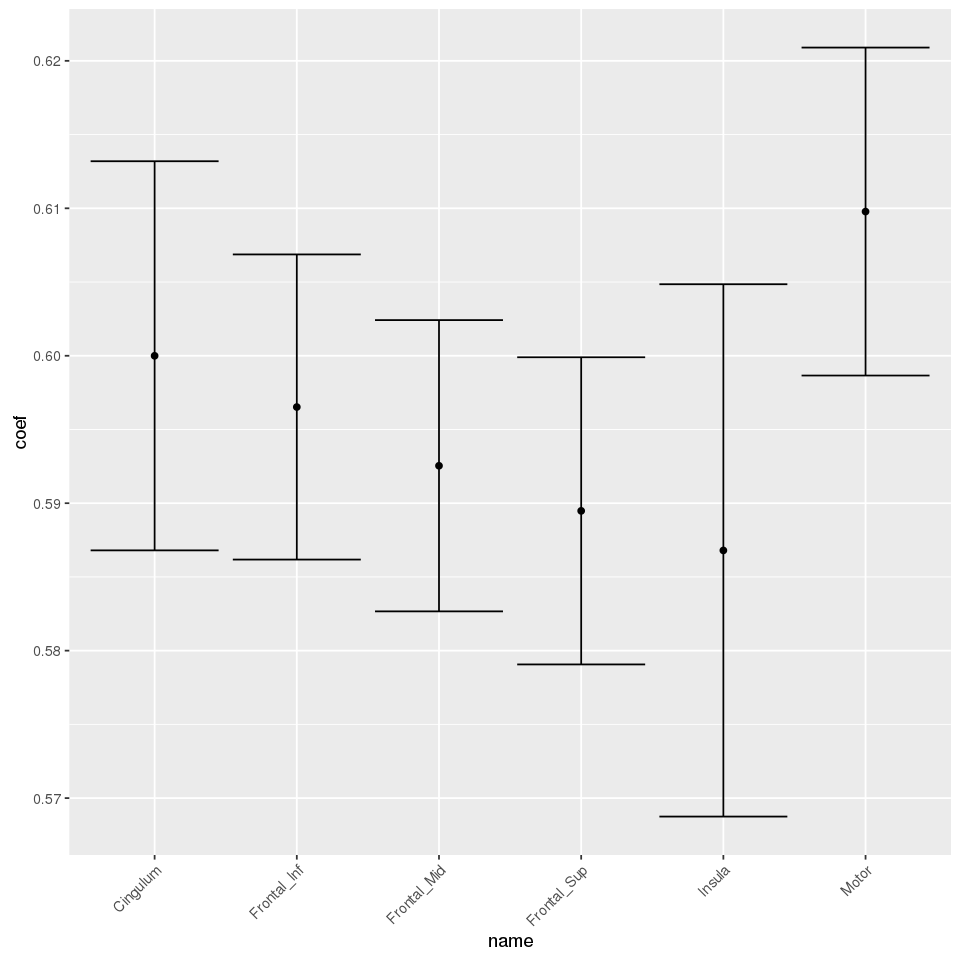

In [26]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model6)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [27]:
# left vs right 
cc<-c(0,0,0,0,-1,1,0)
cc2<-c(0,0,0,0,-1,0,1)
cc3<-c(0,-1,0,0,0,1,0)
K <- rbind(cc,cc2,cc3)

# sup, mid, inf, cing, Supp, Med, Post/Pre

t <- glht(model6, linfct = K)
summary(t)


	 Simultaneous Tests for General Linear Hypotheses

Fit: lme.formula(fixed = Accuracy.50 ~ Frontal_Sup + Frontal_Mid + 
    Frontal_Inf + Insula + Motor + Cingulum, data = data_50, 
    random = ~1 | PID, method = "ML")

Linear Hypotheses:
         Estimate Std. Error z value Pr(>|z|)
cc == 0   0.02298    0.01656   1.388    0.355
cc2 == 0  0.01320    0.01660   0.795    0.741
cc3 == 0  0.02030    0.01135   1.788    0.173
(Adjusted p values reported -- single-step method)


## Regular Linear Model

In [167]:
head(data_50)

Accuracy.50 PID Frontal_Sup_L Frontal_Sup_R Frontal_Sup_Orb_L
1       0.474   1             0             0                 0
2       0.504   1             0             0                 0
3       0.513   1             0             0                 0
4       0.514   1             0             0                 0
5       0.531   1             0             0                 0
6       0.547   1             0             0                 0
  Frontal_Sup_Orb_R Frontal_Mid_L Frontal_Mid_R Frontal_Mid_Orb_L
1                 0             0             0                 0
2                 0             0             0                 0
3                 0             0             0                 0
4                 0             0             0                 0
5                 0             0             0                 0
6                 0             0             0                 0
  Frontal_Mid_Orb_R Frontal_Inf_Oper_L Frontal_Inf_Oper_R Frontal_Inf_Tri_L
1                 0                  0                  0                 0
2                 0                  0                  0                 0
3                 0                  0                  0                 1
4                 0                  0                  0                 0
5                 0                  0                  0                 0
6                 0                  0                  0                 1
  Frontal_Inf_Tri_R Frontal_Inf_Orb_L Frontal_Inf_Orb_R Supp_Motor_Area_L
1                 1                 0                 0                 0
2                 0                 0                 0                 0
3                 1                 0                 0                 0
4                 0                 0                 0                 0
5                 1                 0                 0                 0
6                 1                 0                 0                 0
  Supp_Motor_Area_R Frontal_Sup_Medial_L Frontal_Sup_Medial_R Insula_L Insula_R
1                 0                    0                    0        0        0
2                 0                    0                    0        1        1
3                 0                    0                    0        0        0
4                 0                    0                    0        1        1
5                 0                    0                    0        0        0
6                 0                    0                    0        0        0
  Cingulum_Ant_L Cingulum_Ant_R Cingulum_Mid_L Cingulum_Mid_R Precentral_L
1              0              0              0              0            0
2              0              0              0              0            0
3              0              0              0              0            0
4              0              0              0              0            0
5              0              0              0              0            0
6              0              0              0              0            0
  Precentral_R
1            0
2            0
3            0
4            0
5            0
6            0

In [161]:
model6 = lm(Accuracy.50~Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R,data=data_50)

#+Precentral_R
summary(model6)


Call:
lm(formula = Accuracy.50 ~ Frontal_Sup_L + Frontal_Sup_R + Frontal_Sup_Orb_L + 
    Frontal_Sup_Orb_R + Frontal_Mid_L + Frontal_Mid_R + Frontal_Mid_Orb_L + 
    Frontal_Mid_Orb_R + Frontal_Inf_Oper_L + Frontal_Inf_Oper_R + 
    Frontal_Inf_Tri_L + Frontal_Inf_Tri_R + Frontal_Inf_Orb_L + 
    Frontal_Inf_Orb_R + Supp_Motor_Area_L + Supp_Motor_Area_R + 
    Frontal_Sup_Medial_L + Frontal_Sup_Medial_R + Insula_L + 
    Insula_R + Cingulum_Ant_L + Cingulum_Ant_R + Cingulum_Mid_L + 
    Cingulum_Mid_R + Precentral_L + Precentral_R, data = data_50)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17113 -0.05113 -0.01651  0.02887  0.34118 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.5817590  0.0062304  93.375  < 2e-16 ***
Frontal_Sup_L        -0.0401147  0.0203265  -1.974  0.04886 *  
Frontal_Sup_R         0.0310987  0.0215131   1.446  0.14879    
Frontal_Sup_Orb_L     0.0280809  0.0502204   0.559  0.57625    
Front

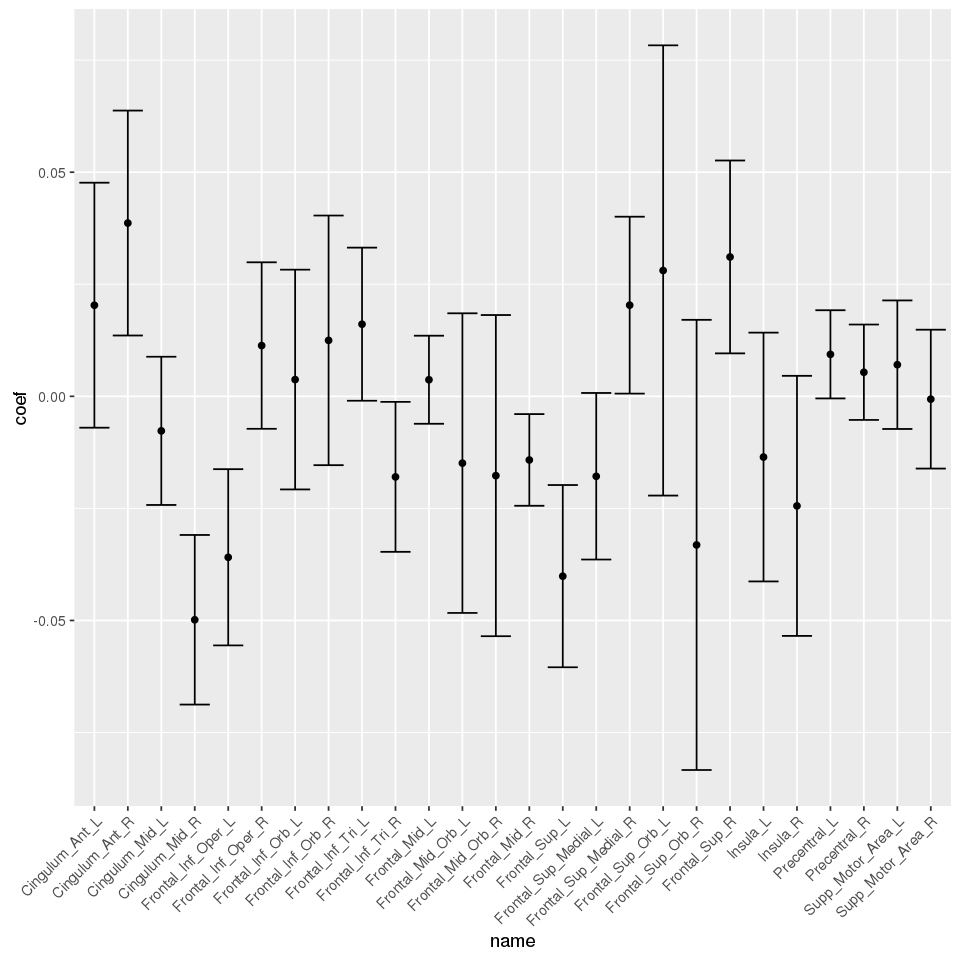

In [162]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model6)
coef<-s$coefficients[,'Estimate']#+s$coefficients[1,'Estimate']
se<-s$coefficients[,'Std. Error']
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Mean per ROI

In [274]:

## calculate the means for each study 
studymeans = data.frame(PID=unique(data_50[,'PID']))

for (pid in unique(data_50[,'PID'])){
    studymeans[studymeans['PID']==pid,'studymean'] = mean(data_50[data_50['PID']==pid,'Accuracy.50'])
    studymeans[studymeans['PID']==pid,'studystd'] = sd(data_50[data_50['PID']==pid,'Accuracy.50'])   
}

## replace NA study std's with average

studymeans[is.na(studymeans[,'studystd']),'studystd']=mean(studymeans[,'studystd'],na.rm=TRUE)
head(studymeans)

PID studymean    studystd
1   1 0.5310833 0.029109381
2   2 0.5925000 0.037749172
3   5 0.5250000 0.007071068
4   6 0.5875000 0.042720019
5   7 0.5338095 0.036832010
6   8 0.5800000 0.026457513

In [226]:
studymeanpop=mean(studymeans$studymean)
studymeanpop

[1] 0.5984493

In [391]:
namee=c()
acccc=c()
gmean = mean(data_50[,'Accuracy.50'])

### loop through each roi adjust accuracy by study means and grand mean. 
for (name in colnames(data3)){

    X = data_50[name]
    current_studymeans = c()
    current_studystds = c()
    pids = data_50[X==1,'PID']
    for (pid in pids){
        current_studymeans = append(current_studymeans,studymeans[studymeans['PID']==pid,'studymean'])
        current_studystds = append(current_studystds,studymeans[studymeans['PID']==pid,'studystd'])
    }

    current_acc = data_50[X==1,'Accuracy.50']

    # weighting by std (not correct yet)
    #acc =sum((current_acc-current_studymeans)*1/current_studystds)/sum(1/current_studystds) + studymeanpop
    
    # even weights per study 
    acc =sum((current_acc-current_studymeans))/length(current_acc) + studymeanpop
    acc = sum(current_acc)/length(current_acc)
    
    acccc=append(acccc,acc) 
    namee=append(namee,name)
    
    
}

df<-data.frame(namee=namee,acccc=acccc)
#df$accc=as.numeric(df$accc)
df

namee     acccc
1         Frontal_Sup_L 0.5590606
2         Frontal_Sup_R 0.5801667
3     Frontal_Sup_Orb_L 0.5501176
4     Frontal_Sup_Orb_R 0.5471765
5         Frontal_Mid_L 0.5746288
6         Frontal_Mid_R 0.5658598
7     Frontal_Mid_Orb_L 0.5522917
8     Frontal_Mid_Orb_R 0.5517826
9    Frontal_Inf_Oper_L 0.5559808
10   Frontal_Inf_Oper_R 0.5612941
11    Frontal_Inf_Tri_L 0.5688219
12    Frontal_Inf_Tri_R 0.5628358
13    Frontal_Inf_Orb_L 0.5693056
14    Frontal_Inf_Orb_R 0.5683929
15    Supp_Motor_Area_L 0.5871176
16    Supp_Motor_Area_R 0.5836429
17 Frontal_Sup_Medial_L 0.5757105
18 Frontal_Sup_Medial_R 0.5883235
19             Insula_L 0.5507619
20             Insula_R 0.5466316
21       Cingulum_Ant_L 0.6094000
22       Cingulum_Ant_R 0.6134483
23       Cingulum_Mid_L 0.5706000
24       Cingulum_Mid_R 0.5558519
25         Precentral_L 0.5931043
26         Precentral_R 0.5914941

In [ ]:
# in the bootstrap we need to sample again from the dataset.. 
# so basically.. 
# region, pid, study acc... 
# 

In [281]:
for boot in range(100){
    
    
#### sample study means.., given them to pid's. 
    
    
    
#### sample ROI's 

    
    
    
#### Calculate acc per roi in same fashion


namee=c()
acccc=c()
gmean = mean(data_50[,'Accuracy.50'])

### loop through each roi adjust accuracy by study means and grand mean. 
for (name in colnames(data3)){

    X = data_50[name]
    current_studymeans = c()
    current_studystds = c()
    pids = data_50[X==1,'PID']
    for (pid in pids){
        current_studymeans = append(current_studymeans,studymeans[studymeans['PID']==pid,'studymean'])
        current_studystds = append(current_studystds,studymeans[studymeans['PID']==pid,'studystd'])
    }

    current_acc = data_50[X==1,'Accuracy.50']

    # weighting by std (not correct yet)
    #acc =sum((current_acc-current_studymeans)/current_studystds)/sum(current_studymeans) + studymeanpop
    
    # even weights per study 
    acc =sum((current_acc-current_studymeans))/length(current_acc) + studymeanpop
    
    # no subtracting out current accuracy 
    #acc =sum((current_acc/length(current_acc)))
    
    acccc=append(acccc,acc) 
    namee=append(namee,name)
    
    
}
    
    
    
    
    # append accuracy columns
    acccc4 = cbind(acccc4,acccc)
    
}

df<-data.frame(namee=namee,acccc=acccc4)
#df$accc=as.numeric(df$accc)
typeof(df$accc)

[1] "double"

Cingulum is really high here, but not as high in lm, because those variables are highly correlated.. so they have to split it in the linear model. 


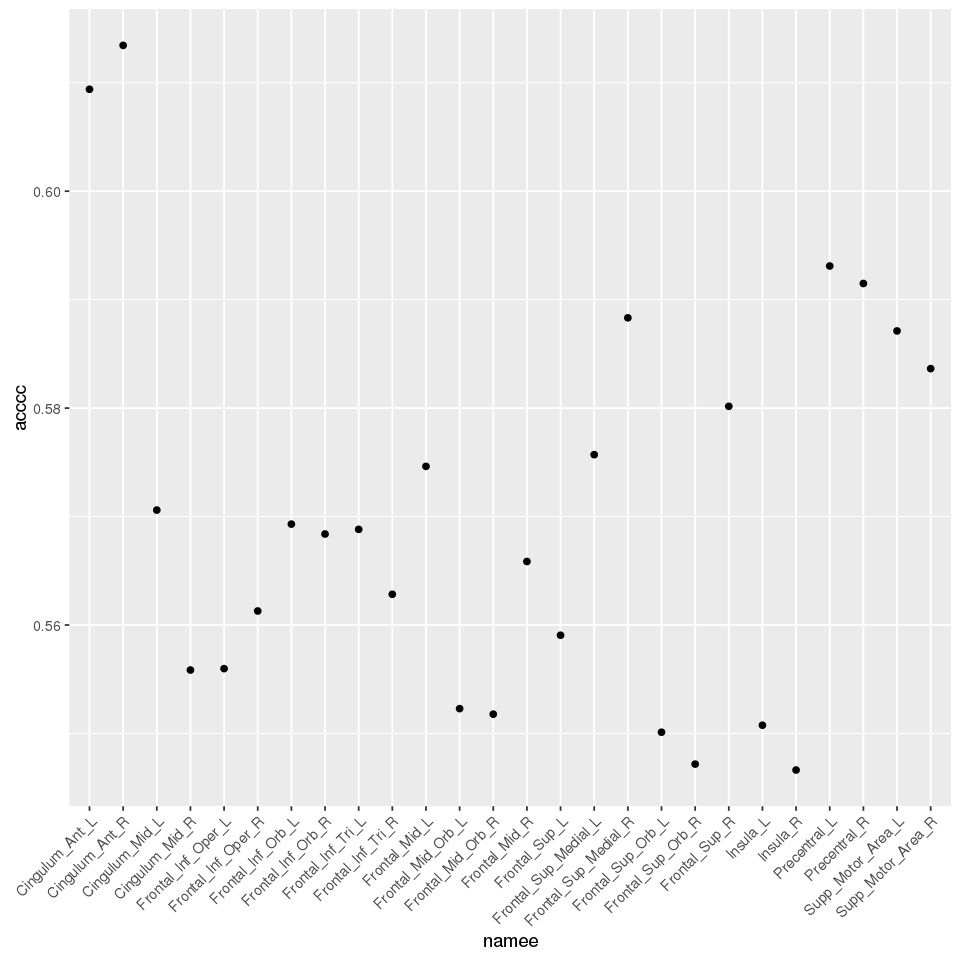

In [392]:
ggplot(df, aes(y=acccc,x=namee))+geom_point()+theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Plotting Per region (Not Done)

In [37]:
head(data)

X Notes.Double.Check Chris.Double.Check Notes PID
1 112                                    NA         1
2 113                                    NA         1
3 114                                    NA         1
4 115                                    NA         1
5 117                                    NA         1
6 121                                    NA         1
                                                                               Title
1 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
2 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
3 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
4 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
5 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
6 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
   Info.type Source.in.paper Region.name.duplicate
1   Response            Text            right IFS_
2   Response            Text              bi AI/FO
3 Perceptual            Text               bi IFS_
4 Perceptual            Text             bi AI/FO_
5       Rule            Text            right IFS_
6 Perceptual            Text                bi IFS
                        Task.variable.decoded Accuracy.50 Accuracy.other
1              which finger used for response       0.474             NA
2              which finger used for response       0.504             NA
3                which color the stimulus was       0.513             NA
4          which position the stimulus was in       0.514             NA
5 which rule used to map stimulus to response       0.531             NA
6          which position the stimulus was in       0.547             NA
  Num_classes Significance Roi.Search                 Pattern.type
1           2            0        ROI Multi-Trial Multi-Time Point
2           2            0        ROI Multi-Trial Multi-Time Point
3           2            0        ROI Multi-Trial Multi-Time Point
4           2            0        ROI Multi-Trial Multi-Time Point
5           2            0        ROI Multi-Trial Multi-Time Point
6           2            0        ROI Multi-Trial Multi-Time Point
  Classifier.type Classifier.Fitted Scanner     Resolution Smoothing
1         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
2         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
3         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
4         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
5         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
6         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
  Coregistration Movement.Correction Pattern.normalization.type Num_subs
1   Native Space Movement Correction                       None       17
2   Native Space Movement Correction                       None       17
3   Native Space Movement Correction                       None       17
4   Native Space Movement Correction                       None       17
5   Native Space Movement Correction                       None       17
6   Native Space Movement Correction                       None       17
  Talairach.Coordinates    MNI.Coordinates Coordinate.Space ROI.Atlas BA AAL
1                                 38,26,24              MNI                 
2                         -35,19,3;35,19,3              MNI                 
3                       -38,26,24;38,26,24              MNI                 
4                         -35,19,3;35,19,3              MNI                 
5                                 38,26,24              MNI                 
6                       -38,26,24;38,26,24              MNI                 
  Desikan OxHarvard Destrieux Unkown.Atlas Method.of.Assigning.Region
1                                                 coordinate transfer
2                    

In [46]:
head(data)

X Notes.Double.Check Chris.Double.Check Notes PID
1 112                                    NA         1
2 113                                    NA         1
3 114                                    NA         1
4 115                                    NA         1
5 117                                    NA         1
6 121                                    NA         1
                                                                               Title
1 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
2 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
3 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
4 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
5 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
6 Multi-voxel coding of stimuli, Rules, and Responses in human frontoparietal cortex
   Info.type Source.in.paper Region.name.duplicate
1   Response            Text            right IFS_
2   Response            Text              bi AI/FO
3 Perceptual            Text               bi IFS_
4 Perceptual            Text             bi AI/FO_
5       Rule            Text            right IFS_
6 Perceptual            Text                bi IFS
                        Task.variable.decoded Accuracy.50 Accuracy.other
1              which finger used for response       0.474             NA
2              which finger used for response       0.504             NA
3                which color the stimulus was       0.513             NA
4          which position the stimulus was in       0.514             NA
5 which rule used to map stimulus to response       0.531             NA
6          which position the stimulus was in       0.547             NA
  Num_classes Significance Roi.Search                 Pattern.type
1           2            0        ROI Multi-Trial Multi-Time Point
2           2            0        ROI Multi-Trial Multi-Time Point
3           2            0        ROI Multi-Trial Multi-Time Point
4           2            0        ROI Multi-Trial Multi-Time Point
5           2            0        ROI Multi-Trial Multi-Time Point
6           2            0        ROI Multi-Trial Multi-Time Point
  Classifier.type Classifier.Fitted Scanner     Resolution Smoothing
1         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
2         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
3         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
4         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
5         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
6         svm-lin                 0      3T 3mmx3mmx3.75mm  unsmooth
  Coregistration Movement.Correction Pattern.normalization.type Num_subs
1   Native Space Movement Correction                       None       17
2   Native Space Movement Correction                       None       17
3   Native Space Movement Correction                       None       17
4   Native Space Movement Correction                       None       17
5   Native Space Movement Correction                       None       17
6   Native Space Movement Correction                       None       17
  Talairach.Coordinates    MNI.Coordinates Coordinate.Space ROI.Atlas BA AAL
1                                 38,26,24              MNI                 
2                         -35,19,3;35,19,3              MNI                 
3                       -38,26,24;38,26,24              MNI                 
4                         -35,19,3;35,19,3              MNI                 
5                                 38,26,24              MNI                 
6                       -38,26,24;38,26,24              MNI                 
  Desikan OxHarvard Destrieux Unkown.Atlas Method.of.Assigning.Region
1                                                 coordinate transfer
2                    

[1] "Frontal_Sup_L"        "Frontal_Sup_R"        "Frontal_Sup_Orb_L"   
 [4] "Frontal_Sup_Orb_R"    "Frontal_Mid_L"        "Frontal_Mid_R"       
 [7] "Frontal_Mid_Orb_L"    "Frontal_Mid_Orb_R"    "Frontal_Inf_Oper_L"  
[10] "Frontal_Inf_Oper_R"   "Frontal_Inf_Tri_L"    "Frontal_Inf_Tri_R"   
[13] "Frontal_Inf_Orb_L"    "Frontal_Inf_Orb_R"    "Supp_Motor_Area_L"   
[16] "Supp_Motor_Area_R"    "Frontal_Sup_Medial_L" "Frontal_Sup_Medial_R"
[19] "Insula_L"             "Insula_R"             "Cingulum_Ant_L"      
[22] "Cingulum_Ant_R"       "Cingulum_Mid_L"       "Cingulum_Mid_R"      
[25] "Precentral_L"         "Precentral_R"

In [52]:
#unique(data$PID)
t(data[data$PID==1,colnames(data3)])

1 2 3 4 5 6 7 8 9 10 11 12
Frontal_Sup_L        0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Sup_R        0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Sup_Orb_L    0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Sup_Orb_R    0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Mid_L        0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Mid_R        0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Mid_Orb_L    0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Mid_Orb_R    0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Inf_Oper_L   0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Inf_Oper_R   0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Inf_Tri_L    0 0 1 0 0 1 1 0 0  1  0  1
Frontal_Inf_Tri_R    1 0 1 0 1 1 0 0 0  1  0  0
Frontal_Inf_Orb_L    0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Inf_Orb_R    0 0 0 0 0 0 0 0 0  0  0  0
Supp_Motor_Area_L    0 0 0 0 0 0 0 0 0  0  0  0
Supp_Motor_Area_R    0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Sup_Medial_L 0 0 0 0 0 0 0 0 0  0  0  0
Frontal_Sup_Medial_R 0 0 0 0 0 0 0 0 0  0  0  0
Insula_L             0 1 0 1 0 0 0 1 1  0  1  0
Insula_R             0 1 0 1 0 0 0 1 1  0  1  0
Cingulum_Ant_L       0 0 0 0 0 0 0 0 0  0  0  0
Cingulum_Ant_R       0 0 0 0 0 0 0 0 0  0  0  0
Cingulum_Mid_L       0 0 0 0 0 0 0 0 0  0  0  0
Cingulum_Mid_R       0 0 0 0 0 0 0 0 0  0  0  0
Precentral_L         0 0 0 0 0 0 0 0 0  0  0  0
Precentral_R         0 0 0 0 0 0 0 0 0  0  0  0

## Boot-strapping first Model

In [53]:
#head(data1)
data = cbind(data1,data3)
variables = c(c('Accuracy.50','PID'),colnames(data3))
variables
data_50<-data[!is.na(data$Accuracy.50),variables]
nrow(data_50)
head(data_50)

[1] "Accuracy.50"          "PID"                  "Frontal_Sup_L"       
 [4] "Frontal_Sup_R"        "Frontal_Sup_Orb_L"    "Frontal_Sup_Orb_R"   
 [7] "Frontal_Mid_L"        "Frontal_Mid_R"        "Frontal_Mid_Orb_L"   
[10] "Frontal_Mid_Orb_R"    "Frontal_Inf_Oper_L"   "Frontal_Inf_Oper_R"  
[13] "Frontal_Inf_Tri_L"    "Frontal_Inf_Tri_R"    "Frontal_Inf_Orb_L"   
[16] "Frontal_Inf_Orb_R"    "Supp_Motor_Area_L"    "Supp_Motor_Area_R"   
[19] "Frontal_Sup_Medial_L" "Frontal_Sup_Medial_R" "Insula_L"            
[22] "Insula_R"             "Cingulum_Ant_L"       "Cingulum_Ant_R"      
[25] "Cingulum_Mid_L"       "Cingulum_Mid_R"       "Precentral_L"        
[28] "Precentral_R"

[1] 669

Accuracy.50 PID Frontal_Sup_L Frontal_Sup_R Frontal_Sup_Orb_L
1       0.474   1             0             0                 0
2       0.504   1             0             0                 0
3       0.513   1             0             0                 0
4       0.514   1             0             0                 0
5       0.531   1             0             0                 0
6       0.547   1             0             0                 0
  Frontal_Sup_Orb_R Frontal_Mid_L Frontal_Mid_R Frontal_Mid_Orb_L
1                 0             0             0                 0
2                 0             0             0                 0
3                 0             0             0                 0
4                 0             0             0                 0
5                 0             0             0                 0
6                 0             0             0                 0
  Frontal_Mid_Orb_R Frontal_Inf_Oper_L Frontal_Inf_Oper_R Frontal_Inf_Tri_L
1                 0                  0                  0                 0
2                 0                  0                  0                 0
3                 0                  0                  0                 1
4                 0                  0                  0                 0
5                 0                  0                  0                 0
6                 0                  0                  0                 1
  Frontal_Inf_Tri_R Frontal_Inf_Orb_L Frontal_Inf_Orb_R Supp_Motor_Area_L
1                 1                 0                 0                 0
2                 0                 0                 0                 0
3                 1                 0                 0                 0
4                 0                 0                 0                 0
5                 1                 0                 0                 0
6                 1                 0                 0                 0
  Supp_Motor_Area_R Frontal_Sup_Medial_L Frontal_Sup_Medial_R Insula_L Insula_R
1                 0                    0                    0        0        0
2                 0                    0                    0        1        1
3                 0                    0                    0        0        0
4                 0                    0                    0        1        1
5                 0                    0                    0        0        0
6                 0                    0                    0        0        0
  Cingulum_Ant_L Cingulum_Ant_R Cingulum_Mid_L Cingulum_Mid_R Precentral_L
1              0              0              0              0            0
2              0              0              0              0            0
3              0              0              0              0            0
4              0              0              0              0            0
5              0              0              0              0            0
6              0              0              0              0            0
  Precentral_R
1            0
2            0
3            0
4            0
5            0
6            0

(Intercept)        Frontal_Sup_L        Frontal_Sup_R 
         0.012015287          0.017035045          0.017915009 
   Frontal_Sup_Orb_L    Frontal_Sup_Orb_R        Frontal_Mid_L 
         0.039508158          0.039370497          0.008333834 
       Frontal_Mid_R    Frontal_Mid_Orb_L    Frontal_Mid_Orb_R 
         0.008695203          0.027883432          0.029835154 
  Frontal_Inf_Oper_L   Frontal_Inf_Oper_R    Frontal_Inf_Tri_L 
         0.016773530          0.015137625          0.014082675 
   Frontal_Inf_Tri_R    Frontal_Inf_Orb_L    Frontal_Inf_Orb_R 
         0.013737630          0.021061040          0.024337922 
   Supp_Motor_Area_L    Supp_Motor_Area_R Frontal_Sup_Medial_L 
         0.011977390          0.013567390          0.016727757 
Frontal_Sup_Medial_R             Insula_L             Insula_R 
         0.017602324          0.021993729          0.023358413 
      Cingulum_Ant_L       Cingulum_Ant_R       Cingulum_Mid_L 
         0.022077178          0.020318245          0.013623027 
      Cingulum_Mid_R         Precentral_L         Precentral_R 
         0.015554235          0.009358299          0.009800862

In [152]:
coefs = # matrix

n_boots = 50
boot_coef<-matrix(nrow=length(coef),ncol=n_boots)
boot_coef2<-matrix(nrow=length(coef),ncol=n_boots)


for (boot in seq(n_boots)){
    
    
    data_b<-data_50[sample(nrow(data_50), nrow(data_50),replace = TRUE),] # sample new rows.. 
    
    modelB = lme(Accuracy.50~Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R,random=~1|PID,data=data_b,method='ML')

    s<-summary(modelB)
    coefb<-s$tTable[,1] 
    
    # get coefficients + intercept ... 
    boot_coef[,boot] = as.matrix(coefb)
    boot_coef2[2:nrow(boot_coef2),boot] =  boot_coef[2:nrow(boot_coef2),boot] +boot_coef[1,boot] # add intercept 
    
}



In [154]:
# fit the model for real
model3 = lme(Accuracy.50~Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R,random=~1|PID,data=data_50,method='ML')


s<-summary(model3)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 



In [155]:
# calculate standard errors 
seb<-apply(boot_coef,1,sd)
seb2<-apply(boot_coef2,1,sd)
df<-data.frame(cbind(coef,seb,se,seb2))
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']+coef[1] # add intercept

In [156]:
df

coef         seb          se        seb2
Frontal_Sup_L        0.5997465 0.010597047 0.017035045 0.011599600
Frontal_Sup_R        0.5960690 0.012407621 0.017915009 0.012618765
Frontal_Sup_Orb_L    0.5874829 0.053485850 0.039508158 0.054892624
Frontal_Sup_Orb_R    0.5700939 0.055460226 0.039370497 0.054936263
Frontal_Mid_L        0.6020564 0.008339949 0.008333834 0.007691876
Frontal_Mid_R        0.5806339 0.007388665 0.008695203 0.007427061
Frontal_Mid_Orb_L    0.5781408 0.015017145 0.027883432 0.013985285
Frontal_Mid_Orb_R    0.5908459 0.021386562 0.029835154 0.021378188
Frontal_Inf_Oper_L   0.5764457 0.012232887 0.016773530 0.013955458
Frontal_Inf_Oper_R   0.6012861 0.010325101 0.015137625 0.010428381
Frontal_Inf_Tri_L    0.6033869 0.010050381 0.014082675 0.010124356
Frontal_Inf_Tri_R    0.5784948 0.009200837 0.013737630 0.010885811
Frontal_Inf_Orb_L    0.5940219 0.019520495 0.021061040 0.018713134
Frontal_Inf_Orb_R    0.5912464 0.017716250 0.024337922 0.019140115
Supp_Motor_Area_L    0.6006165 0.021673589 0.011977390 0.021702769
Supp_Motor_Area_R    0.5897751 0.023341174 0.013567390 0.023502807
Frontal_Sup_Medial_L 0.5757554 0.014378472 0.016727757 0.013666474
Frontal_Sup_Medial_R 0.5818646 0.016528001 0.017602324 0.017527703
Insula_L             0.5889639 0.018737662 0.021993729 0.018506901
Insula_R             0.5836589 0.019340956 0.023358413 0.019510087
Cingulum_Ant_L       0.6118953 0.022680960 0.022077178 0.022942942
Cingulum_Ant_R       0.5909503 0.021509503 0.020318245 0.020966586
Cingulum_Mid_L       0.6021074 0.010107777 0.013623027 0.010178279
Cingulum_Mid_R       0.5861778 0.011502732 0.015554235 0.011240832
Precentral_L         0.6167443 0.011272543 0.009358299 0.010925787
Precentral_R         0.5903115 0.010000437 0.009800862 0.010314262
                                     name
Frontal_Sup_L               Frontal_Sup_L
Frontal_Sup_R               Frontal_Sup_R
Frontal_Sup_Orb_L       Frontal_Sup_Orb_L
Frontal_Sup_Orb_R       Frontal_Sup_Orb_R
Frontal_Mid_L               Frontal_Mid_L
Frontal_Mid_R               Frontal_Mid_R
Frontal_Mid_Orb_L       Frontal_Mid_Orb_L
Frontal_Mid_Orb_R       Frontal_Mid_Orb_R
Frontal_Inf_Oper_L     Frontal_Inf_Oper_L
Frontal_Inf_Oper_R     Frontal_Inf_Oper_R
Frontal_Inf_Tri_L       Frontal_Inf_Tri_L
Frontal_Inf_Tri_R       Frontal_Inf_Tri_R
Frontal_Inf_Orb_L       Frontal_Inf_Orb_L
Frontal_Inf_Orb_R       Frontal_Inf_Orb_R
Supp_Motor_Area_L       Supp_Motor_Area_L
Supp_Motor_Area_R       Supp_Motor_Area_R
Frontal_Sup_Medial_L Frontal_Sup_Medial_L
Frontal_Sup_Medial_R Frontal_Sup_Medial_R
Insula_L                         Insula_L
Insula_R                         Insula_R
Cingulum_Ant_L             Cingulum_Ant_L
Cingulum_Ant_R             Cingulum_Ant_R
Cingulum_Mid_L             Cingulum_Mid_L
Cingulum_Mid_R             Cingulum_Mid_R
Precentral_L                 Precentral_L
Precentral_R                 Precentral_R

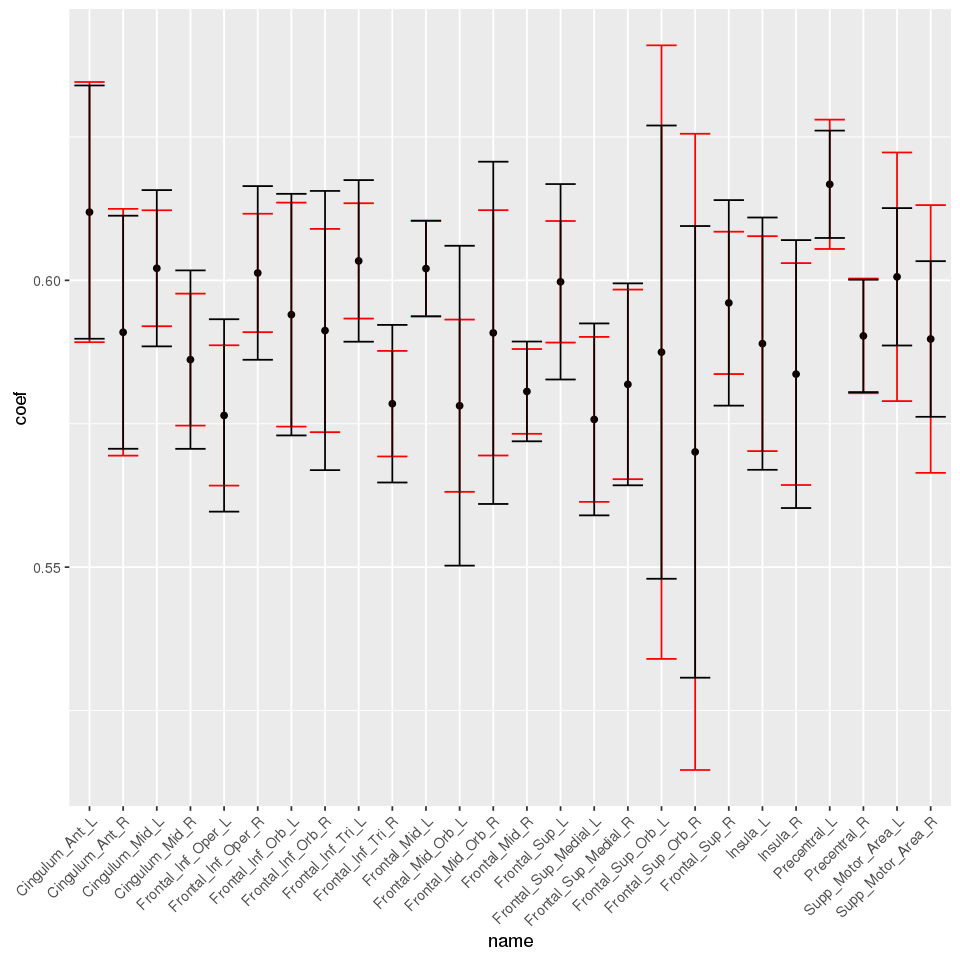

In [158]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + seb, ymin=coef- seb),color="red")+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))

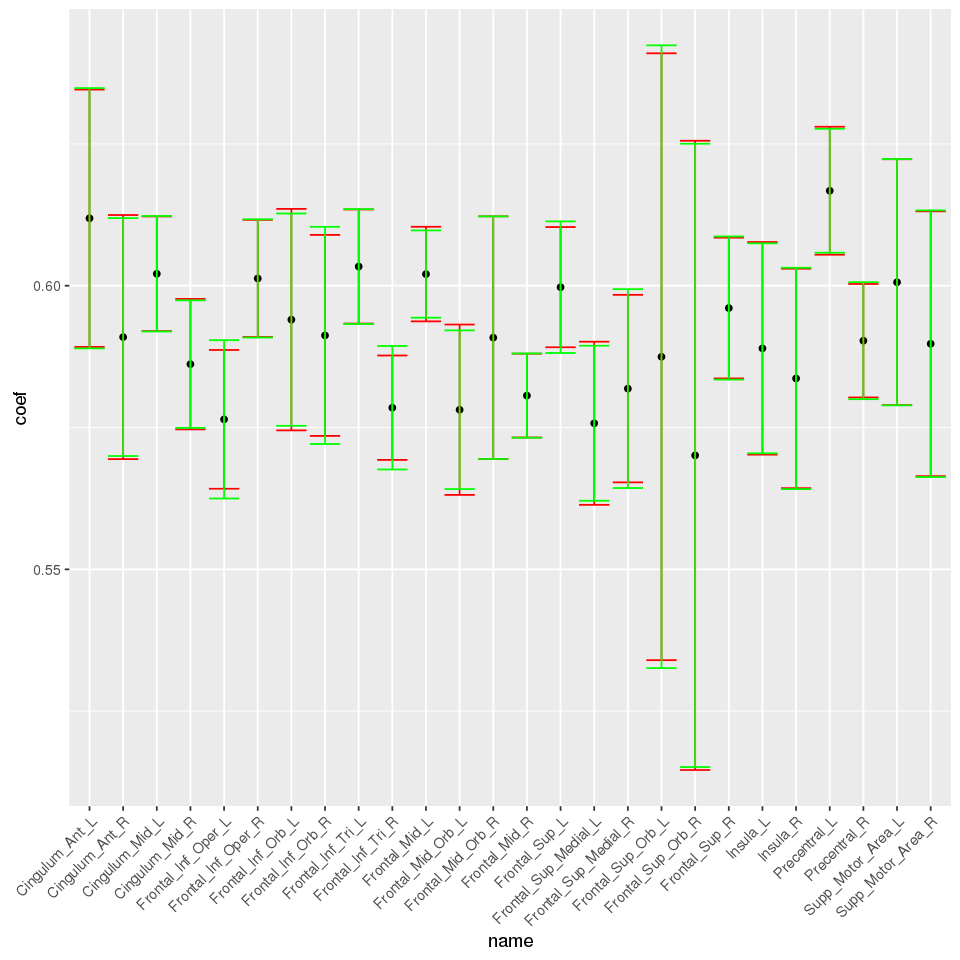

In [159]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + seb, ymin=coef- seb),color="red")+geom_errorbar(aes(ymax = coef + seb2, ymin=coef- seb2),color="green")+theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Non identifical Variance (Not Done)
not exactly sure how to do this.. 

In [136]:
#data_50$Accuracy.50.var <- varIdent(form=~1|Location)

model = lme(Accuracy.50~Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R,random=~1|PID,data=data_50,method='ML',weights = varIdent(form = ~1 | PID))

#summary(model)

ERROR: Error in MEestimate(lmeSt, grps): Singularity in backsolve at level 0, block 1


## Other Factors

In [343]:
data = cbind(data1,data3)
variables = c(c('Accuracy.50','PID','Info.type','Smoothing','Roi.Search','Coregistration','Pattern.type','Classifier.type','Significance'),colnames(data3))
variables
data_50<-data[!is.na(data$Accuracy.50),variables]
nrow(data_50)
data_50$Classifier.type<-relevel(as.factor(data_50$Classifier.type),ref='svm-lin')

data_50<-droplevels(data_50)


head(data_50)

[1] "Accuracy.50"          "PID"                  "Info.type"           
 [4] "Smoothing"            "Roi.Search"           "Coregistration"      
 [7] "Pattern.type"         "Classifier.type"      "Significance"        
[10] "Frontal_Sup_L"        "Frontal_Sup_R"        "Frontal_Sup_Orb_L"   
[13] "Frontal_Sup_Orb_R"    "Frontal_Mid_L"        "Frontal_Mid_R"       
[16] "Frontal_Mid_Orb_L"    "Frontal_Mid_Orb_R"    "Frontal_Inf_Oper_L"  
[19] "Frontal_Inf_Oper_R"   "Frontal_Inf_Tri_L"    "Frontal_Inf_Tri_R"   
[22] "Frontal_Inf_Orb_L"    "Frontal_Inf_Orb_R"    "Supp_Motor_Area_L"   
[25] "Supp_Motor_Area_R"    "Frontal_Sup_Medial_L" "Frontal_Sup_Medial_R"
[28] "Insula_L"             "Insula_R"             "Cingulum_Ant_L"      
[31] "Cingulum_Ant_R"       "Cingulum_Mid_L"       "Cingulum_Mid_R"      
[34] "Precentral_L"         "Precentral_R"

[1] 669

Accuracy.50 PID  Info.type Smoothing Roi.Search Coregistration
1       0.474   1   Response  unsmooth        ROI   Native Space
2       0.504   1   Response  unsmooth        ROI   Native Space
3       0.513   1 Perceptual  unsmooth        ROI   Native Space
4       0.514   1 Perceptual  unsmooth        ROI   Native Space
5       0.531   1       Rule  unsmooth        ROI   Native Space
6       0.547   1 Perceptual  unsmooth        ROI   Native Space
                  Pattern.type Classifier.type Significance Frontal_Sup_L
1 Multi-Trial Multi-Time Point         svm-lin            0             0
2 Multi-Trial Multi-Time Point         svm-lin            0             0
3 Multi-Trial Multi-Time Point         svm-lin            0             0
4 Multi-Trial Multi-Time Point         svm-lin            0             0
5 Multi-Trial Multi-Time Point         svm-lin            0             0
6 Multi-Trial Multi-Time Point         svm-lin            0             0
  Frontal_Sup_R Frontal_Sup_Orb_L Frontal_Sup_Orb_R Frontal_Mid_L Frontal_Mid_R
1             0                 0                 0             0             0
2             0                 0                 0             0             0
3             0                 0                 0             0             0
4             0                 0                 0             0             0
5             0                 0                 0             0             0
6             0                 0                 0             0             0
  Frontal_Mid_Orb_L Frontal_Mid_Orb_R Frontal_Inf_Oper_L Frontal_Inf_Oper_R
1                 0                 0                  0                  0
2                 0                 0                  0                  0
3                 0                 0                  0                  0
4                 0                 0                  0                  0
5                 0                 0                  0                  0
6                 0                 0                  0                  0
  Frontal_Inf_Tri_L Frontal_Inf_Tri_R Frontal_Inf_Orb_L Frontal_Inf_Orb_R
1                 0                 1                 0                 0
2                 0                 0                 0                 0
3                 1                 1                 0                 0
4                 0                 0                 0                 0
5                 0                 1                 0                 0
6                 1                 1                 0                 0
  Supp_Motor_Area_L Supp_Motor_Area_R Frontal_Sup_Medial_L Frontal_Sup_Medial_R
1                 0                 0                    0                    0
2                 0                 0                    0                    0
3                 0                 0                    0                    0
4                 0                 0                    0                    0
5                 0                 0                    0                    0
6                 0                 0                    0                    0
  Insula_L Insula_R Cingulum_Ant_L Cingulum_Ant_R Cingulum_Mid_L Cingulum_Mid_R
1        0        0              0              0              0              0
2        1        1              0              0              0              0
3        0        0              0              0              0              0
4        1        1              0              0              0              0
5        0        0              0              0              0              0
6        0        0              0              0              0              0
  Precentral_L Precentral_R
1            0            0
2            0            0
3            0            0
4            0            0
5            0            0
6            0            0

In [351]:



model_full = lme(Accuracy.50~Info.type+Smoothing+Roi.Search+
            Coregistration+Pattern.type+Classifier.type+Significance,random=~1|PID,data=data_50,method='ML')

model_sans_smoothing = lme(Accuracy.50~Info.type+Roi.Search+
            Coregistration+Pattern.type+Classifier.type+Significance,random=~1|PID,data=data_50,method='ML')

model_sans_classifier = lme(Accuracy.50~Info.type+Roi.Search+Smoothing+
            Coregistration+Pattern.type+Significance,random=~1|PID,data=data_50,method='ML')


anova(model_full,model_sans_smoothing )
anova(model_full,model_sans_classifier)
anova(model_full,type='marginal')


Model df       AIC       BIC   logLik   Test  L.Ratio
model_full               1 18 -1960.906 -1879.802 998.4528                
model_sans_smoothing     2 17 -1961.858 -1885.260 997.9291 1 vs 2 1.047409
                     p-value
model_full                  
model_sans_smoothing  0.3061

Model df       AIC       BIC   logLik   Test  L.Ratio
model_full                1 18 -1960.906 -1879.802 998.4528                
model_sans_classifier     2 13 -1956.006 -1897.431 991.0030 1 vs 2 14.89965
                      p-value
model_full                   
model_sans_classifier  0.0108

numDF denDF  F-value p-value
(Intercept)         1   612 449.4527  <.0001
Info.type           3   612   0.1510  0.9291
Smoothing           1    41   1.0345  0.3151
Roi.Search          1   612   0.1568  0.6923
Coregistration      1    41   0.0438  0.8354
Pattern.type        3    41   0.2034  0.8935
Classifier.type     5    41   3.2404  0.0148
Significance        1   612 327.6628  <.0001

In [357]:
s<-summary(model_full)
s

Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
        AIC       BIC   logLik
  -1960.906 -1879.801 998.4528

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:   0.0479588 0.05039659

Fixed effects: Accuracy.50 ~ Info.type + Smoothing + Roi.Search + Coregistration +      Pattern.type + Classifier.type + Significance 
                                                Value  Std.Error  DF   t-value
(Intercept)                                 0.5423949 0.02558430 612 21.200299
Info.typeResponse                           0.0052801 0.01422509 612  0.371182
Info.typeRule                              -0.0016202 0.01423916 612 -0.113786
Info.typeValue                              0.0098909 0.01884612 612  0.524822
Smoothingunsmooth                          -0.0243510 0.02394101  41 -1.017126
Roi.SearchSearchlight Peak                  0.0076145 0.01923165 612  0.395935
CoregistrationNative Space                 -0.0039130 0.01870729  41 -0.209168
Pat

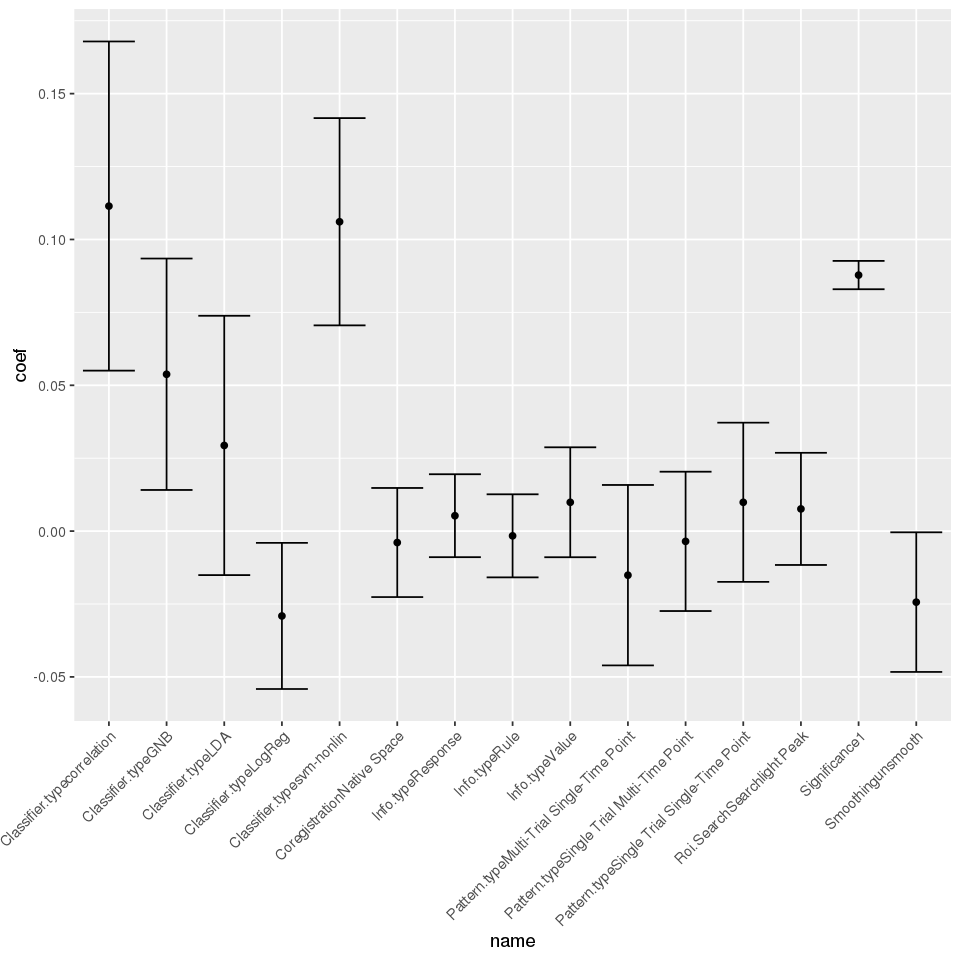

In [322]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model_full)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:nrow(df),]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

## Full with Region

In [55]:
data = cbind(data1,data3)



#variables = c(c('Accuracy.50','PID'),colnames(data2))
#variables
#data[,variables]
data_50<-data[!is.na(data$Accuracy.50),]
nrow(data_50)


model_full_with_regions = lme(Accuracy.50~Info.type+Smoothing+Roi.Search+
            Coregistration+Pattern.type+Classifier.type+Significance+Frontal_Sup_L+Frontal_Sup_R+Frontal_Sup_Orb_L+Frontal_Sup_Orb_R
             +Frontal_Mid_L+Frontal_Mid_R+Frontal_Mid_Orb_L+Frontal_Mid_Orb_R+Frontal_Inf_Oper_L+Frontal_Inf_Oper_R+Frontal_Inf_Tri_L+Frontal_Inf_Tri_R
             +Frontal_Inf_Orb_L+Frontal_Inf_Orb_R+Supp_Motor_Area_L+Supp_Motor_Area_R+Frontal_Sup_Medial_L+Frontal_Sup_Medial_R
             +Insula_L+Insula_R+Cingulum_Ant_L+Cingulum_Ant_R+Cingulum_Mid_L+Cingulum_Mid_R+Precentral_L+Precentral_R,random=~1|PID,data=data_50,method='ML')


[1] 669

In [56]:
anova(model_full_with_regions,type='marginal')

numDF denDF   F-value p-value
(Intercept)              1   586 122.79863  <.0001
Info.type                3   586   0.15776  0.9247
Smoothing                1    41   0.82479  0.3691
Roi.Search               1   586   0.19550  0.6585
Coregistration           1    41   0.02157  0.8840
Pattern.type             3    41   0.12257  0.9463
Classifier.type          5    41   3.02057  0.0206
Significance             1   586 304.43032  <.0001
Frontal_Sup_L            1   586   0.00091  0.9759
Frontal_Sup_R            1   586   0.00280  0.9578
Frontal_Sup_Orb_L        1   586   0.58313  0.4454
Frontal_Sup_Orb_R        1   586   0.00183  0.9659
Frontal_Mid_L            1   586   0.44381  0.5055
Frontal_Mid_R            1   586   2.31704  0.1285
Frontal_Mid_Orb_L        1   586   0.63704  0.4251
Frontal_Mid_Orb_R        1   586   0.16961  0.6806
Frontal_Inf_Oper_L       1   586   0.84327  0.3588
Frontal_Inf_Oper_R       1   586   0.88772  0.3465
Frontal_Inf_Tri_L        1   586   1.33805  0.2478
Frontal_Inf_Tri_R        1   586   0.54451  0.4609
Frontal_Inf_Orb_L        1   586   0.00739  0.9315
Frontal_Inf_Orb_R        1   586   0.01658  0.8976
Supp_Motor_Area_L        1   586   0.83901  0.3601
Supp_Motor_Area_R        1   586   0.01529  0.9016
Frontal_Sup_Medial_L     1   586   0.63750  0.4249
Frontal_Sup_Medial_R     1   586   0.00109  0.9737
Insula_L                 1   586   0.05612  0.8128
Insula_R                 1   586   0.37814  0.5388
Cingulum_Ant_L           1   586   1.18786  0.2762
Cingulum_Ant_R           1   586   0.05979  0.8069
Cingulum_Mid_L           1   586   0.00845  0.9268
Cingulum_Mid_R           1   586   0.47540  0.4908
Precentral_L             1   586   1.67586  0.1960
Precentral_R             1   586   0.20645  0.6497

In [326]:
df['coef'][10:20,]

[1]  0.1065667824  0.0584404509  0.0340117309 -0.0250125358  0.1032340076
 [6]  0.0878319566 -0.0004190243 -0.0007682937  0.0244242148  0.0013637214
[11]  0.0045273651

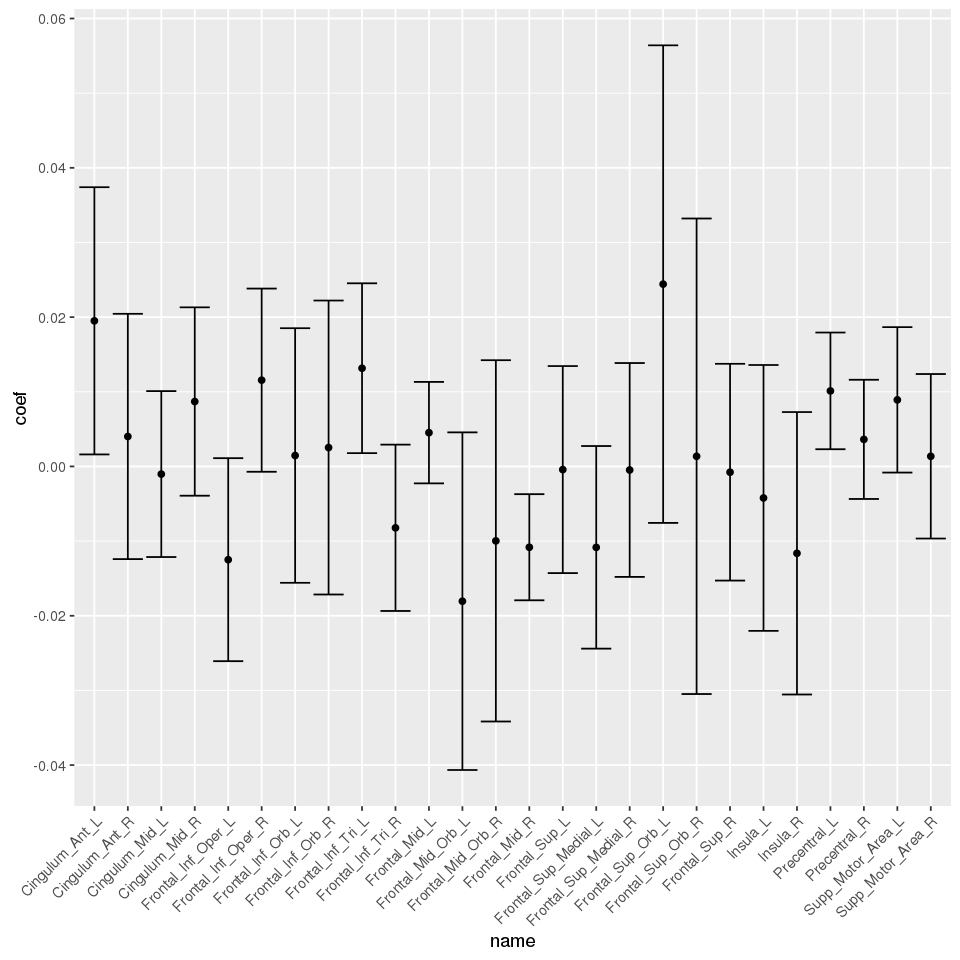

In [61]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model_full_with_regions)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[17:nrow(df),]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

In [62]:
coef

(Intercept) 
                              0.6469976417 
                         Info.typeResponse 
                              0.0038219562 
                             Info.typeRule 
                             -0.0026386138 
                            Info.typeValue 
                              0.0106240392 
                         Smoothingunsmooth 
                             -0.0220672261 
                Roi.SearchSearchlight Peak 
                              0.0086555569 
                CoregistrationNative Space 
                             -0.0027817899 
 Pattern.typeMulti-Trial Single-Time Point 
                             -0.0127888651 
 Pattern.typeSingle Trial Multi-Time Point 
                             -0.0070045122 
Pattern.typeSingle Trial Single-Time Point 
                              0.0041653497 
                        Classifier.typeGNB 
                             -0.0481263315 
                        Classifier.typeLDA 
                             -0.0725550515 
                     Classifier.typeLogReg 
                             -0.1315793182 
                    Classifier.typesvm-lin 
                             -0.1065667824 
                 Classifier.typesvm-nonlin 
                             -0.0033327747 
                             Significance1 
                              0.0878319566 
                             Frontal_Sup_L 
                             -0.0004190243 
                             Frontal_Sup_R 
                             -0.0007682937 
                         Frontal_Sup_Orb_L 
                              0.0244242148 
                         Frontal_Sup_Orb_R 
                              0.0013637214 
                             Frontal_Mid_L 
                              0.0045273651 
                             Frontal_Mid_R 
                             -0.0108218662 
                         Frontal_Mid_Orb_L 
                             -0.0180479316 
                         Frontal_Mid_Orb_R 
                             -0.0099652965 
                        Frontal_Inf_Oper_L 
                             -0.0124873624 
                        Frontal_Inf_Oper_R 
                              0.0115601926 
                         Frontal_Inf_Tri_L 
                              0.0131590344 
                         Frontal_Inf_Tri_R 
                             -0.0082206599 
                         Frontal_Inf_Orb_L 
                              0.0014662347 
                         Frontal_Inf_Orb_R 
                              0.0025352264 
                         Supp_Motor_Area_L 
                              0.0089215551 
                         Supp_Motor_Area_R 
                              0.0013623560 
                      Frontal_Sup_Medial_L 
                             -0.0108341491 
                      Frontal_Sup_Medial_R 
                             -0.0004720094 
                                  Insula_L 
                             -0.0042182330 
                                  Insula_R 
                             -0.0116314250 
                            Cingulum_Ant_L 
                              0.0195070859 
                            Cingulum_Ant_R 
                              0.0040174547 
                            Cingulum_Mid_L 
                             -0.0010215867 
                            Cingulum_Mid_R 
                              0.0086985604 
                              Precentral_L 
                              0.0101204040 
                              Precentral_R 
                              0.0036282090

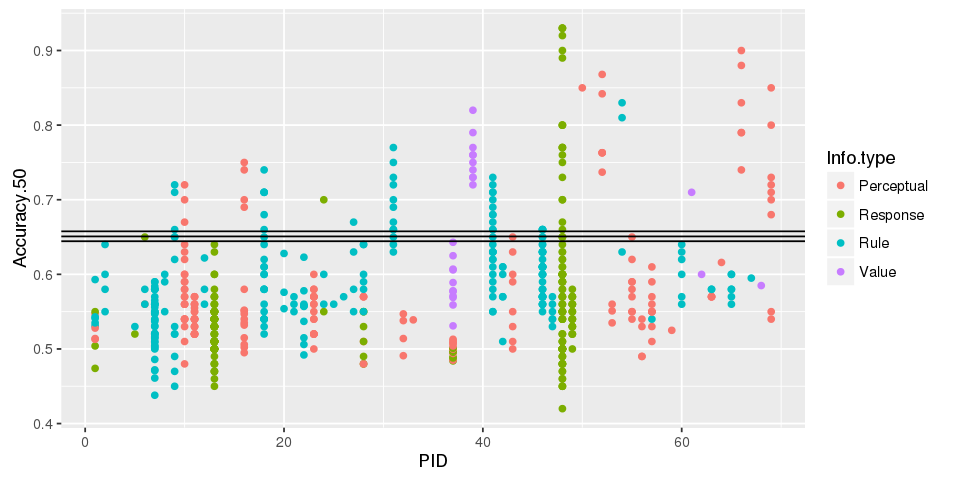

In [68]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(aes(y = Accuracy.50, x = PID,color=Info.type), data = data_50) +geom_point()+geom_hline(yintercept=coef[1]+coef[2])+geom_hline(yintercept=coef[1]+coef[3])+geom_hline(yintercept=coef[1]+coef[4])

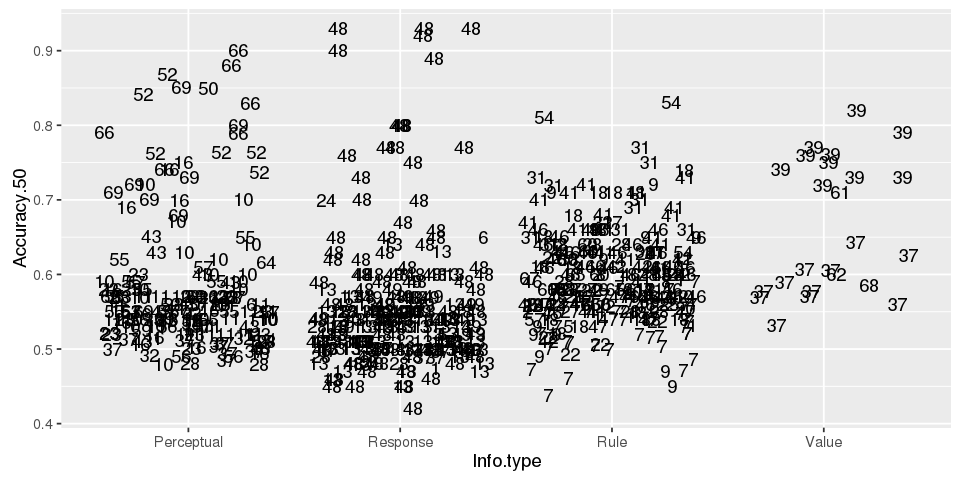

In [92]:
# not that useful I want to plot partial effects... 


#p <- ggplot(aes(y = Accuracy.50,x=Info.type,label=PID), data = data_50)+geom_text(position='jitter')


#for pid in data_50$PID.unique():
#    +geom_hline()

In [119]:
summary(model_full_with_regions)

Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
        AIC       BIC   logLik
  -1928.598 -1730.344 1008.299

Random effects:
 Formula: ~1 | PID
        (Intercept)  Residual
StdDev:  0.04731927 0.0496561

Fixed effects: Accuracy.50 ~ Info.type + Smoothing + Roi.Search + Coregistration +      Pattern.type + Classifier.type + Significance + Frontal_Sup_L +      Frontal_Sup_R + Frontal_Sup_Orb_L + Frontal_Sup_Orb_R + Frontal_Mid_L +      Frontal_Mid_R + Frontal_Mid_Orb_L + Frontal_Mid_Orb_R + Frontal_Inf_Oper_L +      Frontal_Inf_Oper_R + Frontal_Inf_Tri_L + Frontal_Inf_Tri_R +      Frontal_Inf_Orb_L + Frontal_Inf_Orb_R + Supp_Motor_Area_L +      Supp_Motor_Area_R + Frontal_Sup_Medial_L + Frontal_Sup_Medial_R +      Insula_L + Insula_R + Cingulum_Ant_L + Cingulum_Ant_R + Cingulum_Mid_L +      Cingulum_Mid_R + Precentral_L + Precentral_R 
                                                Value  Std.Error  DF   t-value
(Intercept)                                 0.64699

In [113]:
data_50$residuals_fixed = model_full_with_regions$residuals[,1]
data_50$residuals_random = model_full_with_regions$residuals[,2]

data_50$fitted_fixed<-model_full_with_regions$fitted[,1]
data_50$fitted_pid<-model_full_with_regions$fitted[,2]

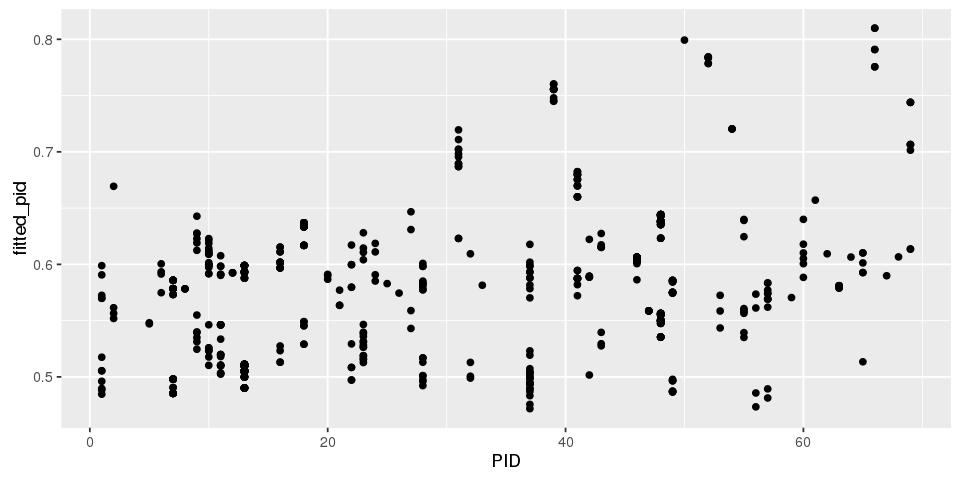

In [114]:
ggplot(aes(y = fitted_pid, x = PID), data = data_50) +geom_point()

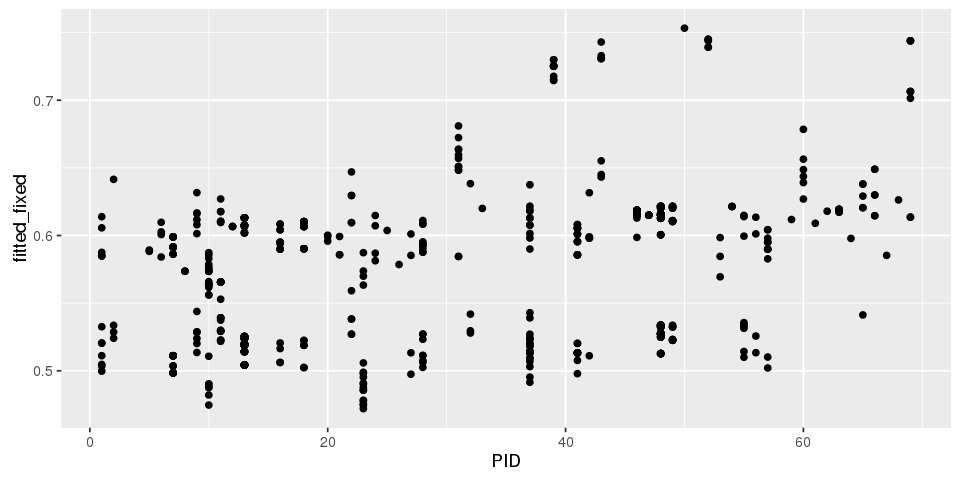

In [115]:
ggplot(aes(y = fitted_fixed, x = PID), data = data_50) +geom_point()

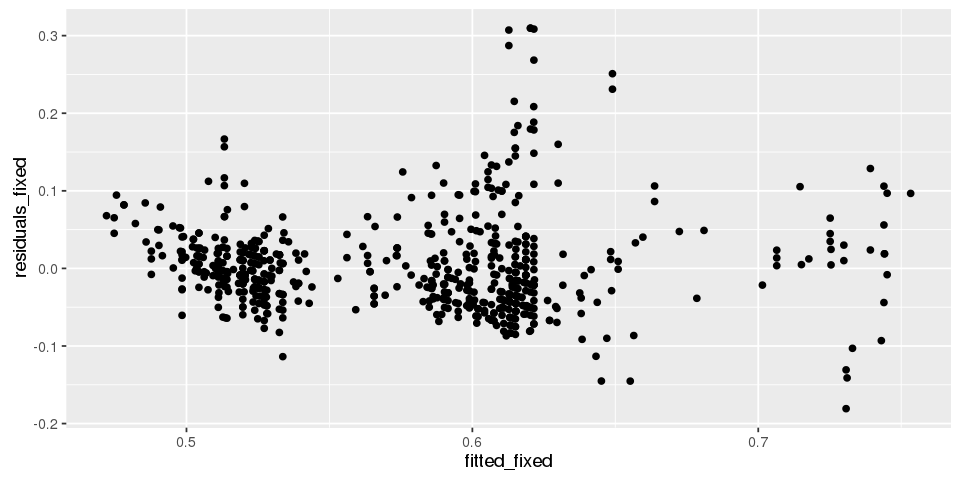

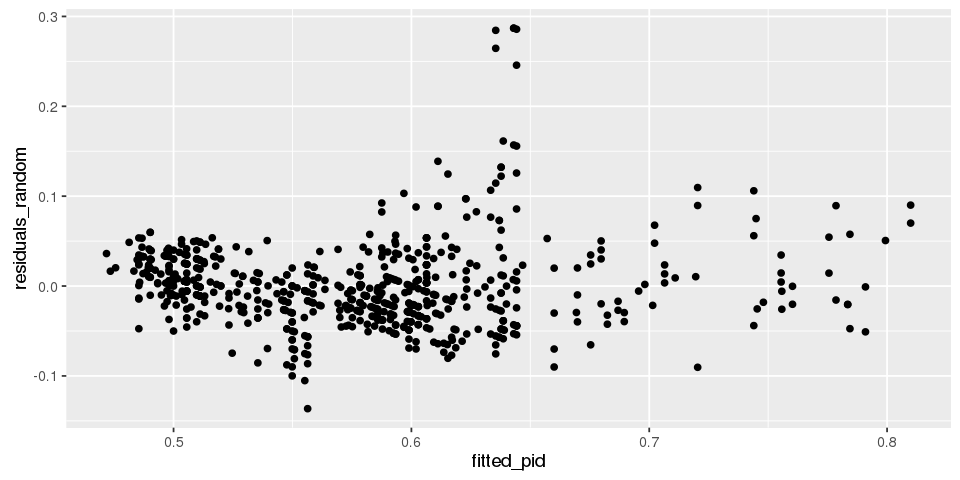

In [118]:
p <- ggplot(aes(y=residuals_fixed,x = fitted_fixed,), data = data_50)+geom_point()
p

p <- ggplot(aes(y=residuals_random,x = fitted_pid,), data = data_50)+geom_point()
p


p <- ggplot(aes(y = residuals_fixed,x=PID), data = data_50)+geom_point()
p

p <- ggplot(aes(y = residuals_random,x=PID), data = data_50)+geom_point()
p

p <- ggplot(aes(y = residuals_fixed,x=Info.type), data = data_50)+geom_point()
p

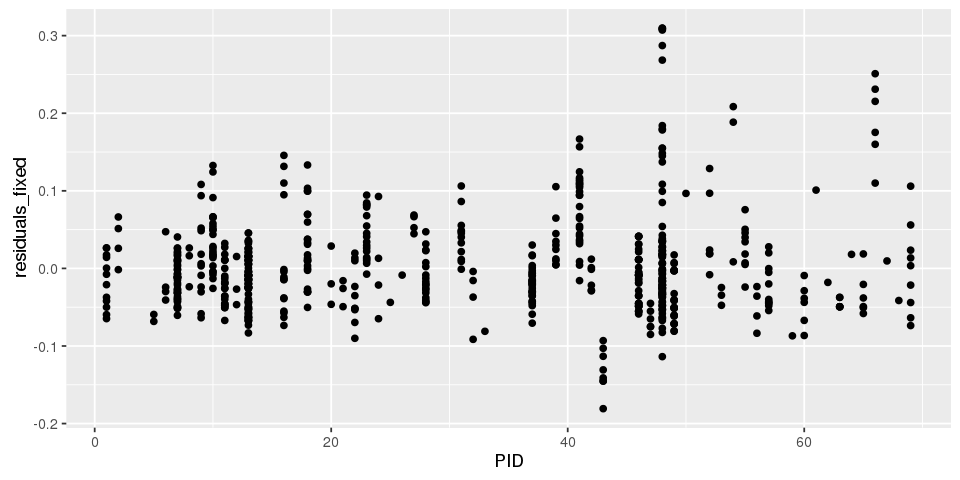

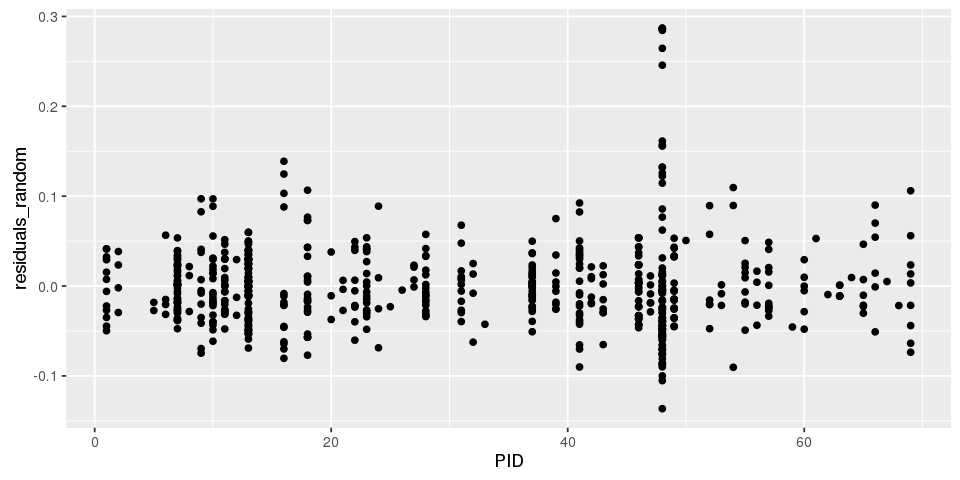

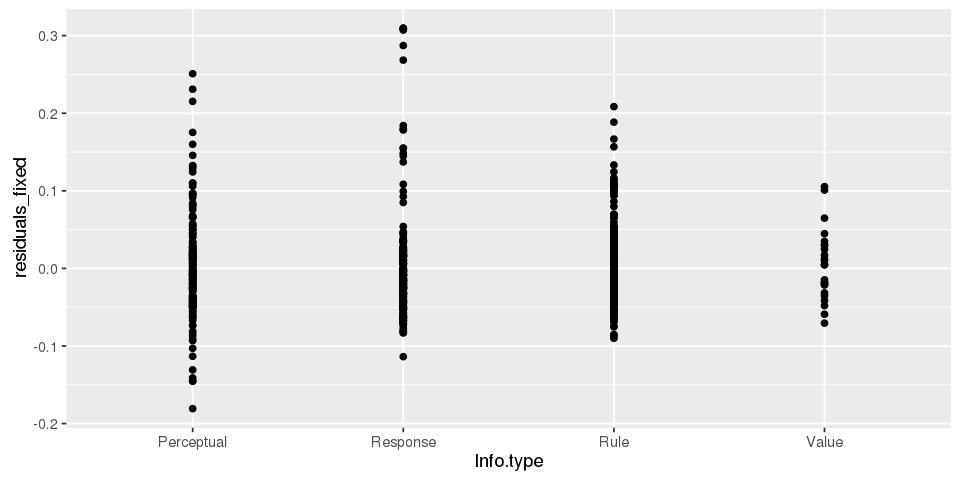

In [111]:


p <- ggplot(aes(y = residuals_fixed,x=PID), data = data_50)+geom_point()
p

p <- ggplot(aes(y = residuals_random,x=PID), data = data_50)+geom_point()
p

p <- ggplot(aes(y = residuals_fixed,x=Info.type), data = data_50)+geom_point()
p

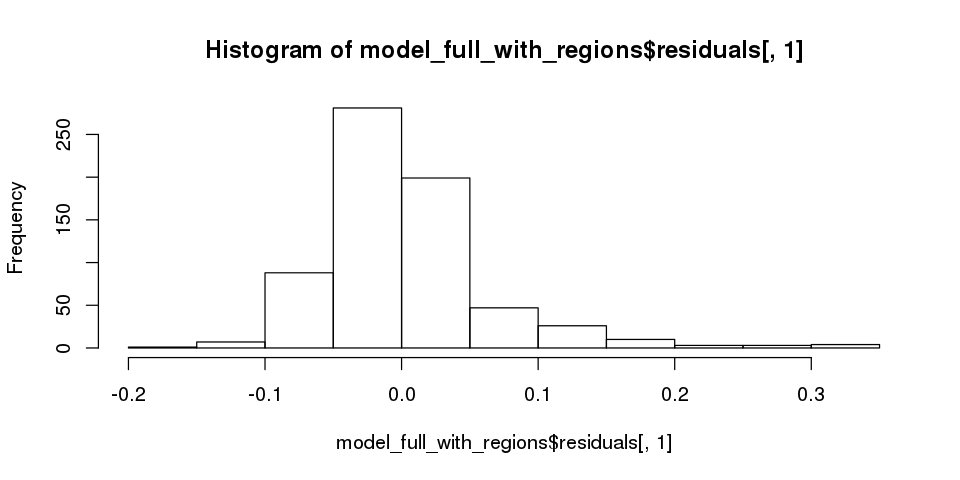

In [102]:
hist(model_full_with_regions$residuals[,1])

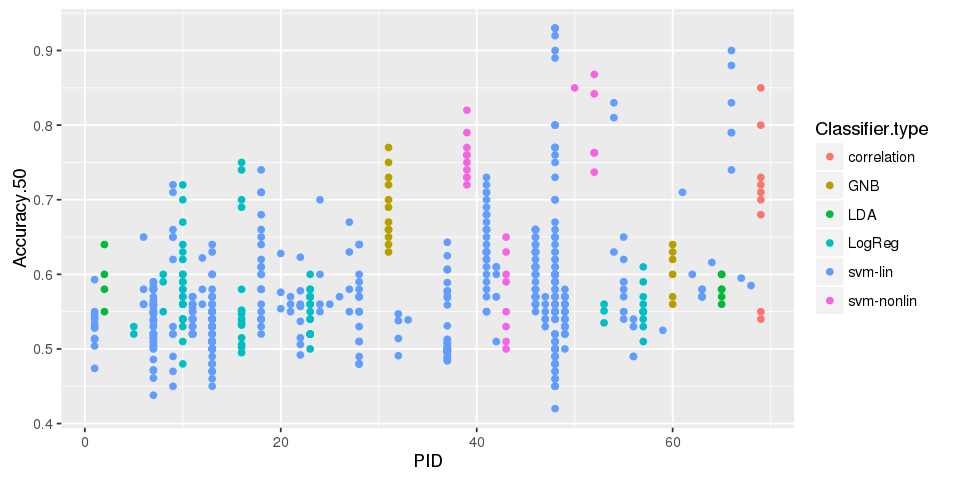

In [58]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(aes(y = Accuracy.50, x = PID,color=Classifier.type), data = data_50) +geom_point()+geom_hline(yintercept=)

In [409]:
left_greater_than_right<-c(1,1,1,0,0,1,0,1,0,1,1,0,1)
left_greater_than_right
binom.test(8, 13, p = 0.5)

[1] 1 1 1 0 0 1 0 1 0 1 1 0 1


	Exact binomial test

data:  8 and 13
number of successes = 8, number of trials = 13, p-value = 0.5811
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.3157776 0.8614207
sample estimates:
probability of success 
             0.6153846 


In [423]:
left_greater_than_right<-c(1,1,1,0,0,1,0,1,0,1,1,0,1)
left_greater_than_right
binom.test(10, 13, p = 0.5)

[1] 1 1 1 0 0 1 0 1 0 1 1 0 1


	Exact binomial test

data:  10 and 13
number of successes = 10, number of trials = 13, p-value = 0.09229
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4618685 0.9496189
sample estimates:
probability of success 
             0.7692308 


In [412]:
s<-summary(model_full_with_regions)
coef<-s$tTable[,1] 
coef_df = data.frame(coef)
print(rownames(coef_df))
print('')
print('constrast l v r')
cc = rep(0,length(coef))
cc[grep('_L',rownames(coef_df))]=1
cc[grep('_R',rownames(coef_df))]=-1
cc

print('constrast sup')
cc2 = rep(0,length(coef))
cc2[grep('_Sup',rownames(coef_df))]=1
#cc2[1]=1
cc2


print('constrast mid')
cc3 = rep(0,length(coef))
cc3[grep('_Mid',rownames(coef_df))]=1
#cc3[1]=1
cc3

print('constrast inf')
cc4 = rep(0,length(coef))
cc4[grep('_Inf',rownames(coef_df))]=1
#cc4[1]=1
cc4

print('constrast Orb')
cc5 = rep(0,length(coef))
cc5[grep('_Orb',rownames(coef_df))]=1
cc5

print('constrast cin')
cc6 = rep(0,length(coef))
cc6[grep('Cing',rownames(coef_df))]=1
cc6

print('constrast pre')
cc7 = rep(0,length(coef))
cc7[grep('Precent',rownames(coef_df))]=1
cc7

# left vs right 
K <- rbind(cc,cc2,cc3,cc4,cc5,cc6,cc7)

# sup, mid, inf, cing, Supp, Med, Post/Pre

t <- glht(model_full_with_regions, linfct = K)
summary(t)

 [1] "(Intercept)"                               
 [2] "Info.typeResponse"                         
 [3] "Info.typeRule"                             
 [4] "Info.typeValue"                            
 [5] "Smoothingunsmooth"                         
 [6] "Roi.SearchSearchlight Peak"                
 [7] "CoregistrationNative Space"                
 [8] "Pattern.typeMulti-Trial Single-Time Point" 
 [9] "Pattern.typeSingle Trial Multi-Time Point" 
[10] "Pattern.typeSingle Trial Single-Time Point"
[11] "Classifier.typecorrelation"                
[12] "Classifier.typeGNB"                        
[13] "Classifier.typeLDA"                        
[14] "Classifier.typeLogReg"                     
[15] "Classifier.typesvm-nonlin"                 
[16] "Significance1"                             
[17] "Frontal_Sup_L"                             
[18] "Frontal_Sup_R"                             
[19] "Frontal_Sup_Orb_L"                         
[20] "Frontal_Sup_Orb_R"                         


[1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  1 -1  1 -1  1 -1  1
[26] -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1

[1] "constrast sup"


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
[39] 0 0 0 0

[1] "constrast mid"


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 1 1 0 0

[1] "constrast inf"


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
[39] 0 0 0 0

[1] "constrast Orb"


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
[39] 0 0 0 0

[1] "constrast cin"


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
[39] 1 1 0 0

[1] "constrast pre"


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 1 1


	 Simultaneous Tests for General Linear Hypotheses

Fit: lme.formula(fixed = Accuracy.50 ~ Info.type + Smoothing + Roi.Search + 
    Coregistration + Pattern.type + Classifier.type + Significance + 
    Frontal_Sup_L + Frontal_Sup_R + Frontal_Sup_Orb_L + Frontal_Sup_Orb_R + 
    Frontal_Mid_L + Frontal_Mid_R + Frontal_Mid_Orb_L + Frontal_Mid_Orb_R + 
    Frontal_Inf_Oper_L + Frontal_Inf_Oper_R + Frontal_Inf_Tri_L + 
    Frontal_Inf_Tri_R + Frontal_Inf_Orb_L + Frontal_Inf_Orb_R + 
    Supp_Motor_Area_L + Supp_Motor_Area_R + Frontal_Sup_Medial_L + 
    Frontal_Sup_Medial_R + Insula_L + Insula_R + Cingulum_Ant_L + 
    Cingulum_Ant_R + Cingulum_Mid_L + Cingulum_Mid_R + Precentral_L + 
    Precentral_R, data = data_50, random = ~1 | PID, method = "ML")

Linear Hypotheses:
          Estimate Std. Error z value Pr(>|z|)
cc == 0   0.043811   0.080997   0.541    0.997
cc2 == 0  0.013294   0.027960   0.475    0.998
cc3 == 0 -0.026631   0.031718  -0.840    0.960
cc4 == 0  0.008013   0.016458   

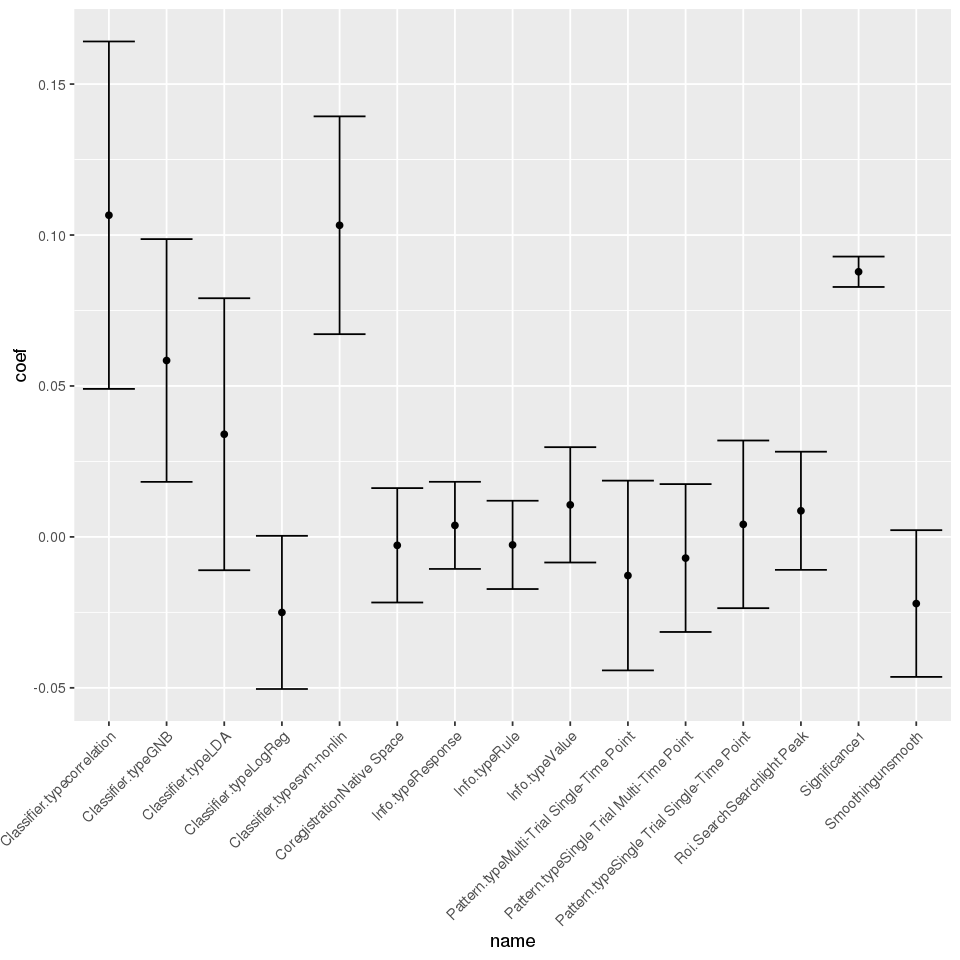

In [361]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model_full_with_regions)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:16,]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

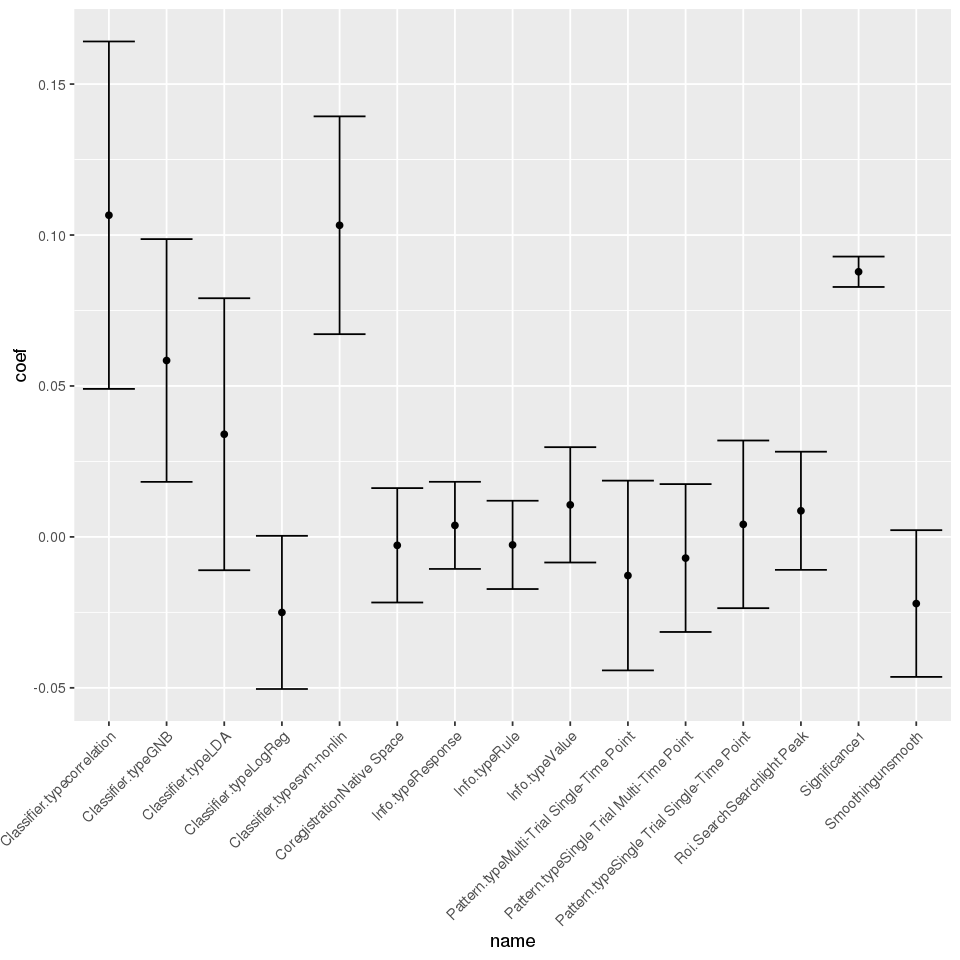

In [361]:
options(repr.plot.width=8, repr.plot.height=8)
s<-summary(model_full_with_regions)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:16,]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

In [337]:
anova(model_full,model_full_with_regions)

Model df       AIC       BIC    logLik   Test  L.Ratio
model_full                  1 18 -1960.906 -1879.802  998.4528                
model_full_with_regions     2 44 -1928.598 -1730.343 1008.2990 1 vs 2 19.69244
                        p-value
model_full                     
model_full_with_regions  0.8059

In [345]:
X = model.matrix(model_full_with_regions,data=data_50)
X<-X[,2:ncol(X)]
C = cor(X)

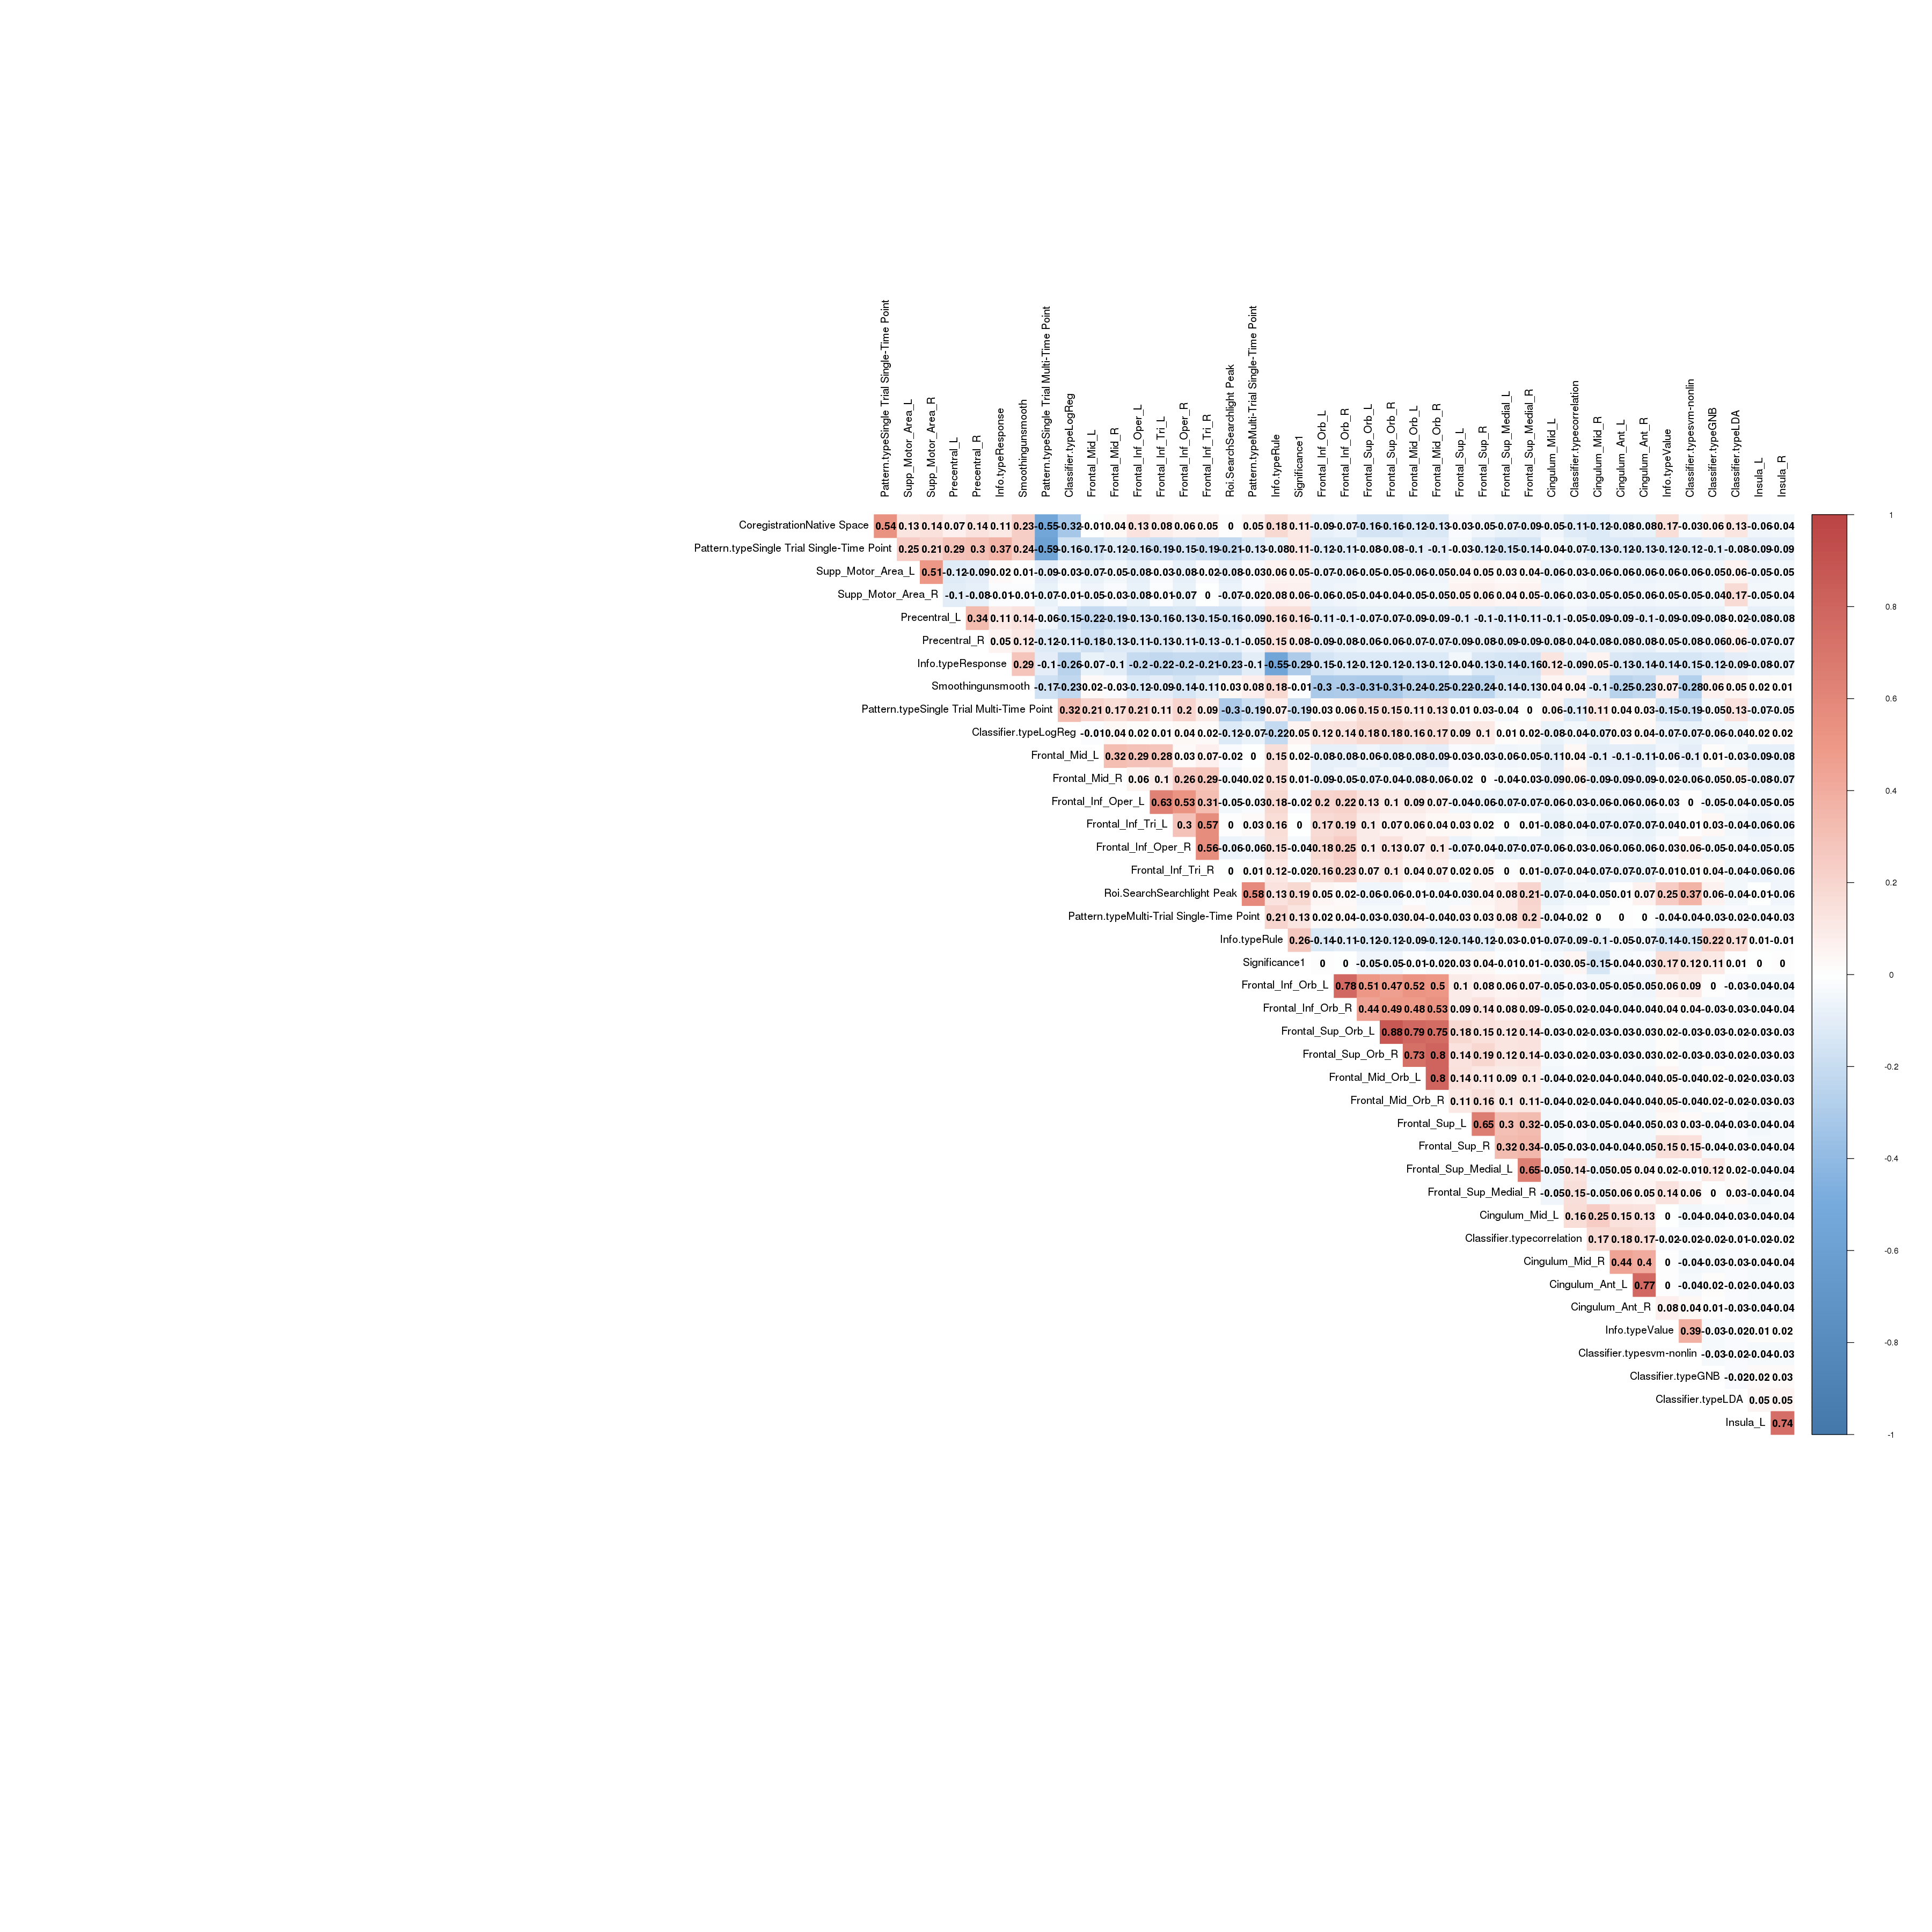

In [350]:
options(repr.plot.width=30, repr.plot.height=30)
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
col <- colorRampPalette(c("#4477AA", "#77AADD", "#FFFFFF","#EE9988", "#BB4444"))

corrplot(C, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=90, #Text label color and rotation
         # Combine with significance
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

In [421]:
write.table(coef,'coef_model_full_no_collapse.csv')

## Marginal Effects Boxplots (no study intercepts)

Warning message:
: Removed 104 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 104 rows containing missing values (geom_point).

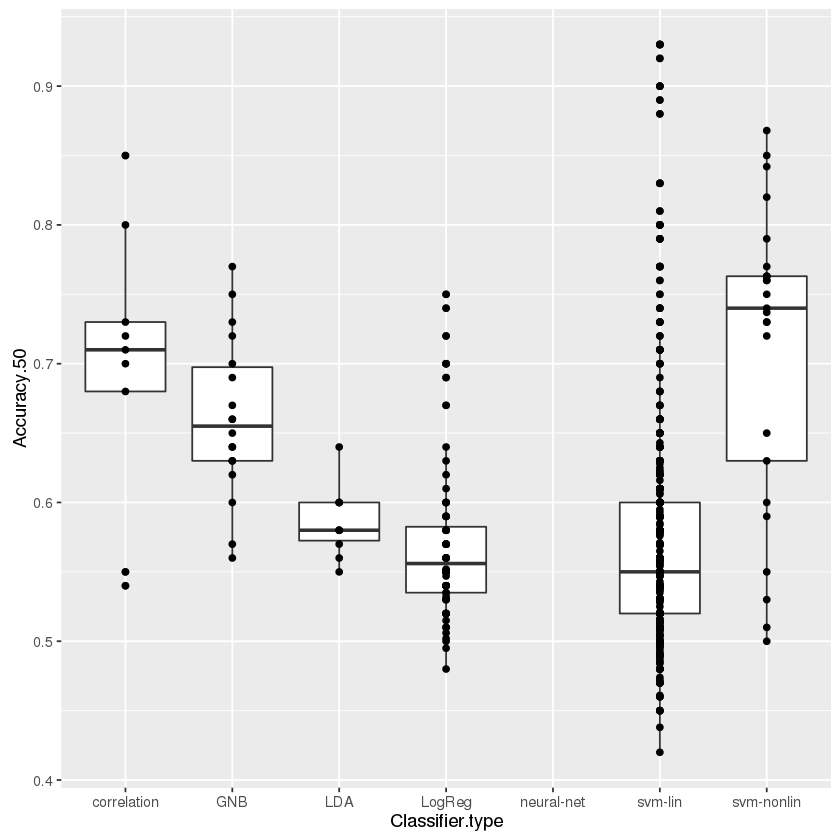

In [16]:
p2 <- ggplot(aes(x = Classifier.type, y = Accuracy.50), data = data) + geom_boxplot()+geom_point()+theme(legend.position="bottom")
print(p2,newpage=FALSE)

## Marginal Effects Regressions (accounting for study)



Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
        AIC       BIC   logLik
  -1687.692 -1651.645 851.8458

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.05256346 0.06325499

Fixed effects: Accuracy.50 ~ Classifier.type 
                                Value  Std.Error  DF  t-value p-value
(Intercept)                 0.5827842 0.01028652 617 56.65511  0.0000
Classifier.typecorrelation  0.1149936 0.05781292  46  1.98906  0.0527
Classifier.typeGNB          0.0656585 0.04180686  46  1.57052  0.1231
Classifier.typeLDA          0.0040480 0.04377713  46  0.09247  0.9267
Classifier.typeLogReg      -0.0201173 0.02458184  46 -0.81838  0.4174
Classifier.typesvm-nonlin   0.1420771 0.03249523  46  4.37224  0.0001
 Correlation: 
                           (Intr) Clssf. Cl.GNB Cl.LDA Cls.LR
Classifier.typecorrelation -0.178                            
Classifier.typeGNB         -0.246  0.044                     
Classifier.typeLDA         -0.235

Warning message:
: Removed 11 rows containing missing values (geom_point).Warning message:
: Removed 11 rows containing missing values (geom_errorbar).

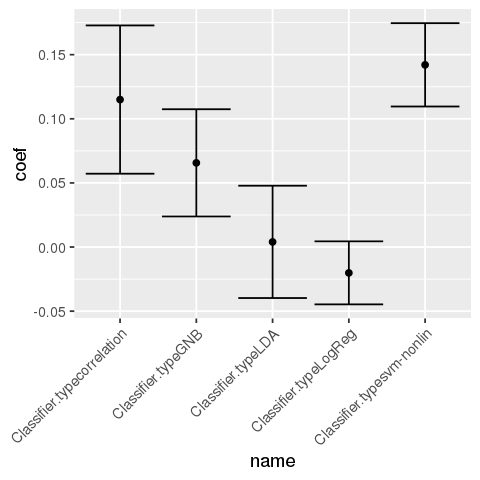

In [359]:

model_classifier = lme(Accuracy.50~Classifier.type,random=~1|PID,data=data_50,method='ML')
summary(model_classifier)

options(repr.plot.width=4, repr.plot.height=4)
s<-summary(model_classifier)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:17,]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
        AIC       BIC   logLik
  -1689.427 -1662.392 850.7133

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.06398002 0.06257101

Fixed effects: Accuracy.50 ~ Info.type 
                       Value  Std.Error  DF  t-value p-value
(Intercept)        0.5883711 0.01296802 614 45.37092  0.0000
Info.typeResponse -0.0174327 0.01665833 614 -1.04649  0.2957
Info.typeRule      0.0109771 0.01514351 614  0.72487  0.4688
Info.typeValue     0.0795105 0.02187432 614  3.63488  0.0003
 Correlation: 
                  (Intr) Inf.typRs Inf.typRl
Info.typeResponse -0.392                    
Info.typeRule     -0.615  0.390             
Info.typeValue    -0.273  0.339     0.209   

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.78313876 -0.44731549 -0.06622565  0.33132334  5.36760059 

Number of Observations: 669
Number of Groups: 52 

Warning message:
: Removed 13 rows containing missing values (geom_point).Warning message:
: Removed 13 rows containing missing values (geom_errorbar).

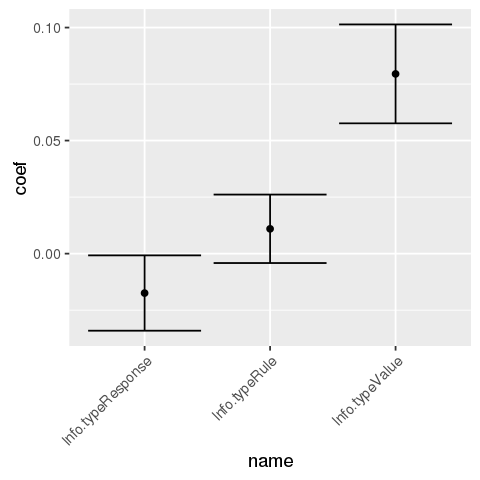

In [358]:
model_info = lme(Accuracy.50~Info.type,random=~1|PID,data=data_50,method='ML')
summary(model_info)
options(repr.plot.width=4, repr.plot.height=4)
s<-summary(model_info)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:17,]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
       AIC       BIC   logLik
  -1675.69 -1657.667 841.8452

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.06645103 0.06330094

Fixed effects: Accuracy.50 ~ Smoothing 
                       Value  Std.Error  DF   t-value p-value
(Intercept)        0.6247939 0.02317539 617 26.959372   0.000
Smoothingunsmooth -0.0347896 0.02582586  50 -1.347083   0.184
 Correlation: 
                  (Intr)
Smoothingunsmooth -0.897

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.75405197 -0.49590201 -0.07100129  0.37554190  5.30270069 

Number of Observations: 669
Number of Groups: 52 

Warning message:
: Removed 15 rows containing missing values (geom_point).Warning message:
: Removed 15 rows containing missing values (geom_errorbar).

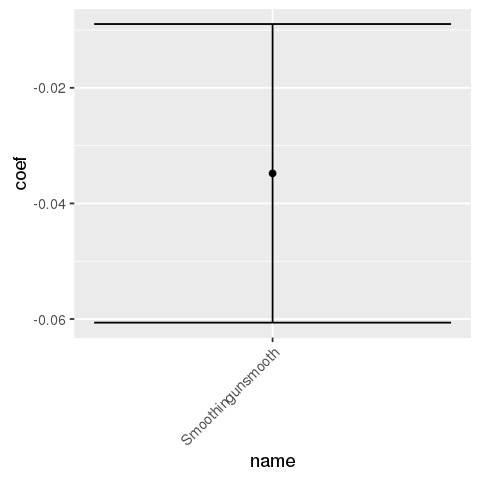

In [360]:

model_smoothing = lme(Accuracy.50~Smoothing,random=~1|PID,data=data_50,method='ML')
summary(model_smoothing)
options(repr.plot.width=4, repr.plot.height=4)
s<-summary(model_smoothing)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:17,]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
        AIC       BIC   logLik
  -1676.184 -1658.161 842.0919

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.06559713 0.06333123

Fixed effects: Accuracy.50 ~ Roi.Search 
                               Value  Std.Error  DF  t-value p-value
(Intercept)                0.5881846 0.01155841 616 50.88802  0.0000
Roi.SearchSearchlight Peak 0.0280929 0.01834210 616  1.53161  0.1261
 Correlation: 
                           (Intr)
Roi.SearchSearchlight Peak -0.484

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.75244076 -0.49504460 -0.06814129  0.37538225  5.30045763 

Number of Observations: 669
Number of Groups: 52 

Warning message:
: Removed 15 rows containing missing values (geom_point).Warning message:
: Removed 15 rows containing missing values (geom_errorbar).

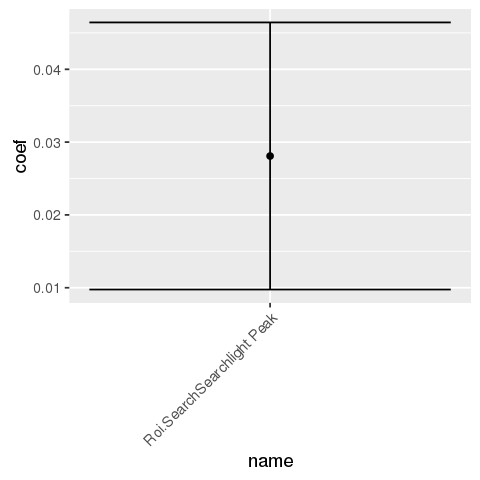

In [362]:
model = lme(Accuracy.50~Roi.Search,random=~1|PID,data=data_50,method='ML')
summary(model)
options(repr.plot.width=4, repr.plot.height=4)
s<-summary(model)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:17,]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
        AIC       BIC  logLik
  -1673.978 -1655.955 840.989

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.06748068 0.06332151

Fixed effects: Accuracy.50 ~ Coregistration 
                                Value  Std.Error  DF  t-value p-value
(Intercept)                 0.5996057 0.01390711 617 43.11503  0.0000
CoregistrationNative Space -0.0062749 0.02084930  50 -0.30096  0.7647
 Correlation: 
                           (Intr)
CoregistrationNative Space -0.667

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.75365373 -0.49693811 -0.06462013  0.37432152  5.30048154 

Number of Observations: 669
Number of Groups: 52 

Warning message:
: Removed 15 rows containing missing values (geom_point).Warning message:
: Removed 15 rows containing missing values (geom_errorbar).

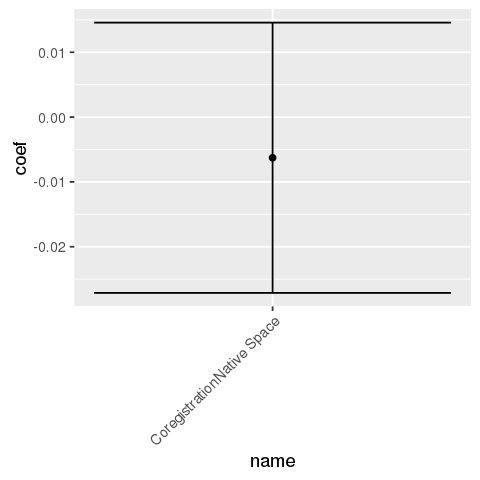

In [363]:
model = lme(Accuracy.50~Coregistration,random=~1|PID,data=data_50,method='ML')
summary(model)
options(repr.plot.width=4, repr.plot.height=4)
s<-summary(model)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:17,]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
       AIC       BIC   logLik
  -1674.76 -1647.725 843.3799

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.06355926 0.06333489

Fixed effects: Accuracy.50 ~ Pattern.type 
                                                Value  Std.Error  DF  t-value
(Intercept)                                 0.6287395 0.01763444 617 35.65407
Pattern.typeMulti-Trial Single-Time Point  -0.0423893 0.03186873  48 -1.33012
Pattern.typeSingle Trial Multi-Time Point  -0.0523882 0.02395270  48 -2.18715
Pattern.typeSingle Trial Single-Time Point -0.0381592 0.02927668  48 -1.30340
                                           p-value
(Intercept)                                 0.0000
Pattern.typeMulti-Trial Single-Time Point   0.1898
Pattern.typeSingle Trial Multi-Time Point   0.0336
Pattern.typeSingle Trial Single-Time Point  0.1987
 Correlation: 
                                           (Intr) P.M-SP P.STMP
Patte

Warning message:
: Removed 13 rows containing missing values (geom_point).Warning message:
: Removed 13 rows containing missing values (geom_errorbar).

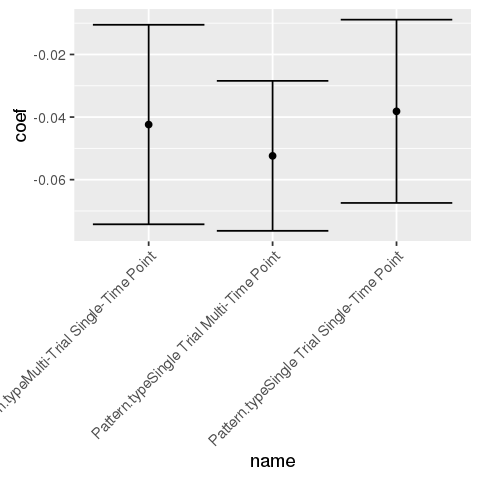

In [364]:
model = lme(Accuracy.50~Pattern.type,random=~1|PID,data=data_50,method='ML')
summary(model)
options(repr.plot.width=4, repr.plot.height=4)
s<-summary(model)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:17,]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

Linear mixed-effects model fit by maximum likelihood
 Data: data_50 
        AIC       BIC   logLik
  -1964.464 -1946.441 986.2322

Random effects:
 Formula: ~1 | PID
        (Intercept)   Residual
StdDev:  0.06252086 0.05046786

Fixed effects: Accuracy.50 ~ Significance 
                  Value   Std.Error  DF  t-value p-value
(Intercept)   0.5313467 0.010011623 616 53.07298       0
Significance1 0.0882341 0.004618229 616 19.10562       0
 Correlation: 
              (Intr)
Significance1 -0.344

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.57848133 -0.59702228 -0.09246799  0.40192741  5.77863655 

Number of Observations: 669
Number of Groups: 52 

Warning message:
: Removed 15 rows containing missing values (geom_point).Warning message:
: Removed 15 rows containing missing values (geom_errorbar).

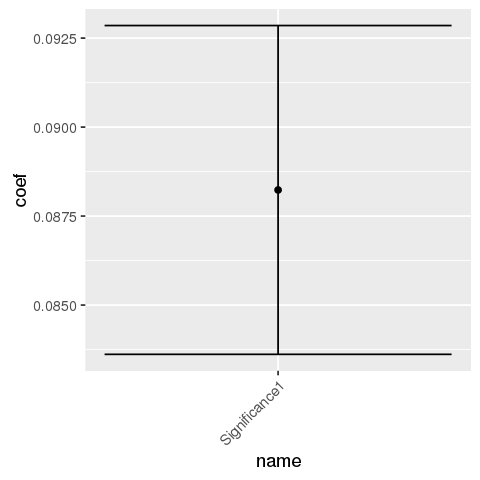

In [365]:
model = lme(Accuracy.50~Significance,random=~1|PID,data=data_50,method='ML')
summary(model)
options(repr.plot.width=4, repr.plot.height=4)
s<-summary(model)
coef<-s$tTable[,1] 
se<-s$tTable[,2] 
df<-data.frame(cbind(coef,se))
#print(s$tTable[,0])
df$name<-rownames(df)
df<-df[2:17,]
df['coef']=df['coef']#+coef[1] # add intercept
ggplot(df, aes(y=coef,x=name))+geom_point()+geom_errorbar(aes(ymax = coef + se, ymin=coef- se))+theme(axis.text.x = element_text(angle = 45, hjust = 1))#+geom_hline(yintercept=coef[1])

## 

In [ ]:
keys <- colnames(data_50)[!grepl('Accuracy.50',colnames(data_50))]
keys

## Between Study Regression

In [21]:
# create data 50
data = cbind(data1,data3) # combine with regions


## remove neural-net
data<-data[!data$Classifier.type=='neural-net',]

## change factors
data$PID<-as.factor(data$PID)
data$Info.type<-as.factor(data$Info.type)
data$Smoothing<-as.factor(data$Smoothing)
data$Roi.Search<-as.factor(data$Roi.Search)
data$Classifier.type<-as.factor(data$Classifier.type)
data$Coregistration<-as.factor(data$Coregistration)
data$Pattern.type<-as.factor(data$Pattern.type)
data$Pattern.normalization.type<-as.factor(data$Pattern.normalization.type)
 
# relevel 
data$Classifier.type<-relevel(data$Classifier.type,'correlation')

# drop empty levels 
data<-droplevels(data)

#variables = c(c('Accuracy.50','PID'),colnames(data3))
#variables
data_50<-data[!is.na(data$Accuracy.50),]
nrow(data_50)
#head(data_50)



[1] 669

In [22]:

data_50_paper = data.frame(Accuracy.50 = numeric(), PID = factor(), Info.type = factor(),Smoothing=factor(),
                           Roi.Search=factor(),Classifier.type=factor(),Coregistration=factor(),Pattern.type=factor(),
                          Pattern.normalization.type=factor())


# but this collapses across a few studies that have multiple of these things. 

for (pi in unique(data_50$PID)){
    d<-data_50[data_50$PID==pi,]
    
    
    data_50_paper<-rbind(data_50_paper,data.frame(Accuracy.50 = mean(d$Accuracy.50), PID = pi, Info.type = d$Info.type[1],
                                                 Smoothing=d$Smoothing[1],Roi.Search=d$Roi.Search[1],Classifier.type=d$Classifier.type[1],
                                                  Coregistration=d$Coregistration[1],Pattern.type=d$Pattern.type[1],
                                                  Pattern.normalization.type=d$Pattern.normalization.type[1]))

    
}

In [76]:
model = lm(Accuracy.50~Info.type+Smoothing+Roi.Search+
            Coregistration+Pattern.type+Classifier.type,data=data_50_paper)

s<-summary(model)
s
anova(model)


Call:
lm(formula = Accuracy.50 ~ Info.type + Smoothing + Roi.Search + 
    Coregistration + Pattern.type + Classifier.type, data = data_50_paper)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.156991 -0.029502 -0.005709  0.019071  0.239038 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 0.730559   0.076679   9.528
Info.typeResponse                          -0.012606   0.037337  -0.338
Info.typeRule                               0.021283   0.032180   0.661
Info.typeValue                              0.067566   0.044628   1.514
Smoothingunsmooth                          -0.032781   0.035313  -0.928
Roi.SearchSearchlight Peak                  0.013196   0.034845   0.379
CoregistrationNative Space                 -0.016002   0.025523  -0.627
Pattern.typeMulti-Trial Single-Time Point   0.004423   0.042524   0.104
Pattern.typeSingle Trial Multi-Time Point  -0.008803   0.032057  -0.275
Patt

Analysis of Variance Table

Response: Accuracy.50
                Df   Sum Sq   Mean Sq F value  Pr(>F)  
Info.type        3 0.033697 0.0112325  2.4247 0.08109 .
Smoothing        1 0.013296 0.0132963  2.8702 0.09864 .
Roi.Search       1 0.003912 0.0039117  0.8444 0.36410  
Coregistration   1 0.000797 0.0007973  0.1721 0.68065  
Pattern.type     3 0.024640 0.0082135  1.7730 0.16922  
Classifier.type  5 0.059312 0.0118624  2.5606 0.04361 *
Residuals       37 0.171406 0.0046326                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [77]:
coef(model)

(Intercept) 
                               0.730558952 
                         Info.typeResponse 
                              -0.012606454 
                             Info.typeRule 
                               0.021282677 
                            Info.typeValue 
                               0.067565667 
                         Smoothingunsmooth 
                              -0.032781174 
                Roi.SearchSearchlight Peak 
                               0.013196264 
                CoregistrationNative Space 
                              -0.016002183 
 Pattern.typeMulti-Trial Single-Time Point 
                               0.004423293 
 Pattern.typeSingle Trial Multi-Time Point 
                              -0.008803307 
Pattern.typeSingle Trial Single-Time Point 
                               0.030425565 
                        Classifier.typeGNB 
                              -0.060407710 
                        Classifier.typeLDA 
                              -0.107171632 
                     Classifier.typeLogReg 
                              -0.147778539 
                    Classifier.typesvm-lin 
                              -0.131927732 
                 Classifier.typesvm-nonlin 
                              -0.003568394

In [81]:
model = lm(Accuracy.50~Info.type,data=data_50_paper)

s<-summary(model)
s
anova(model)


Call:
lm(formula = Accuracy.50 ~ Info.type, data = data_50_paper)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09239 -0.04761 -0.01855  0.01121  0.24511 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.604890   0.016875  35.846   <2e-16 ***
Info.typeResponse -0.054360   0.033141  -1.640    0.107    
Info.typeRule     -0.008897   0.023579  -0.377    0.708    
Info.typeValue     0.058110   0.041334   1.406    0.166    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07547 on 48 degrees of freedom
Multiple R-squared:  0.1097,	Adjusted R-squared:  0.0541 
F-statistic: 1.972 on 3 and 48 DF,  p-value: 0.1307


Analysis of Variance Table

Response: Accuracy.50
          Df   Sum Sq   Mean Sq F value Pr(>F)
Info.type  3 0.033697 0.0112325  1.9723 0.1307
Residuals 48 0.273364 0.0056951

In [82]:
coef(model)[1]
coef(model)[2]
coef(model)[3]
coef(model)[4]

(Intercept) 
  0.6048901

Info.typeResponse 
      -0.05436013

Info.typeRule 
 -0.008897031

Info.typeValue 
    0.05810991

In [83]:
coef= coef(model)

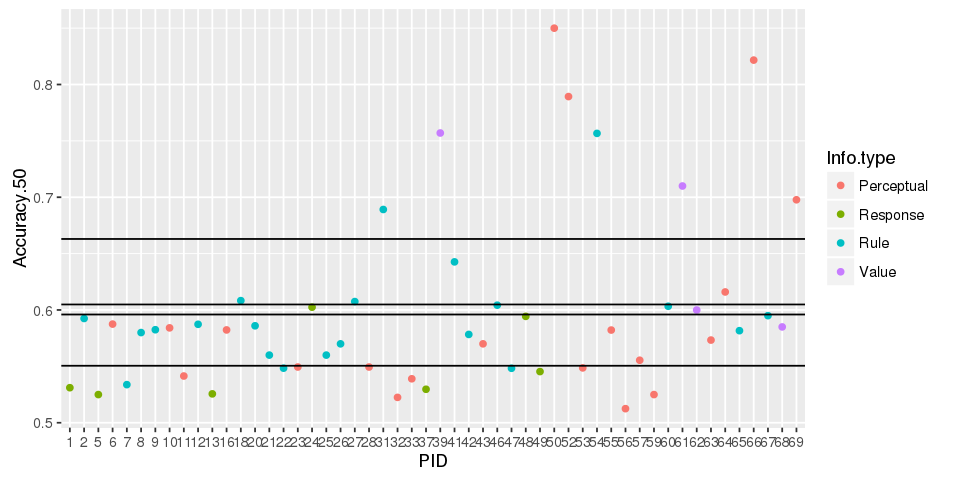

In [85]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(aes(y = Accuracy.50, x = PID,color=Info.type), data = data_50_paper) +geom_point()+geom_hline(yintercept=coef[1])+geom_hline(yintercept=coef[1]+coef[2])+geom_hline(yintercept=coef[1]+coef[3])+geom_hline(yintercept=coef[1]+coef[4])